<center><h2>Heart Attack Analysis & Prediction - Notebook

<center><h3>Priboi Luca Mihai

## Table of Contents
* [Introduction](#introduction)
* [Importing the Libraries and the Dataset](#data)
* [Descriptive Statistics](#descriptive)
* [Exploratory Data Analysis](#eda)
  * [Correlation](#eda)
    * [Pearson's Correlation](#pearson)
    * [Spearman Rank or Spearman's Rho](#spearman)
    * [Phi K (𝜙k) Correlation](#phi)
  * [Statistical Distributions](#distributions)
  * [Bivariate Correlations](#bivariate)
    * [*Outcome* with *Thallium Test Result*](#thallium)
    * [*Outcome* with *Chest Pain Type*](#chest)
    * [*Outcome* with *Exercise Induced Angina*](#angina)
    * [*Outcome* with *Max Heart Rate*](#maxhr)
    * [*Outcome* with *Age*](#age)
    * [*Outcome* with *ST Depression*](#st_d)
    * [*Outcome* with *Number of Major Vessels*](#vessels)
* [Supervised Machine Learning (Classification)](#ml)
  * [Code to Treat Outliers](#outliers)
  * [Replacing categorical values with numerical values](#categorical)
  * [Splitting the Dataset](#split)
  * [Running the Models](#models)
    * [Decision Tree Classifier](#dtc)
    * [Random Forest Classifier](#rfc)
    * [Bagging Classifier](#bc)
    * [Logistic Regression](#lr)
    * [Tuned Decision Tree Classifier](#tuned_dtc)
    * [Tuned Random Forest Classifier](#tuned_rfc)
    * [Tuned Bagging Classifier](#tuned_bc)
    * [Tuned Logistic Regression](#tuned_lr)
  * [Supervised ML Classification Model Comparisons](#compare)
  * [Boosting Models](#boosting)
    * [AdaBoost Classifier](#abc)
    * [Tuned Adaboost Classifier](#tuned_abc)
    * [Gradient Boosting Classifier](#gbc)
    * [Tuned Gradient Boosting Classifier](#tuned_gbc)
    * [XGBoost Classifier](#xgbc)
    * [Tuned XGBoost Classifier](#tuned_xgbc)
  * [Boosting Model Comparisons](#boosting_compare)
* [Conclusion](#conclusion)

## Introduction <a class="anchor" id="introduction"></a>

**Source:** https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

**Description:** This dataset contains information about people and their heart health. The goal is to predict if a person has a high risk of heart attack based on the information provided. The dataset is already cleaned and ready to be used for analysis and prediction.

**Content:** The dataset contains 14 variables and 303 instances. The variables are:

1. **age** - Age
    * **Description:** The age of the pacient in years.
    * **Type:** Numerical
    
2. **sex** - Gender
    * **Description:** Represents the biological gender of the pacient.
    * **Values:**
        * 0: Female
        * 1: Male
    * **Type:** Nominal

3. **cp** - Chest Pain
    * **Description:** Describes the type of chest pain experienced by the individual.
    * **Values:**
        * 0: Typical Angina
        * 1: Atypical Angina
        * 2: Non-Anginal Pain
        * 3: Asymptomatic
    * **Type:** Nominal

4. **trtbps** - Resting Blood Pressure
    * **Description:** Represents the resting blood pressure of the pacient.
    * **Values:** Measured in mm Hg (millimeters of mercury).
    * **Type:** Numerical

5. **chol** - Serum Cholesterol
    * **Description:** Represents the serum cholesterol levels of the pacient. Serum cholesterol is the amount of cholesterol circulating in the bloodstream.
    * **Values:** Measured in mg/dl (milligrams per deciliter) of blood.
    * **Type:** Numerical

6. **fbs** - Fasting Blood Sugar
    * **Description:** Represents the fasting blood sugar levels of the pacient. Fasting blood sugar is a measure of the glucose levels in the blood after fasting (not eating or drinking) for 8 hours.
    * **Values:**
        * 0: Fasting Blood Sugar <= 120 mg/dl
        * 1: Fasting Blood Sugar > 120 mg/dl
    * **Type:** Ordinal

7. **restecg** - Resting Electrocardiographic Results
    * **Description:** Represents the resting electrocardiographic results of the pacient, providing information about the electrical activity of the heart while at rest.
    * **Values:**
        * 0: Normal
        * 1: ST-T Wave Abnormality (T Wave inversions and/or ST elevation or depression of > 0.05 mV)
        * 2: Probable or definite left ventricular hypertrophy by Estes' criteria
    * **Type:** Nominal

8. **thalachh** - Maximum Heart Rate Achieved
    * **Description:** Represents the maximum heart rate achieved by the pacient. The maximum heart rate is the highest heart rate achieved during a maximal exercise test.
    * **Values:** Measured in bpm (beats per minute).
    * **Type:** Numerical

9. **exng** - Exercise Induced Angina
    * **Description:** Represents if the pacient experienced exercise induced angina. Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.
    * **Values:**
        * 0: No
        * 1: Yes
    * **Type:** Nominal

10. **oldpeak** - ST Depression
    * **Description:** Represents the ST depression induced by exercise relative to rest. ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline.
    * **Values:** Measured in mm (millimeters).
    * **Type:** Numerical

11. **slp** - Slope of the Peak Exercise ST Segment
    * **Description:** Represents the slope of the peak exercise ST segment.
    * **Values:**
        * 0: Upsloping
        * 1: Flat
        * 2: Downsloping
    * **Type:** Ordinal

12. **caa** - Number of Major Vessels
    * **Description:** Represents the number of major vessels colored by fluoroscopy. Fluoroscopy is an imaging technique that uses X-rays to obtain real-time moving images of the interior of an object.
    * **Values:** Ranges from 0 to 3.
    * **Type:** Ordinal

13. **thall** - Thallium Stress Test Result
    * **Description:** Represents the result of the thalium stress test. The thalium stress test is a nuclear imaging method that shows how well blood flows into the heart muscle, both at rest and during activity.
    * **Values:**
        * 1: Normal
        * 2: Fixed Defect
        * 3: Reversible Defect
    * **Type:** Nominal

14. **output** - Heart Attack Risk
    * **Description:** Represents if the pacient is at risk of having a heart attack.
    * **Values:**
        * 0: Low Risk
        * 1: High Risk
    * **Type:** Nominal, Dependent Variable

## Importing the Libraries and the Dataset <a class="anchor" id="data"></a>

In [1164]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import skew, norm, probplot, boxcox, f_oneway

import warnings
warnings.filterwarnings("ignore")

In [1165]:
df = pd.read_csv("heart.csv")

In [1166]:
df.shape

(303, 14)

In [1167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [1168]:
category_names = ['Age', 'Gender', 'Chest_Pain', 'Resting_BP', 'Cholesterol', 'Fasting_Sugar', 'Resting_ECG', 'Max_Heart_Rate', 
                  'Exercise_Angina', 'ST_Depression', 'ST_Slope', 'Major_Vessels', 'Thallium_Test', 'Outcome']

# Rename columns
for i in range(len(category_names)):
    df.rename(columns={df.columns[i]: category_names[i]}, inplace=True)

### Changing the numerical values of the categorical variables to their corresponding labels

In [1169]:
df['Gender'] = df['Gender'].replace({0: 'F', 1:'M'})
df['Chest_Pain'] = df['Chest_Pain'].replace({0: 'Typical Angina', 1:'Atypical Angina', 2:'Non-Anginal Pain', 3:'Asymptomatic'})
df['Fasting_Sugar'] = df['Fasting_Sugar'].replace({0: '<= 120mg/ml', 1:'> 120mg/ml'})
df['Resting_ECG'] = df['Resting_ECG'].replace({0: 'Normal', 1:'ST-T Wave Abnormality', 2:'Left Ventricular Hypertrophy'})
df['Exercise_Angina'] = df['Exercise_Angina'].replace({0: 'No', 1:'Yes'})
df['ST_Slope'] = df['ST_Slope'].replace({0: 'Upsloping', 1:'Flat', 2:'Downsloping'})
df['Thallium_Test'] = df['Thallium_Test'].replace({0: 'Null', 1: 'Fixed defect', 2:'Normal', 3:'Reversible Defect'})
df['Outcome'] = df['Outcome'].replace({1: 'Low Risk', 0:'High Risk'})

## Descriptive Statistics <a class="anchor" id="descriptive"></a>

In [1170]:
df.head(10).T

0                      1                2  \
Age                        63                     37               41   
Gender                      M                      M                F   
Chest_Pain       Asymptomatic       Non-Anginal Pain  Atypical Angina   
Resting_BP                145                    130              130   
Cholesterol               233                    250              204   
Fasting_Sugar      > 120mg/ml            <= 120mg/ml      <= 120mg/ml   
Resting_ECG            Normal  ST-T Wave Abnormality           Normal   
Max_Heart_Rate            150                    187              172   
Exercise_Angina            No                     No               No   
ST_Depression            2.30                   3.50             1.40   
ST_Slope            Upsloping              Upsloping      Downsloping   
Major_Vessels               0                      0                0   
Thallium_Test    Fixed defect                 Normal           Normal   
Outcome              Low Risk               Low Risk         Low Risk   

                                     3                      4  \
Age                                 56                     57   
Gender                               M                      F   
Chest_Pain             Atypical Angina         Typical Angina   
Resting_BP                         120                    120   
Cholesterol                        236                    354   
Fasting_Sugar              <= 120mg/ml            <= 120mg/ml   
Resting_ECG      ST-T Wave Abnormality  ST-T Wave Abnormality   
Max_Heart_Rate                     178                    163   
Exercise_Angina                     No                    Yes   
ST_Depression                     0.80                   0.60   
ST_Slope                   Downsloping            Downsloping   
Major_Vessels                        0                      0   
Thallium_Test                   Normal                 Normal   
Outcome                       Low Risk               Low Risk   

                                     5                6  \
Age                                 57               56   
Gender                               M                F   
Chest_Pain              Typical Angina  Atypical Angina   
Resting_BP                         140              140   
Cholesterol                        192              294   
Fasting_Sugar              <= 120mg/ml      <= 120mg/ml   
Resting_ECG      ST-T Wave Abnormality           Normal   
Max_Heart_Rate                     148              153   
Exercise_Angina                     No               No   
ST_Depression                     0.40             1.30   
ST_Slope                          Flat             Flat   
Major_Vessels                        0                0   
Thallium_Test             Fixed defect           Normal   
Outcome                       Low Risk         Low Risk   

                                     7                      8  \
Age                                 44                     52   
Gender                               M                      M   
Chest_Pain             Atypical Angina       Non-Anginal Pain   
Resting_BP                         120                    172   
Cholesterol                        263                    199   
Fasting_Sugar              <= 120mg/ml             > 120mg/ml   
Resting_ECG      ST-T Wave Abnormality  ST-T Wave Abnormality   
Max_Heart_Rate                     173                    162   
Exercise_Angina                     No                     No   
ST_Depression                     0.00                   0.50   
ST_Slope                   Downsloping            Downsloping   
Major_Vessels                        0                      0   
Thallium_Test        Reversible Defect      Reversible Defect   
Outcome                       Low Risk               Low Risk   

                                     9  
Age                                 57  
Gender      

In [1171]:
dict={}
for i in list(df.columns):
    dict[i]=df[i].value_counts().shape[0]
pd.DataFrame(dict,index=['Unique Count']).transpose()

Unique Count
Age                        41
Gender                      2
Chest_Pain                  4
Resting_BP                 49
Cholesterol               152
Fasting_Sugar               2
Resting_ECG                 3
Max_Heart_Rate             91
Exercise_Angina             2
ST_Depression              40
ST_Slope                    3
Major_Vessels               5
Thallium_Test               4
Outcome                     2

In [1172]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe().T

count   mean   std    min    25%    50%    75%    max
Age            303.00  54.37  9.08  29.00  47.50  55.00  61.00  77.00
Resting_BP     303.00 131.62 17.54  94.00 120.00 130.00 140.00 200.00
Cholesterol    303.00 246.26 51.83 126.00 211.00 240.00 274.50 564.00
Max_Heart_Rate 303.00 149.65 22.91  71.00 133.50 153.00 166.00 202.00
ST_Depression  303.00   1.04  1.16   0.00   0.00   0.80   1.60   6.20
Major_Vessels  303.00   0.73  1.02   0.00   0.00   0.00   1.00   4.00

In [1173]:
# Range for numerical variables
for i in df.columns:
    if df[i].dtype != 'object':
        print(i, "Range:", df[i].max()-df[i].min())

Age Range: 48
Resting_BP Range: 106
Cholesterol Range: 438
Max_Heart_Rate Range: 131
ST_Depression Range: 6.2
Major_Vessels Range: 4


In [1174]:
df.var()

Age                82.48
Resting_BP        307.59
Cholesterol      2686.43
Max_Heart_Rate    524.65
ST_Depression       1.35
Major_Vessels       1.05
dtype: float64

In [1175]:
df['Outcome'].value_counts()

Low Risk     165
High Risk    138
Name: Outcome, dtype: int64

In [1176]:
# Group by DV and IV
df.groupby(['Outcome']).median().sort_values(by='Outcome', ascending=False)

Age  Resting_BP  Cholesterol  Max_Heart_Rate  ST_Depression  \
Outcome                                                                   
Low Risk  52.00      130.00       234.00          161.00           0.20   
High Risk 58.00      130.00       249.00          142.00           1.40   

           Major_Vessels  
Outcome                   
Low Risk            0.00  
High Risk           1.00

## Exploratory Data Analysis <a class="anchor" id="eda"></a>

### Pearson's Correlation <a class="anchor" id="pearson"></a>

In [1177]:
df.corr(method='pearson')

Age  Resting_BP  Cholesterol  Max_Heart_Rate  ST_Depression  \
Age             1.00        0.28         0.21           -0.40           0.21   
Resting_BP      0.28        1.00         0.12           -0.05           0.19   
Cholesterol     0.21        0.12         1.00           -0.01           0.05   
Max_Heart_Rate -0.40       -0.05        -0.01            1.00          -0.34   
ST_Depression   0.21        0.19         0.05           -0.34           1.00   
Major_Vessels   0.28        0.10         0.07           -0.21           0.22   

                Major_Vessels  
Age                      0.28  
Resting_BP               0.10  
Cholesterol              0.07  
Max_Heart_Rate          -0.21  
ST_Depression            0.22  
Major_Vessels            1.00

In [1178]:
df.corr(method='pearson').abs().where(np.triu(np.ones(df.corr().abs().shape), k=1).astype(np.bool)).stack().sort_values(ascending=False)

Age             Max_Heart_Rate   0.40
Max_Heart_Rate  ST_Depression    0.34
Age             Resting_BP       0.28
                Major_Vessels    0.28
ST_Depression   Major_Vessels    0.22
Age             Cholesterol      0.21
Max_Heart_Rate  Major_Vessels    0.21
Age             ST_Depression    0.21
Resting_BP      ST_Depression    0.19
                Cholesterol      0.12
                Major_Vessels    0.10
Cholesterol     Major_Vessels    0.07
                ST_Depression    0.05
Resting_BP      Max_Heart_Rate   0.05
Cholesterol     Max_Heart_Rate   0.01
dtype: float64

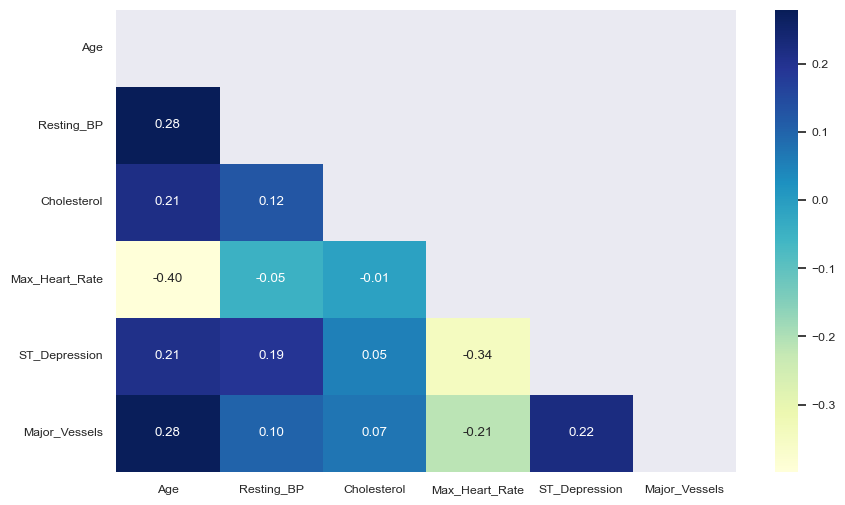

In [1179]:
# lower traingluar mask as correlation matrix is symmetric 
plt.figure(figsize=(10,6)) # setting the size of the plot 
plt.rcParams["axes.labelsize"] = 0.5 # setting the label size of the plot
lower_triangle_mask  = np.zeros_like(df.corr(method='pearson')) # a matrix of 0s whcih has same shape as df.corr()
lower_triangle_mask[np.triu_indices_from(lower_triangle_mask)] = True # setting the lower triangle indices to 1 for our mask 
sns.set(font_scale=0.8) # setting the font scale of the plot
sns.heatmap(df.corr(method='pearson'), mask = lower_triangle_mask, cmap='YlGnBu', fmt='.2f', annot=True)
plt.show()

**Note:** The only noteworthy correlation is between the age and the maximum heart rate achieved, which is negative. This means that the older the pacient, the lower the maximum heart rate achieved. Even so, the correlation has only a fair relationship strenght.

### Spearman Rank or Spearman's Rho <a class="anchor" id="spearman"></a>

In [1180]:
df.corr(method='spearman')

Age  Resting_BP  Cholesterol  Max_Heart_Rate  ST_Depression  \
Age             1.00        0.29         0.20           -0.40           0.27   
Resting_BP      0.29        1.00         0.13           -0.04           0.15   
Cholesterol     0.20        0.13         1.00           -0.05           0.05   
Max_Heart_Rate -0.40       -0.04        -0.05            1.00          -0.43   
ST_Depression   0.27        0.15         0.05           -0.43           1.00   
Major_Vessels   0.34        0.09         0.11           -0.26           0.22   

                Major_Vessels  
Age                      0.34  
Resting_BP               0.09  
Cholesterol              0.11  
Max_Heart_Rate          -0.26  
ST_Depression            0.22  
Major_Vessels            1.00

In [1181]:
df.corr(method='spearman').abs().where(np.triu(np.ones(df.corr().abs().shape), k=1).astype(np.bool)).stack().sort_values(ascending=False)

Max_Heart_Rate  ST_Depression    0.43
Age             Max_Heart_Rate   0.40
                Major_Vessels    0.34
                Resting_BP       0.29
                ST_Depression    0.27
Max_Heart_Rate  Major_Vessels    0.26
ST_Depression   Major_Vessels    0.22
Age             Cholesterol      0.20
Resting_BP      ST_Depression    0.15
                Cholesterol      0.13
Cholesterol     Major_Vessels    0.11
Resting_BP      Major_Vessels    0.09
Cholesterol     Max_Heart_Rate   0.05
                ST_Depression    0.05
Resting_BP      Max_Heart_Rate   0.04
dtype: float64

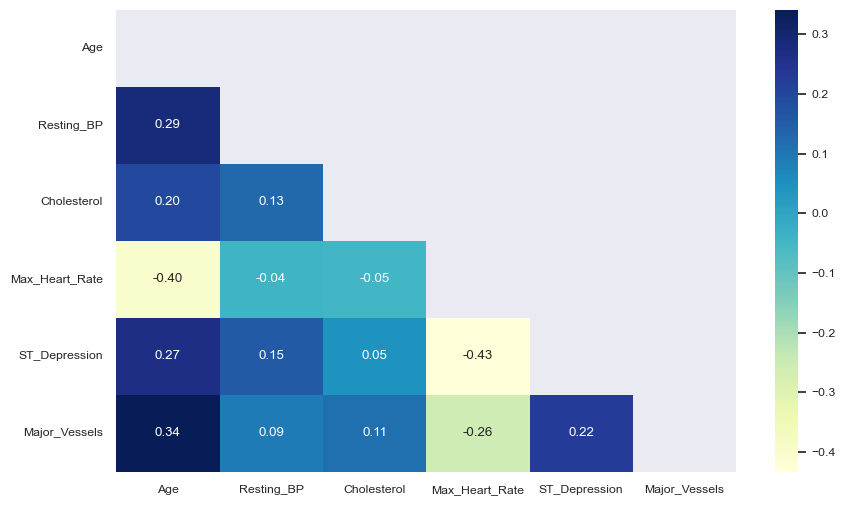

In [1182]:
# lower traingluar mask as correlation matrix is symmetric 
plt.figure(figsize=(10,6)) # setting the size of the plot 
plt.rcParams["axes.labelsize"] = 0.5 # setting the label size of the plot
lower_triangle_mask  = np.zeros_like(df.corr(method='spearman')) # a matrix of 0s whcih has same shape as df.corr()
lower_triangle_mask[np.triu_indices_from(lower_triangle_mask)] = True # setting the lower triangle indices to 1 for our mask 
sns.set(font_scale=0.8) # setting the font scale of the plot
sns.heatmap(df.corr(method='spearman'), mask = lower_triangle_mask, cmap='YlGnBu', fmt='.2f', annot=True)
plt.show()

**Note:** Two notable correlations are:
 - between the *Maximum Heart Rate* and the *ST Depression*: the higher the maximum heart rate, the lower the ST depression;
 - between the *Age* and the *Maximum Heart Rate*: the the lower the age, the higher the maximum heart rate.

Even so, the correlations have only a fair relationship strenght.

### Phi K (𝜙k) Correlation <a class="anchor" id="phi"></a>

In [1183]:
# Phi K correlation will for all variables

! pip install phik
import phik
from phik import resources, report

Defaulting to user installation because normal site-packages is not writeable


In [1184]:
df.phik_matrix()

interval columns not set, guessing: ['Age', 'Resting_BP', 'Cholesterol', 'Max_Heart_Rate', 'ST_Depression', 'Major_Vessels']


Age  Gender  Chest_Pain  Resting_BP  Cholesterol  \
Age             1.00    0.00        0.18        0.26         0.00   
Gender          0.00    1.00        0.17        0.00         0.28   
Chest_Pain      0.18    0.17        1.00        0.20         0.00   
Resting_BP      0.26    0.00        0.20        1.00         0.00   
Cholesterol     0.00    0.28        0.00        0.00         1.00   
Fasting_Sugar   0.00    0.00        0.08        0.16         0.00   
Resting_ECG     0.32    0.05        0.08        0.28         0.22   
Max_Heart_Rate  0.53    0.22        0.35        0.22         0.00   
Exercise_Angina 0.09    0.19        0.66        0.13         0.00   
ST_Depression   0.00    0.00        0.27        0.23         0.09   
ST_Slope        0.04    0.00        0.20        0.03         0.00   
Major_Vessels   0.49    0.09        0.19        0.10         0.00   
Thallium_Test   0.16    0.55        0.46        0.00         0.00   
Outcome         0.34    0.41        0.72        0.00         0.08   

                 Fasting_Sugar  Resting_ECG  Max_Heart_Rate  Exercise_Angina  \
Age                       0.00         0.32            0.53             0.09   
Gender                    0.00         0.05            0.22             0.19   
Chest_Pain                0.08         0.08            0.35             0.66   
Resting_BP                0.16         0.28            0.22             0.13   
Cholesterol               0.00         0.22            0.00             0.00   
Fasting_Sugar             1.00         0.02            0.01             0.00   
Resting_ECG               0.02         1.00            0.14             0.03   
Max_Heart_Rate            0.01         0.14            1.00             0.50   
Exercise_Angina           0.00         0.03            0.50             1.00   
ST_Depression             0.00         0.65            0.30             0.28   
ST_Slope                  0.04         0.32            0.45             0.17   
Major_Vessels             0.09         0.08            0.33             0.14   
Thallium_Test             0.14         0.00            0.29             0.47   
Outcome                   0.00         0.10            0.53             0.62   

                 ST_Depression  ST_Slope  Major_Vessels  Thallium_Test  \
Age                       0.00      0.04           0.49           0.16   
Gender                    0.00      0.00           0.09           0.55   
Chest_Pain                0.27      0.20           0.19           0.46   
Resting_BP                0.23      0.03           0.10           0.00   
Cholesterol               0.09      0.00           0.00           0.00   
Fasting_Sugar             0.00      0.04           0.09           0.14   
Resting_ECG               0.65      0.32           0.08           0.00   
Max_Heart_Rate            0.30      0.45           0.33           0.29   
Exercise_Angina           0.28      0.17           0.14           0.47   
ST_Depression             1.00      0.74           0.32           0.34   
ST_Slope                  0.74      1.00           0.10           0.23   
Major_Vessels             0.32      0.10           1.00           0.14   
Thallium_Test             0.34      0.23           0.14           1.00   
Outcome                   0.44      0.24           0.40           0.73   

                 Outcome  
Age                 0.34  
Gender              0.41  
Chest_Pain          0.72  
Resting_BP          0.00  
Cholesterol         0.08  
Fasting_Sugar       0.00  
Resting_ECG         0.10  
Max_Heart_Rate      0.53  
Exercise_Angina     0.62  
ST_Depression       0.44  
ST_Slope            0.24  
Major_Vessels       0.40  
Thallium_Test       0.73  
Outcome             1.00

In [1185]:
# The first 20 correlations in descending order, excluding the diagonal
df.phik_matrix().abs().where(np.triu(np.ones(df.phik_matrix().abs().shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(20)

interval columns not set, guessing: ['Age', 'Resting_BP', 'Cholesterol', 'Max_Heart_Rate', 'ST_Depression', 'Major_Vessels']
interval columns not set, guessing: ['Age', 'Resting_BP', 'Cholesterol', 'Max_Heart_Rate', 'ST_Depression', 'Major_Vessels']


ST_Depression    ST_Slope          0.74
Thallium_Test    Outcome           0.73
Chest_Pain       Outcome           0.72
                 Exercise_Angina   0.66
Resting_ECG      ST_Depression     0.65
Exercise_Angina  Outcome           0.62
Gender           Thallium_Test     0.55
Max_Heart_Rate   Outcome           0.53
Age              Max_Heart_Rate    0.53
Max_Heart_Rate   Exercise_Angina   0.50
Age              Major_Vessels     0.49
Exercise_Angina  Thallium_Test     0.47
Chest_Pain       Thallium_Test     0.46
Max_Heart_Rate   ST_Slope          0.45
ST_Depression    Outcome           0.44
Gender           Outcome           0.41
Major_Vessels    Outcome           0.40
Chest_Pain       Max_Heart_Rate    0.35
ST_Depression    Thallium_Test     0.34
Age              Outcome           0.34
dtype: float64

interval columns not set, guessing: ['Age', 'Resting_BP', 'Cholesterol', 'Max_Heart_Rate', 'ST_Depression', 'Major_Vessels']
interval columns not set, guessing: ['Age', 'Resting_BP', 'Cholesterol', 'Max_Heart_Rate', 'ST_Depression', 'Major_Vessels']


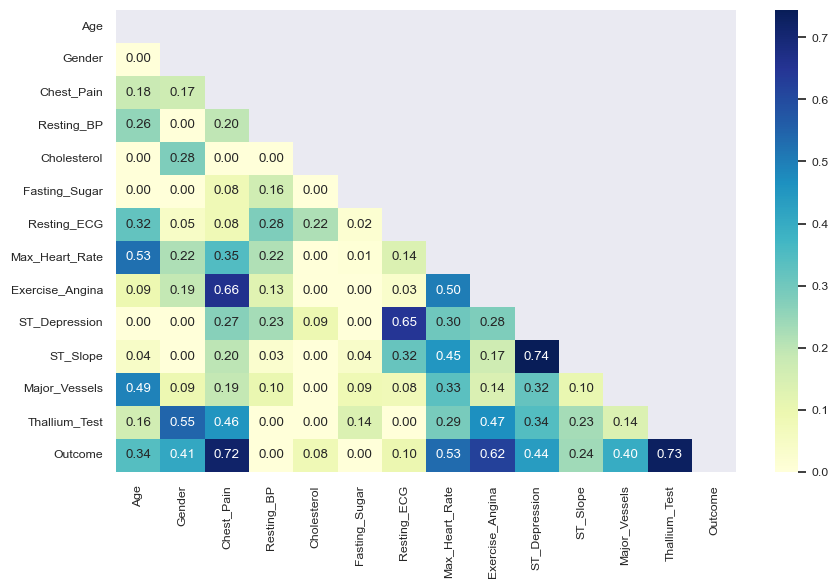

In [1186]:
# lower traingluar mask as correlation matrix is symmetric 
plt.figure(figsize=(10,6)) # setting the size of the plot 
plt.rcParams["axes.labelsize"] = 0.5 # setting the label size of the plot
lower_triangle_mask  = np.zeros_like(df.phik_matrix()) # a matrix of 0s whcih has same shape as df.corr()
lower_triangle_mask[np.triu_indices_from(lower_triangle_mask)] = True # setting the lower triangle indices to 1 for our mask 
sns.set(font_scale=0.8) # setting the font scale of the plot
sns.heatmap(df.phik_matrix(), mask = lower_triangle_mask, cmap='YlGnBu', fmt='.2f', annot=True)
plt.show()

**Note:** In the case of the 𝜙k Correlation, there are several moderate to good relationships:
 - *ST_Depression* & *ST_Slope*: the higher the ST depression, the higher the ST slope, and vice-versa;
 - *Thallium_Test* & *Outcome*: the higher the thallium test result, the higher the risk of heart attack;
 - *Chest_Pain* & *Outcome*: the higher the chest pain, the higher the risk of heart attack;
 - *Exercise_Angina* & *Outcome*: the higher the exercise induced angina, the higher the risk of heart attack;
 - *Chest_Pain* & *Exercise_Angina*: the higher the chest pain, the higher the probability of exercise induced angina;

### Statistical Distributions <a class="anchor" id="distributions"></a>

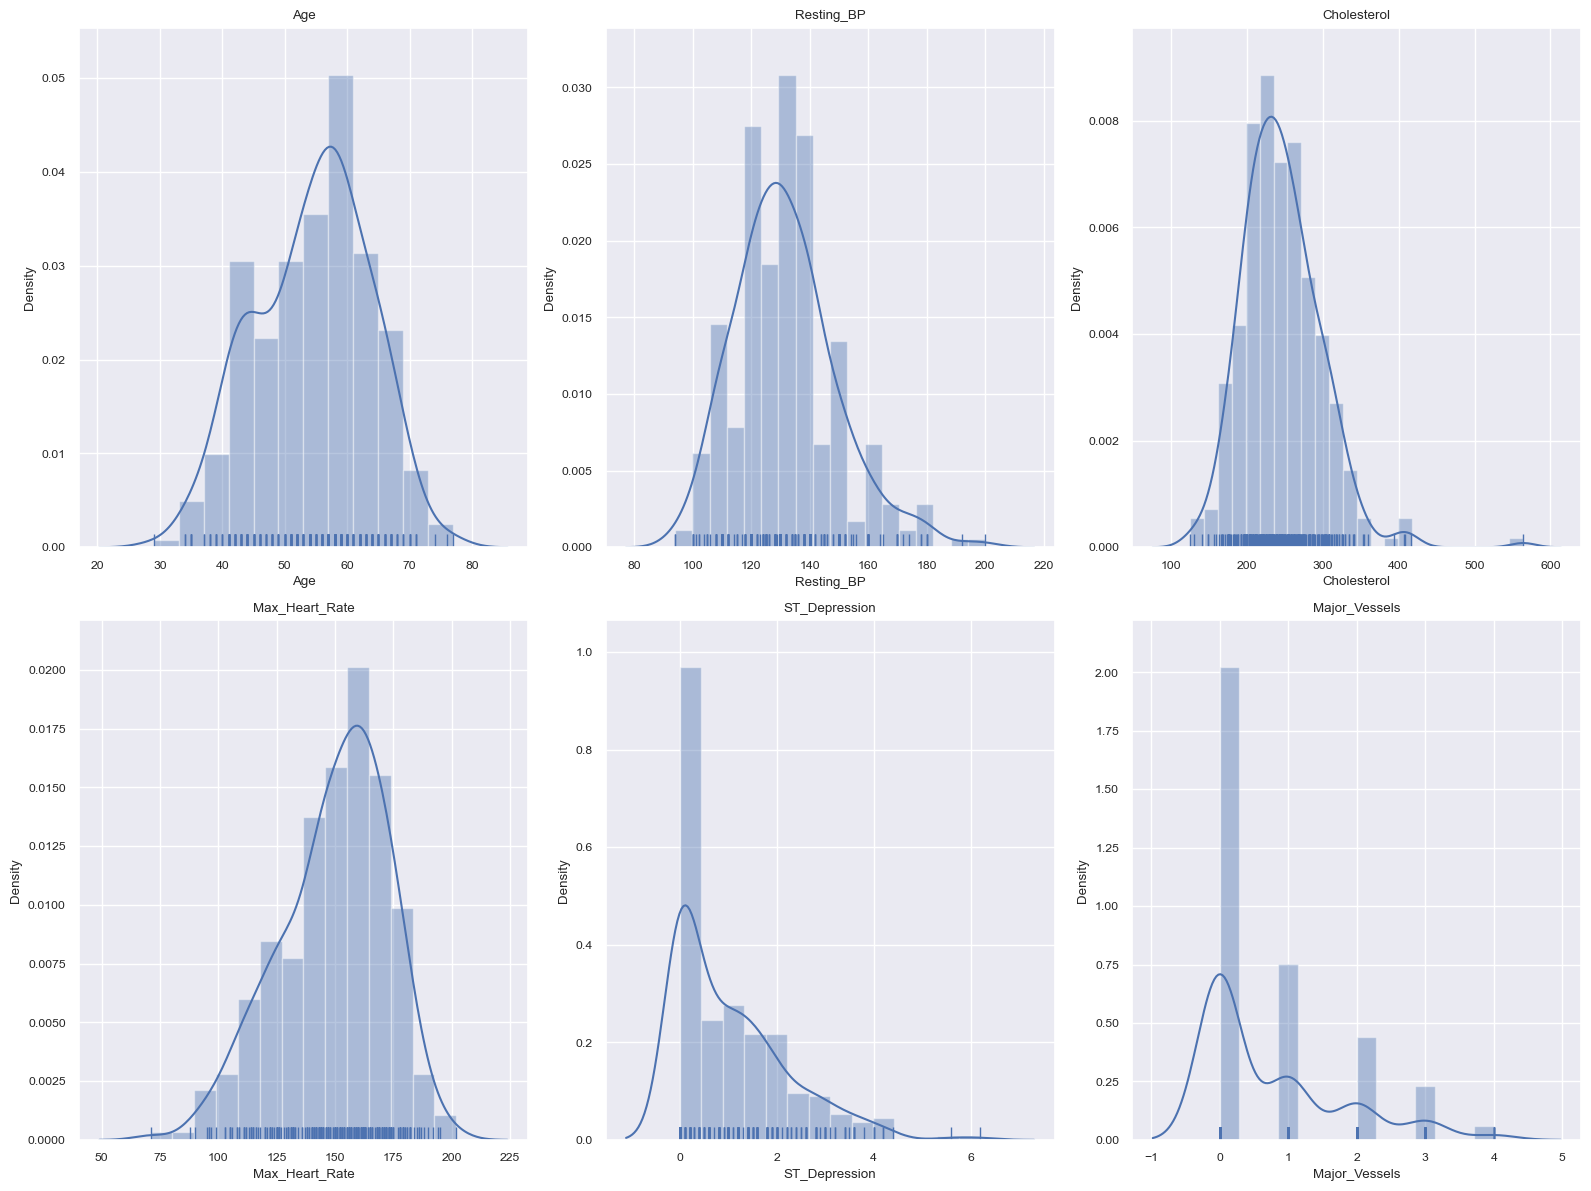

In [1187]:
plt.figure(figsize=(16, 12))

pos = 0
for i, variable in enumerate(df.columns):
    if df[variable].dtype != 'object':
        plt.subplot(2, 3, pos + 1)
        sns.distplot(df[variable], rug=True)
        plt.title(variable)
        pos += 1

plt.tight_layout()
plt.show()

**Note**:
- The *Age* variable has a normal distribution;
- The *Resting Blood Pressure* variable has a normal distribution;
- The *Serum Cholesterol* variable has a normal distribution, but it exhibits a relatively high number of outliers on the right side;
- The *Maximum Heart Rate* variable has a slightly left-skewed distribution;
- The *ST Depression* variable has a right-skewed distribution, which is expected, since the *normal* value is 0;
- The *Number of Major Vessels* variable has a multimodal distribution.

In [1188]:
# From UT Austin Computer Science Department
# Use this function to create a combo boxplot and histogram for continuous (I/R --> int64 and float) variables

def boxplot_histogram(feature, figsize=(12,8), bins = None):
    sns.set(font_scale=2) 
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, 
                                           sharex = True,
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    sns.boxplot(feature, orient="h", ax=ax_box2, showmeans=True, color='red') # mean value will be noted
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2, fit=norm)
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    plt.axvline(feature.mode()[0], color='r', linestyle='dashed', linewidth=1); #Add mode 

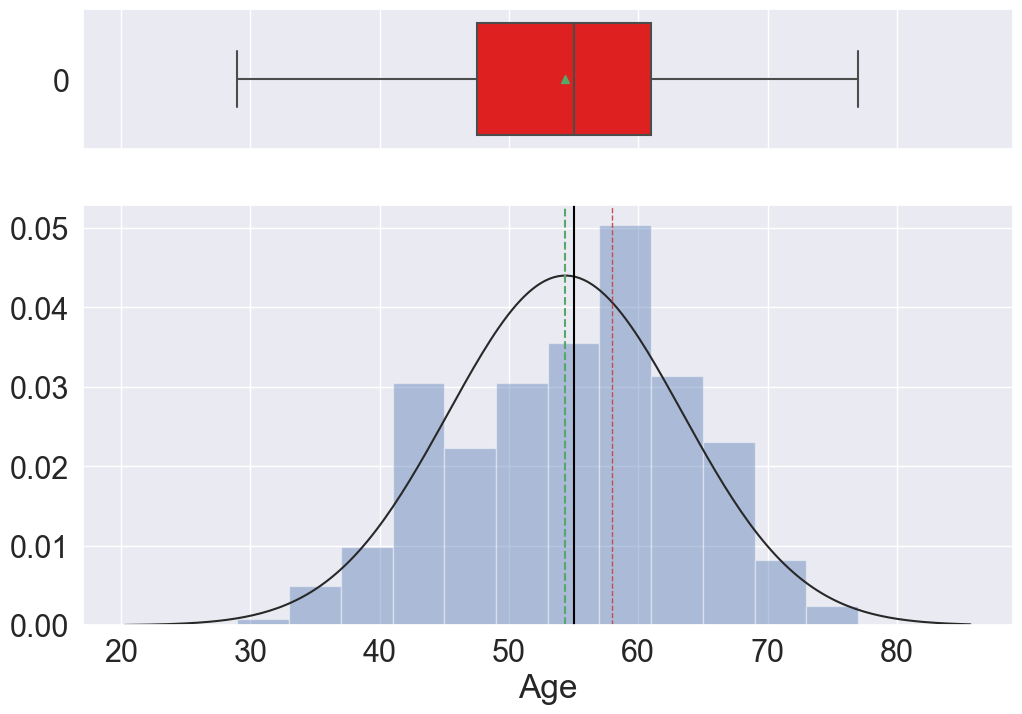

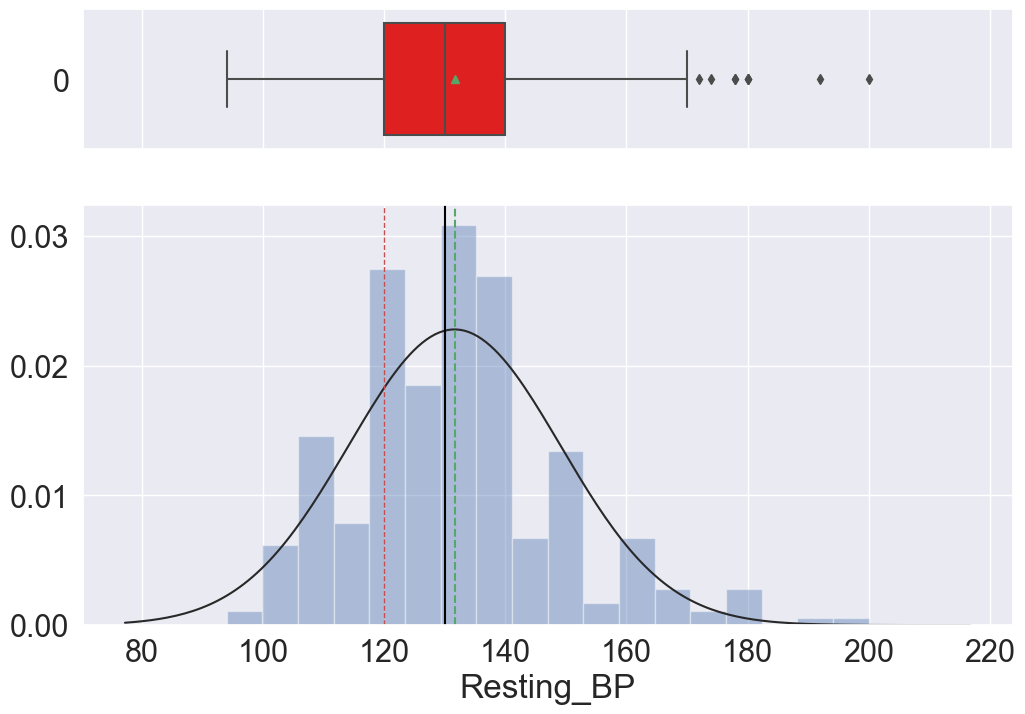

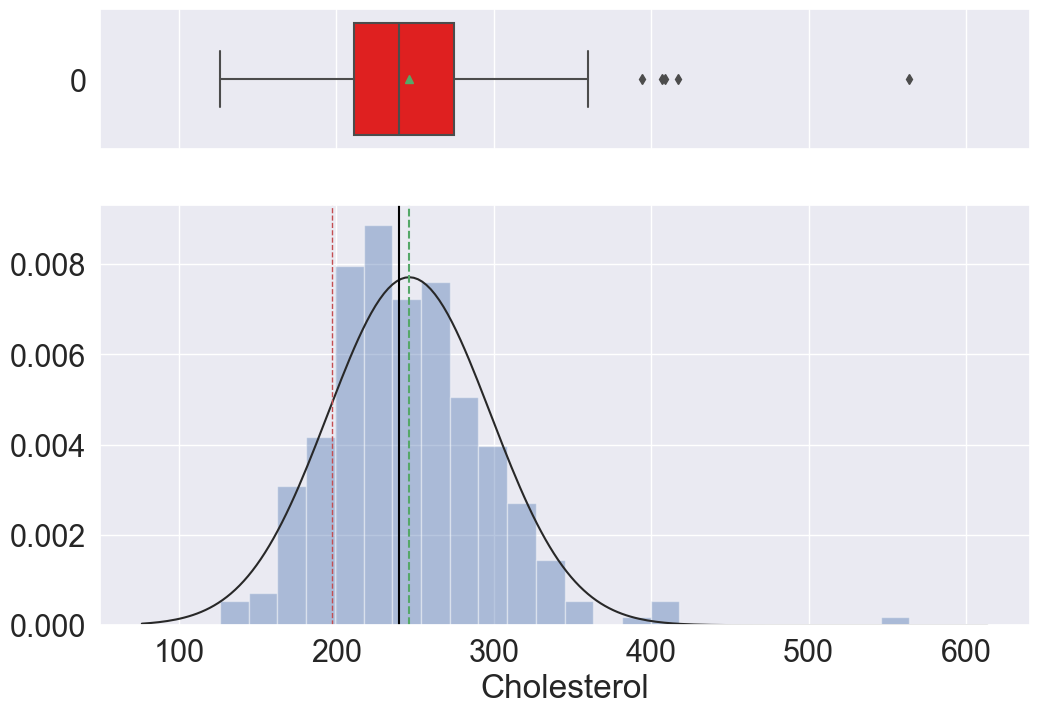

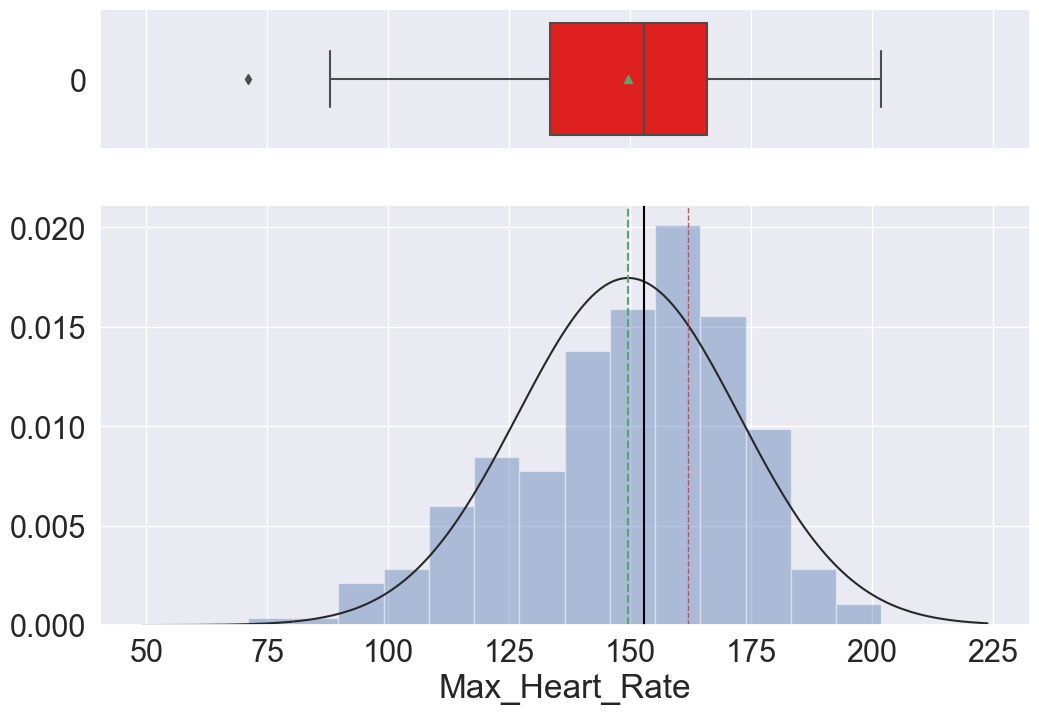

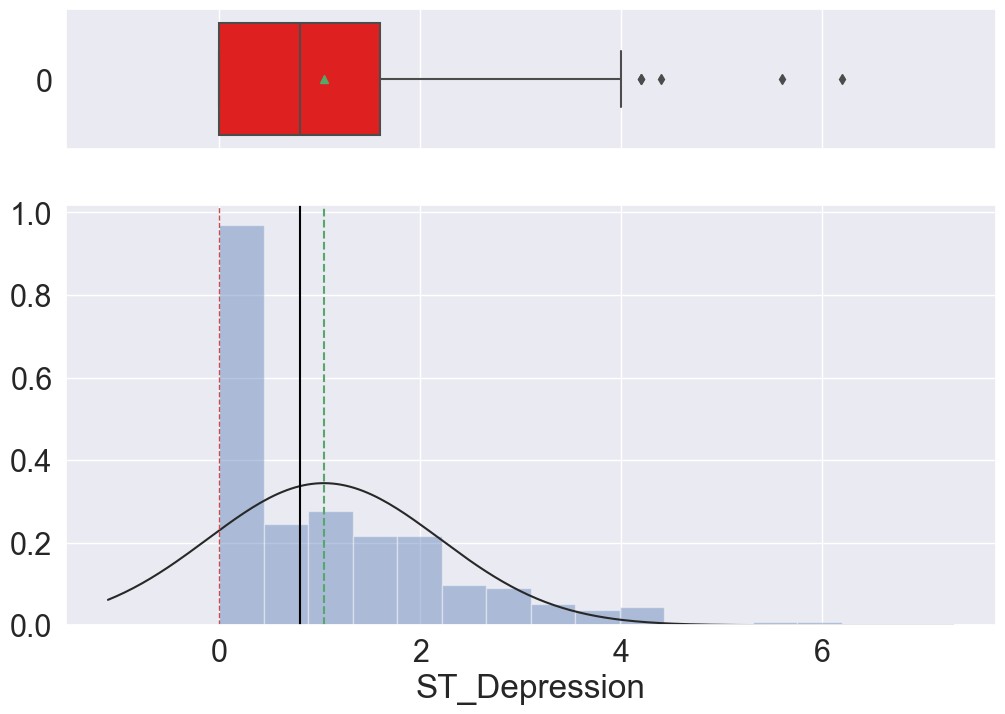

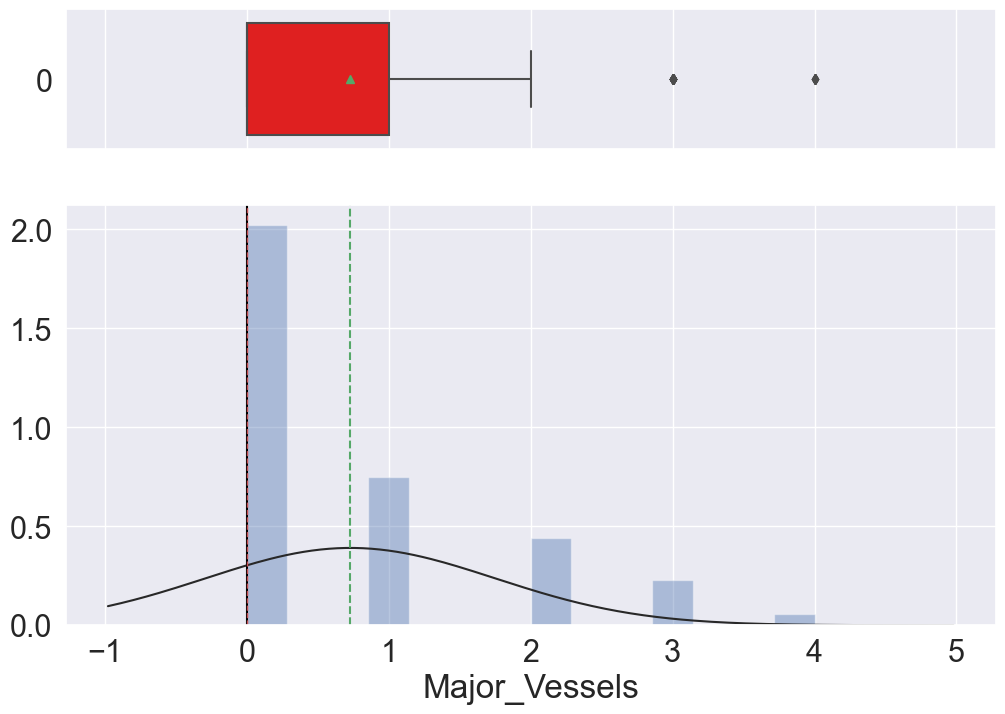

In [1189]:
# Boxplot for all continuous variables
for col in df.columns:
    if df[col].dtype != 'object':
        boxplot_histogram(df[col], figsize=(12,8))

### Outcome Class Balance

In [1190]:
df['Outcome'].value_counts()

Low Risk     165
High Risk    138
Name: Outcome, dtype: int64

In [1191]:
# Function to create plot for categorical

def barplot(ax, feature):
    total = len(feature) # column length
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage in each category class
        x = p.get_x() + 0.01
        y = p.get_y() + p.get_height() + 0.5 # plot height
        ax.annotate(percentage, (x, y), size=12)
    plt.show()

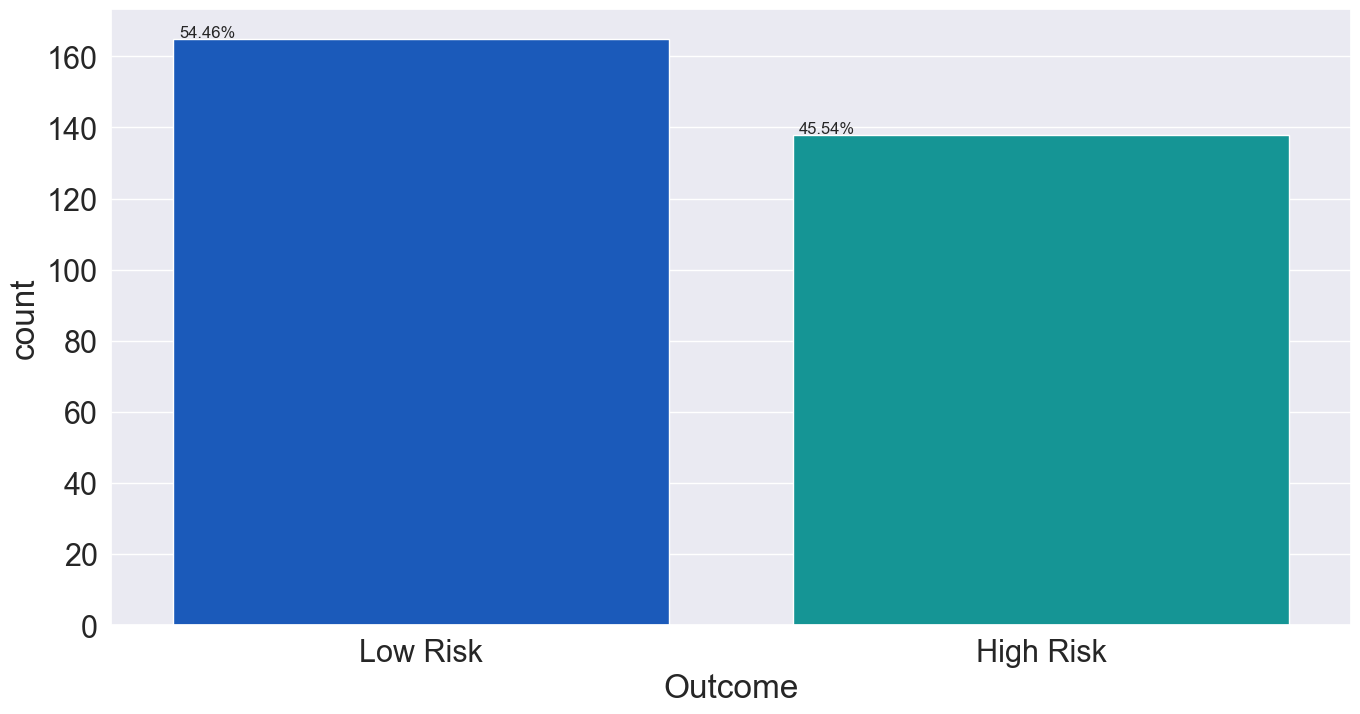

In [1192]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(x=df['Outcome'], data=df, palette='winter')
barplot(ax, df['Outcome'])

**Note:** The dataset is balanced, with 54.5% of the pacients being at low risk of heart attack and 45.5% being at high risk of heart attack.

### Bivariate Correlations <a class="anchor" id="bivariate"></a>

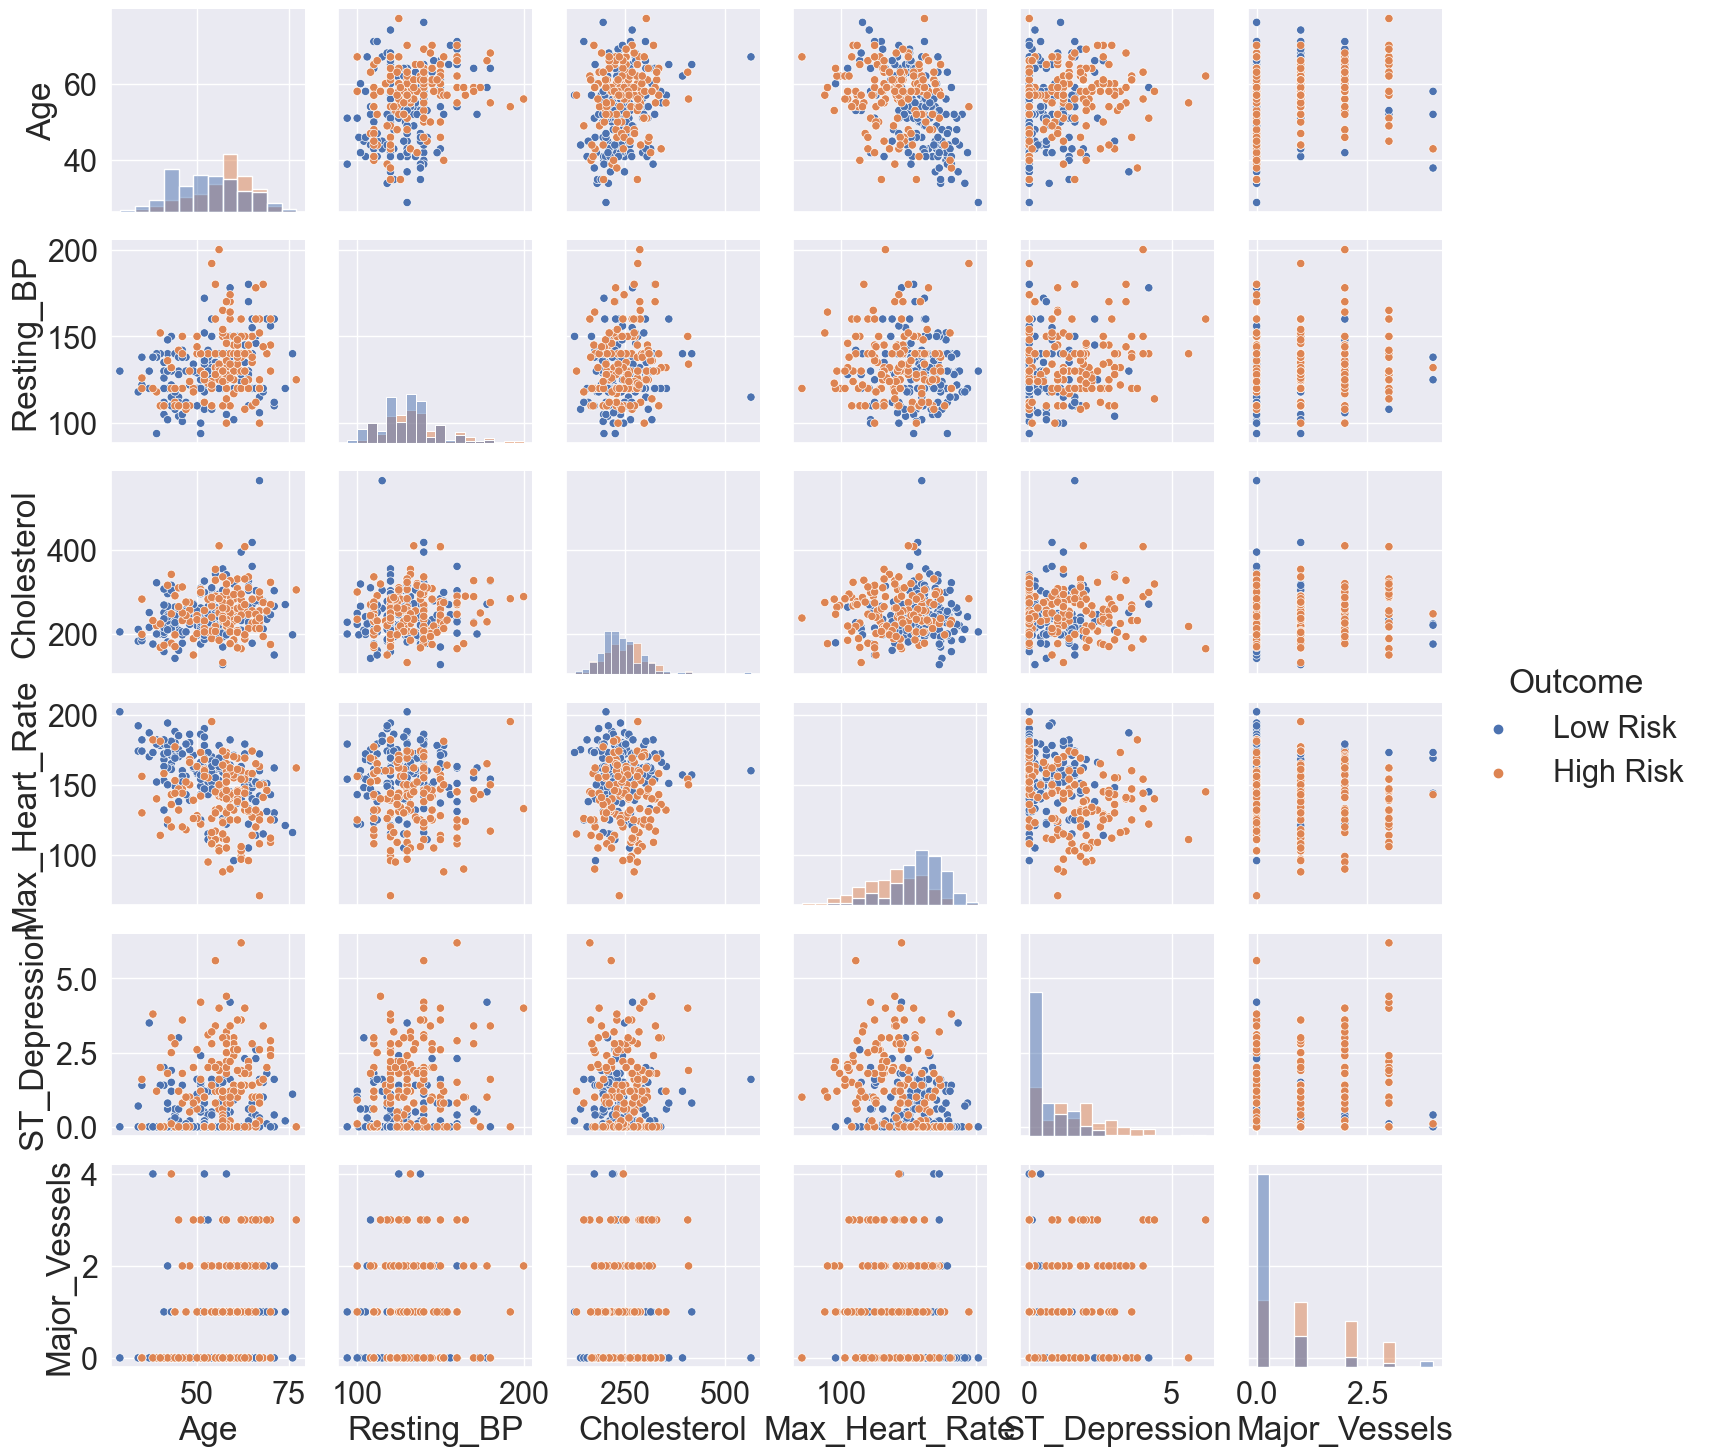

In [1193]:
sns.pairplot(df, hue='Outcome', diag_kind='hist');

**Note:** There doesn't seem to be a single variable or just a pair of variables that can be used to predict the risk of heart attack. The outcome is scattered across all plots. 

### *Outcome* with *Thallium Test Result* <a class="anchor" id="thallium"></a>

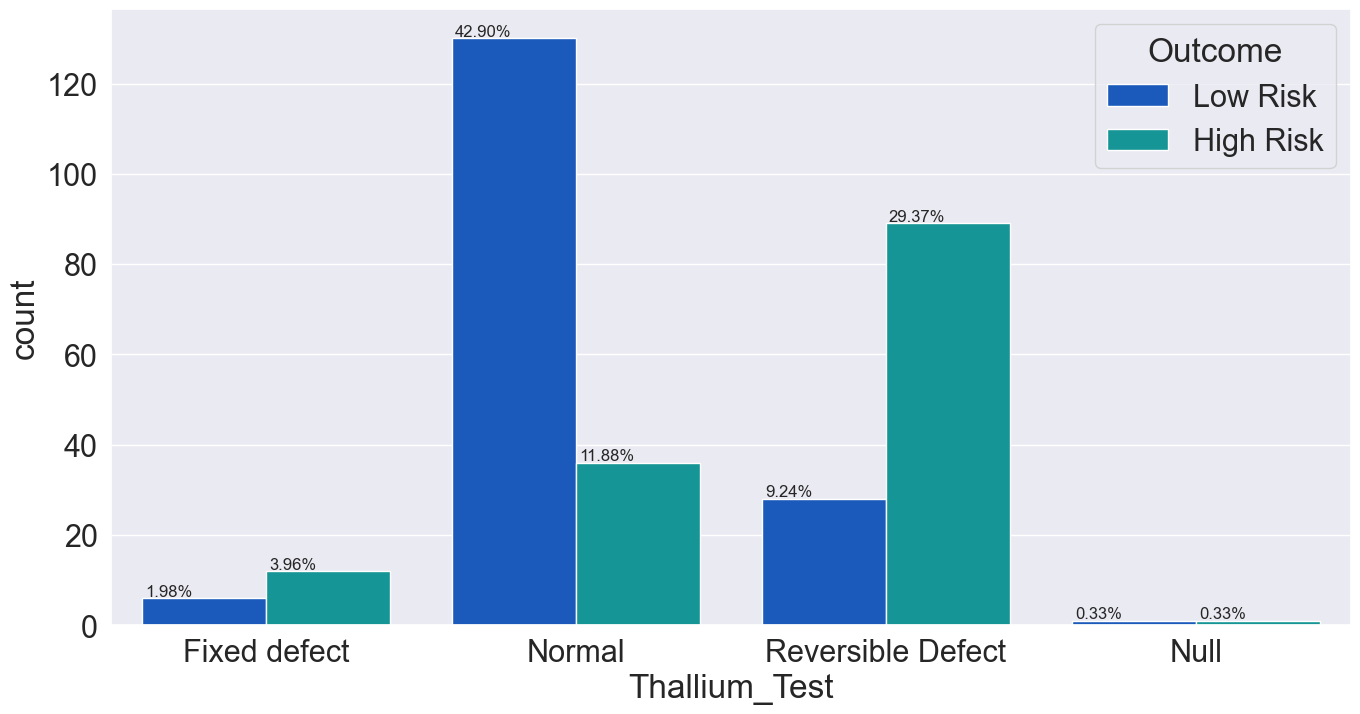

In [1194]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(x=df['Thallium_Test'], data=df, hue=df['Outcome'], palette='winter')
barplot(ax, df['Thallium_Test'])

**Note:** For the *Thallium Test*, the *Fixed Defect* and *Reversible Defect* results have a higher risk of heart attack than the *Normal* result. That being said, the *Normal* result indicates with a high probability that the pacient is at low risk of heart attack (~78% of patients). The *Reversible Defect* result has a high probability of indicating that the pacient is at high risk of heart attack (~76% of patients). The *Fixed Defect* result indicates that a high risk of heart attack might be present (~66% of patients).

### *Outcome* with *Chest Pain Type* <a class="anchor" id="chest"></a>

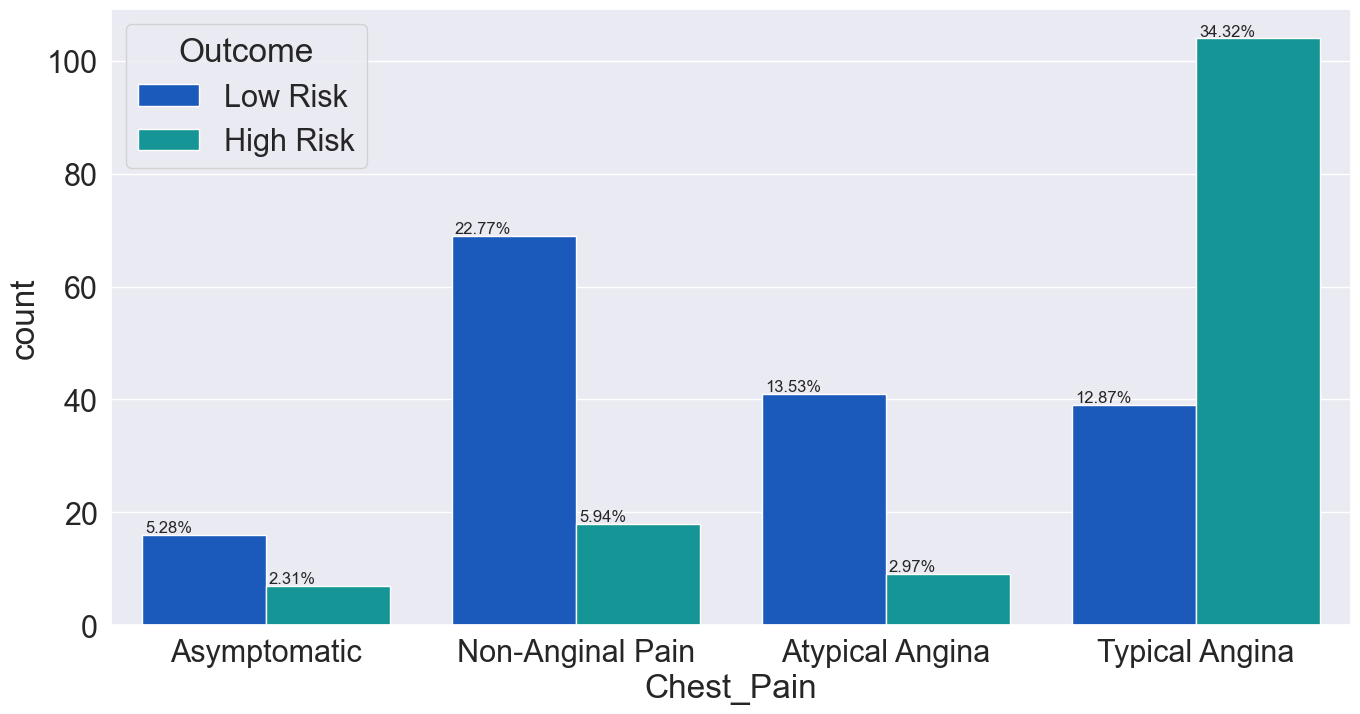

In [1195]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(x=df['Chest_Pain'], data=df, hue=df['Outcome'], palette='winter')
barplot(ax, df['Chest_Pain'])

**Note:** For the *Chest Pain* variable, the *Typical Angina* predicts with a high probability that the pacient is at high risk of heart attack (~73% of patients). The rest of the chest pain types predict with a high probability that the pacient is at low risk of heart attack (~82% for *Atypical Angina*, ~79% for *Non-Anginal Pain*, ~70% for *Asymptomatic*).

### *Outcome* with *Exercise Induced Angina* <a class="anchor" id="angina"></a>

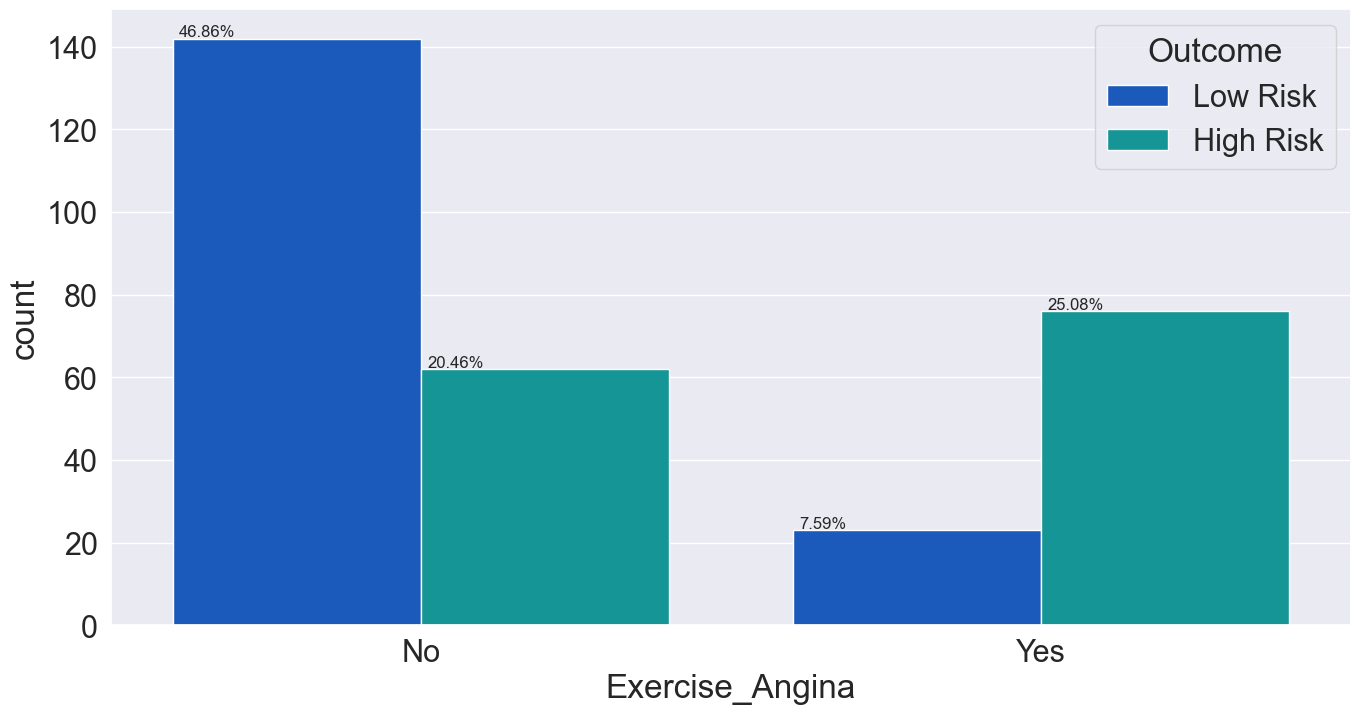

In [1196]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(x=df['Exercise_Angina'], data=df, hue=df['Outcome'], palette='winter')
barplot(ax, df['Exercise_Angina'])

**Note:** For the *Exercise Induced Angina* variable, the *Yes* value predicts with a high probability that the pacient is at high risk of heart attack (~77% of patients). The *No* value predicts with a high probability that the pacient is at low risk of heart attack (~70% of patients).

The variables *Thallium Test*, *Chest Pain* and *Exercise Angina* appear to be the most significant factors in predicting the risk of a heart attack. Individually, each of these variables can provide a relatively high probability (70-80%) of predicting the risk. However, when considering all factors together, it becomes challenging to discern a clear pattern.

### *Outcome* with *Max Heart Rate* <a class="anchor" id="maxhr"></a>

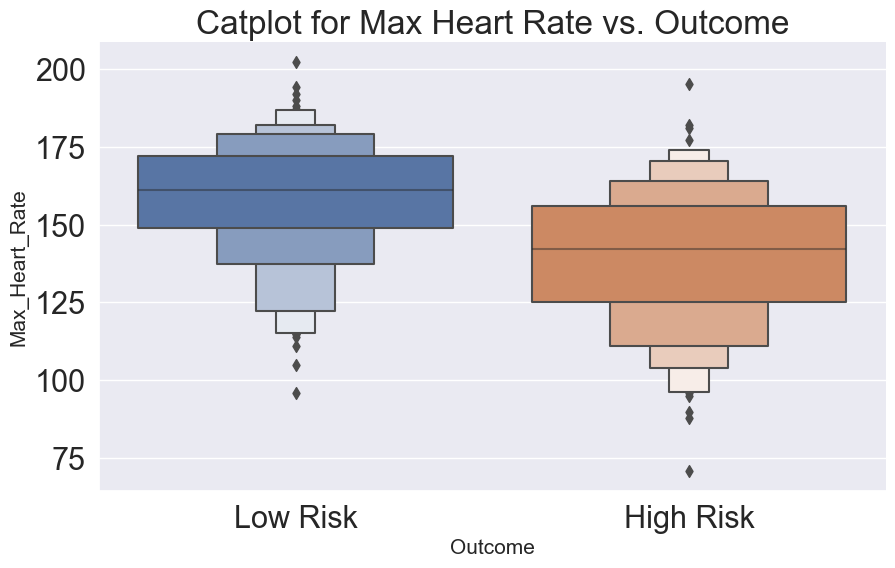

In [1197]:
# Catplot
sns.catplot(x="Outcome", y="Max_Heart_Rate", data=df, kind='boxen', height=6, aspect=1.6, estimator=np.mean);
plt.xlabel('Outcome', fontsize=15);
plt.title('Catplot for Max Heart Rate vs. Outcome')
plt.ylabel('Max_Heart_Rate', fontsize=15);

**Note:** The correlation between the *Max Heart Rate* and the *Output* is also visible in the catplot. The lower the maximum heart rate, the higher the risk of heart attack. However, the correlation is not very strong.

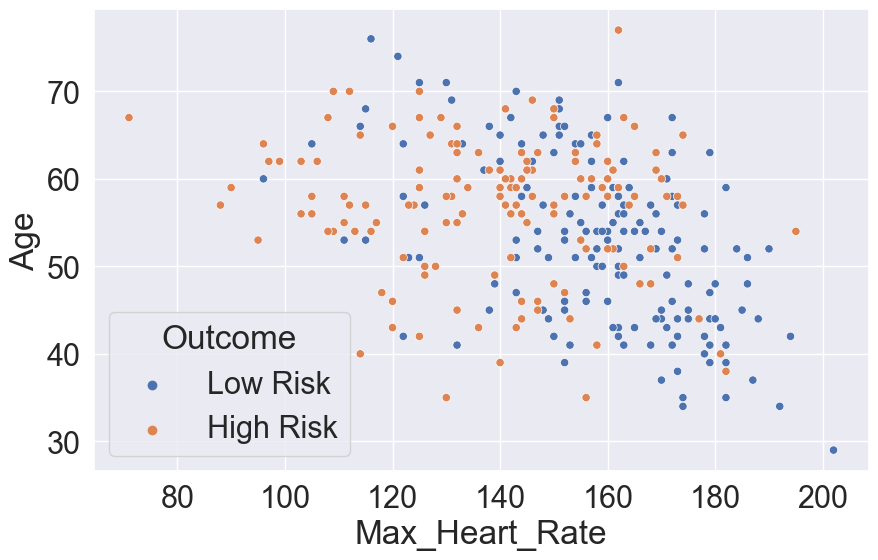

In [1198]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='Age', x='Max_Heart_Rate', hue='Outcome', data=df);

**Note:** The scatterplot of the *Age* and *Max Heart Rate* variables reveals a more pronounced clustering pattern in relation to the *Output* variable. As age increases and maximum heart rate decreases, the risk of a heart attack also rises.

### *Outcome* with *Age* <a class="anchor" id="age"></a>

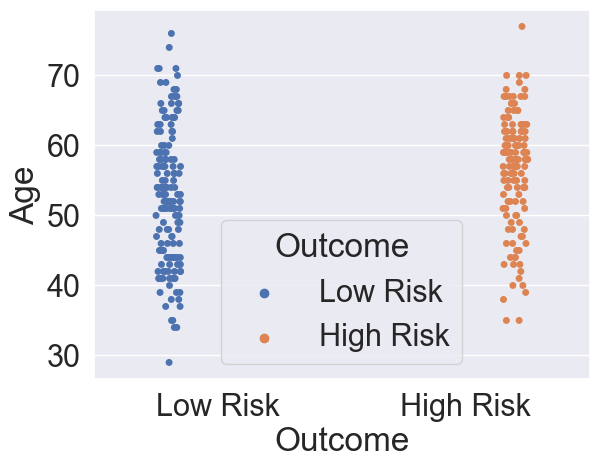

In [1199]:
sns.stripplot(data=df, x='Outcome', y='Age', jitter=True, hue='Outcome', dodge=True);

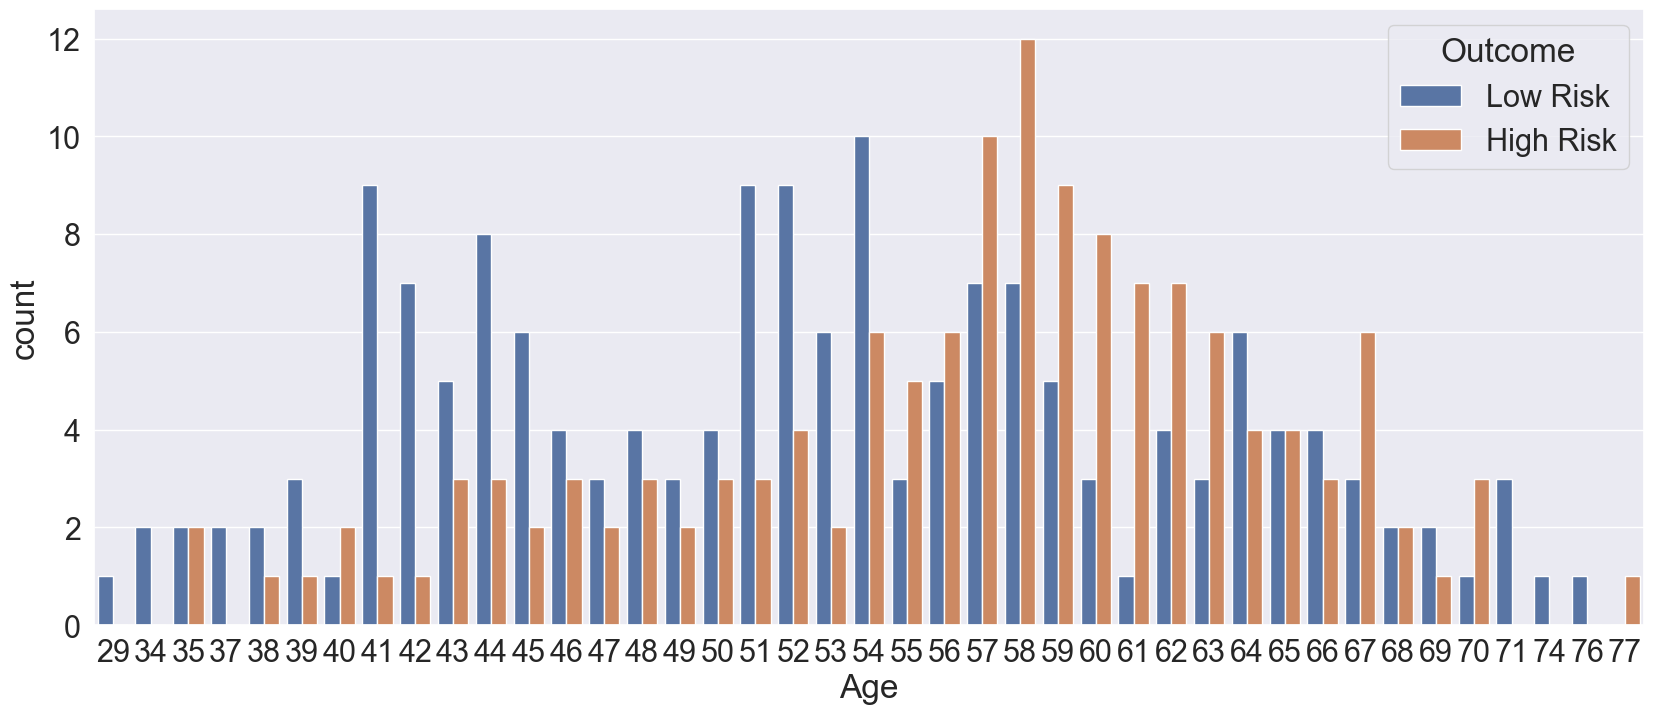

In [1200]:
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='Age', hue='Outcome');

**Note:** The *age* of the pacients is not a good predictor of the risk of heart attack. While the majority of the pacients with a high risk of heart attack are older, there are also a significant number of pacients with a low risk of heart attack that are older.

### *Outcome* with *ST Depression* <a class="anchor" id="st_d"></a>

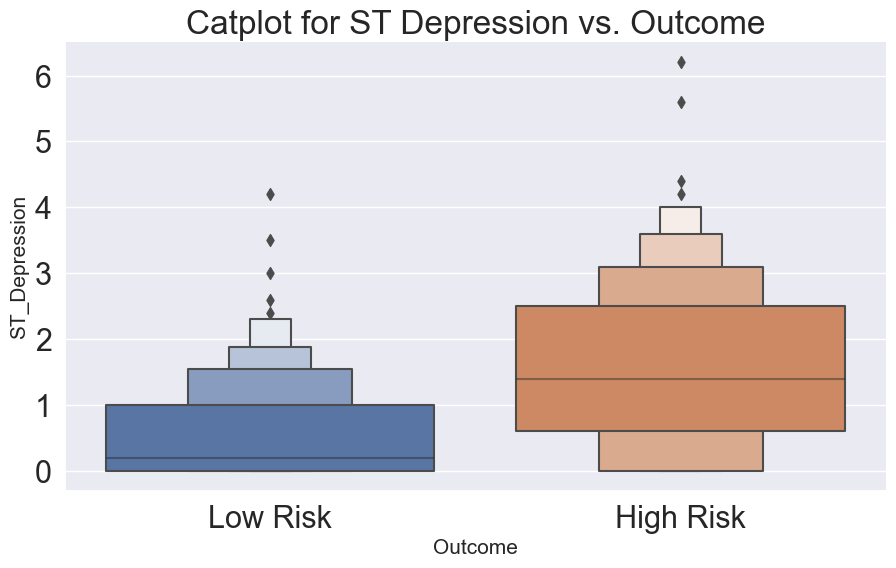

In [1201]:
# Catplot
sns.catplot(x="Outcome", y="ST_Depression", data=df, kind='boxen', height=6, aspect=1.6, estimator=np.mean);
plt.xlabel('Outcome', fontsize=15);
plt.title('Catplot for ST Depression vs. Outcome')
plt.ylabel('ST_Depression', fontsize=15);

**Note:** The variable *ST Depression* is not a strong predictor of the risk of a heart attack. Although a higher ST depression is observed in the majority of patients with a high risk of heart attack, there is a notable presence of patients with a low risk of heart attack who also exhibit higher ST depression levels.

### *Outcome* with *Number of Major Vessels* <a class="anchor" id="vessels"></a>

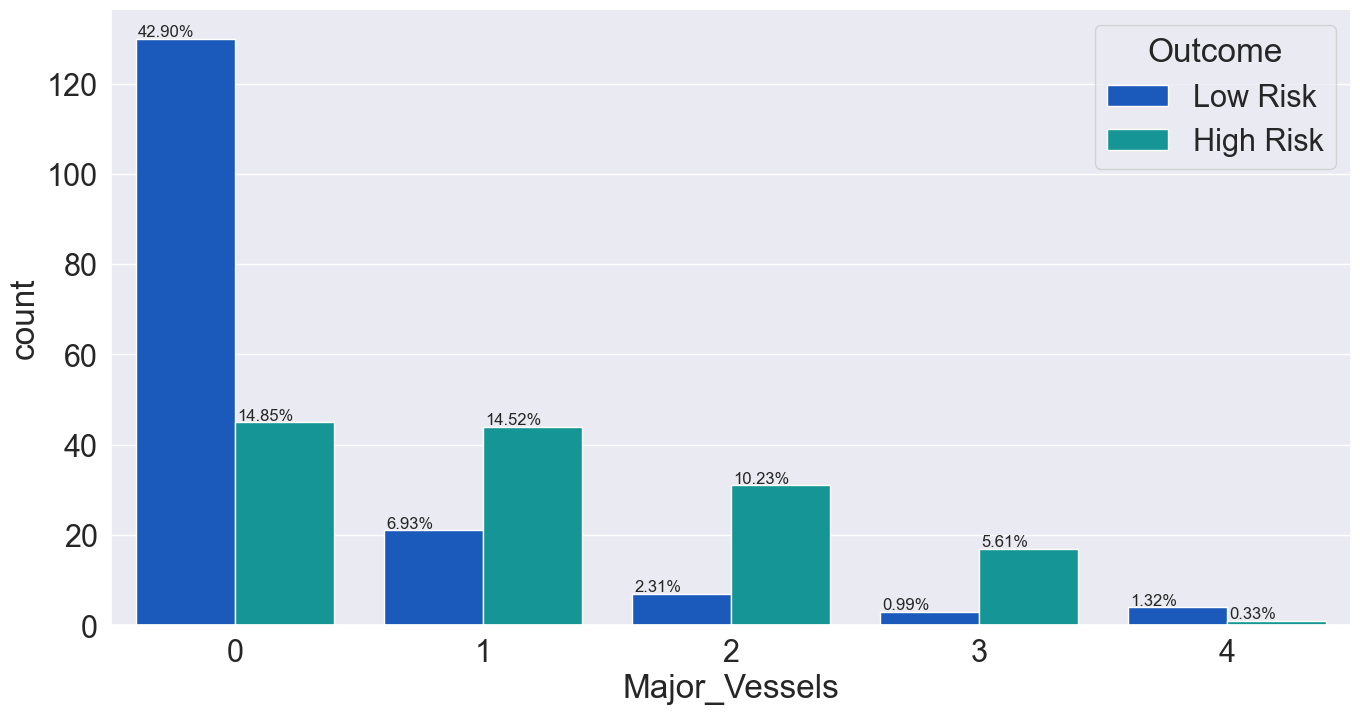

In [1202]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(x=df['Major_Vessels'], data=df, hue=df['Outcome'], palette='winter')
barplot(ax, df['Major_Vessels'])

**Note:** The variable *Number of Major Vessels* is not a strong predictor of the risk of a heart attack. Although a higher number of major vessels is observed in the majority of patients with a high risk of heart attack, there is a notable presence of patients with a low risk of heart attack who also exhibit a higher number of major vessels. Even so, a high number of patients with 0 major vessels colored by fluoroscopy are at low risk of heart attack (~74%).

## Supervised Machine Learning (Classification) <a class="anchor" id="ml"></a>

### Code to Treat Outliers <a class="anchor" id="outliers"></a>

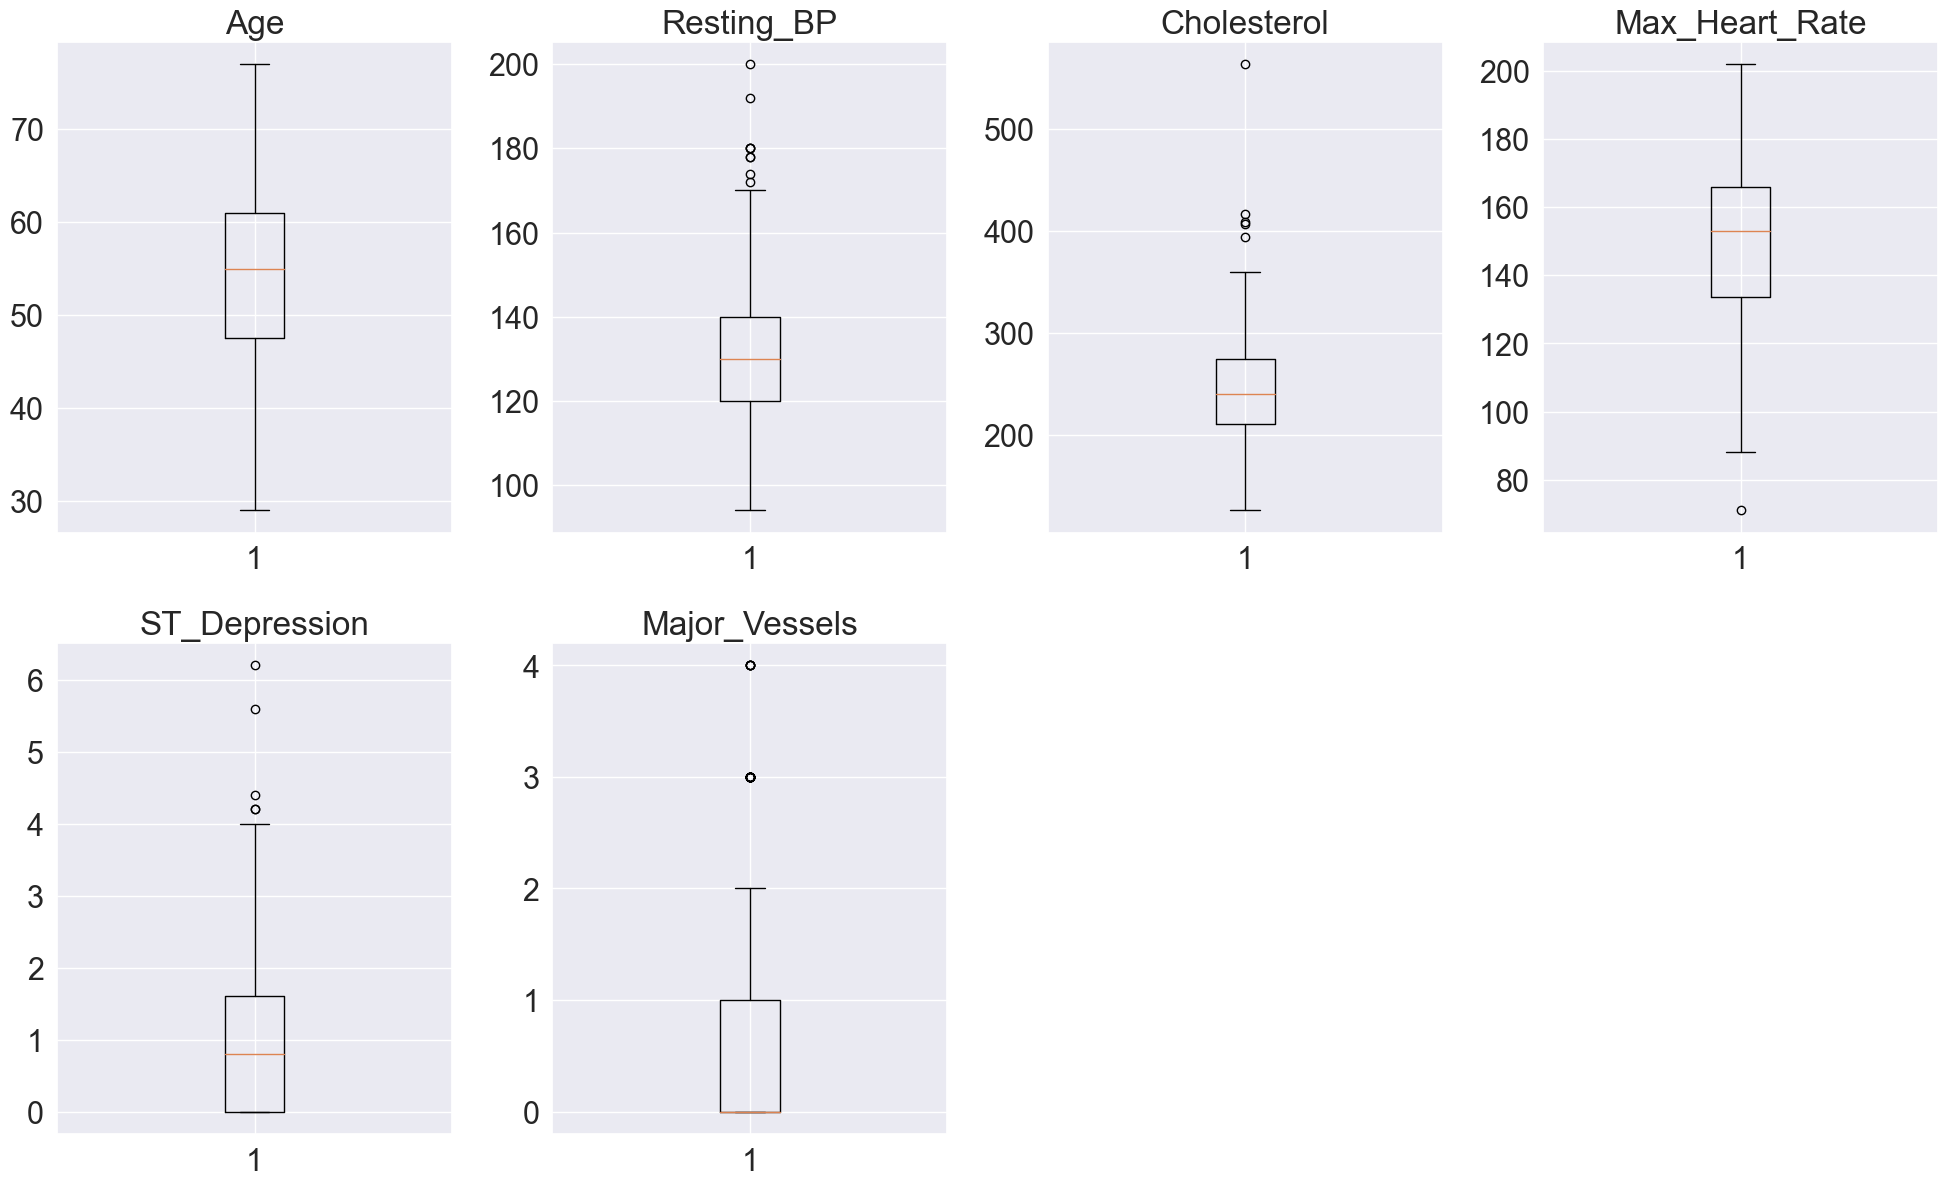

In [1203]:
# Outlier detection using boxplots (for all I/R variables)

plt.figure(figsize=(20,30))

pos = 0
for i, variable in enumerate(df):
    if df[variable].dtype != 'object':
      plt.subplot(5,4,pos+1)
      plt.boxplot(df[variable],whis=1.5)
      plt.tight_layout()
      plt.title(variable)
      pos += 1
                    
plt.show()

In [1204]:
# Use flooring and capping method
def treat_outliers(df,col):
    '''
    col: str, name of the numerical variable
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) 
    Q3=df[col].quantile(0.75) 
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)                                                            
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
    return df

In [1205]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,numerical_col)

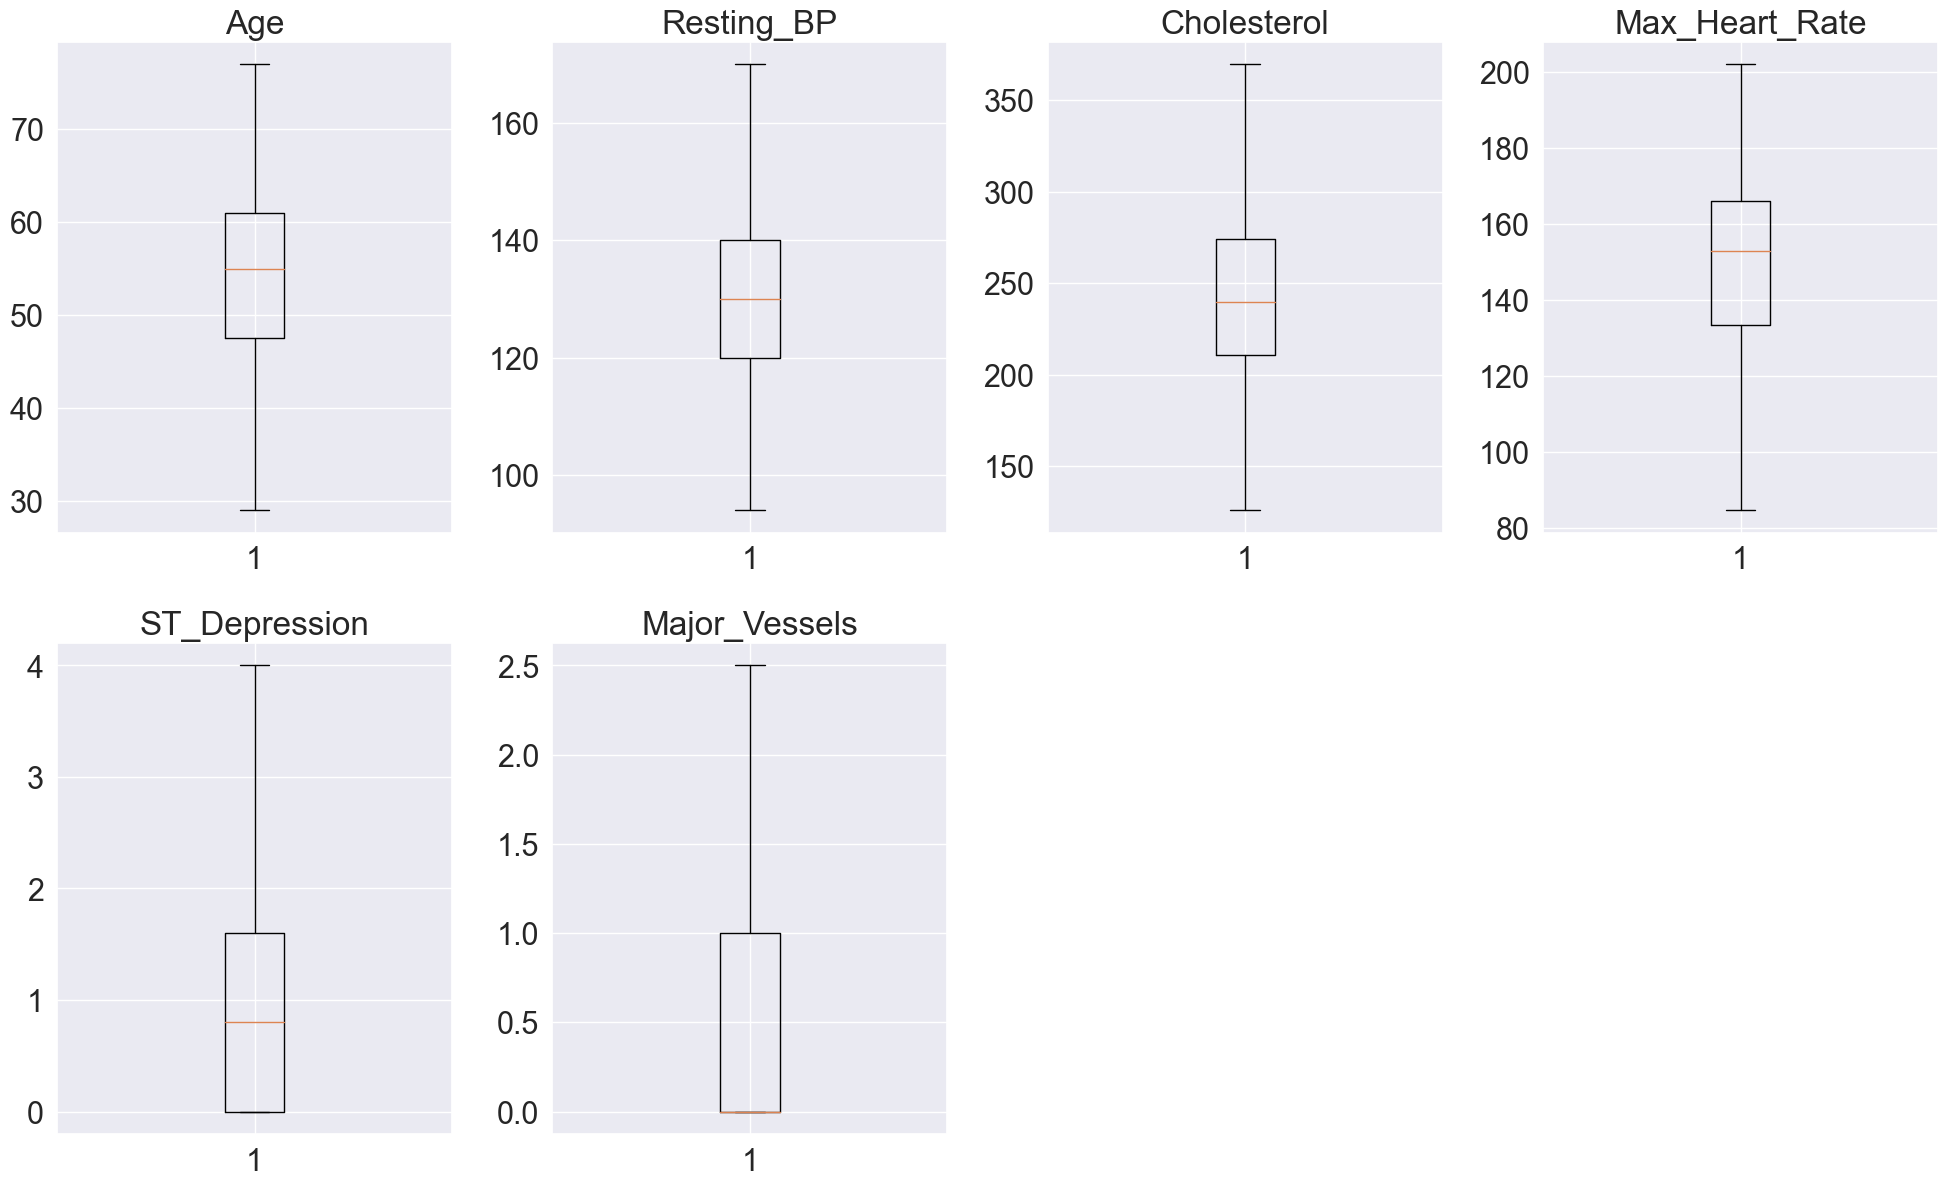

In [1206]:
plt.figure(figsize=(20,30))

pos = 0
for i, variable in enumerate(df):
    if df[variable].dtype != 'object':
      plt.subplot(5,4,pos+1)
      plt.boxplot(df[variable],whis=1.5)
      plt.tight_layout()
      plt.title(variable)
      pos += 1
                    
plt.show()

### Replacing categorical values with numerical values <a class="anchor" id="categorical"></a>

In [1207]:
np.random.seed()
df.sample(n=15).T

142                201                236  \
Age                                 42                 60                 58   
Gender                               F                  M                  M   
Chest_Pain            Non-Anginal Pain     Typical Angina     Typical Angina   
Resting_BP                         120                125                125   
Cholesterol                     209.00             258.00             300.00   
Fasting_Sugar              <= 120mg/ml        <= 120mg/ml        <= 120mg/ml   
Resting_ECG      ST-T Wave Abnormality             Normal             Normal   
Max_Heart_Rate                  173.00             141.00             171.00   
Exercise_Angina                     No                Yes                 No   
ST_Depression                     0.00               2.80               0.00   
ST_Slope                          Flat               Flat        Downsloping   
Major_Vessels                     0.00               1.00               2.00   
Thallium_Test                   Normal  Reversible Defect  Reversible Defect   
Outcome                       Low Risk          High Risk          High Risk   

                          58                 228                    141  \
Age                        34                 59                     43   
Gender                      M                  M                      M   
Chest_Pain       Asymptomatic       Asymptomatic         Typical Angina   
Resting_BP                118                170                    115   
Cholesterol            182.00             288.00                 303.00   
Fasting_Sugar     <= 120mg/ml        <= 120mg/ml            <= 120mg/ml   
Resting_ECG            Normal             Normal  ST-T Wave Abnormality   
Max_Heart_Rate         174.00             159.00                 181.00   
Exercise_Angina            No                 No                     No   
ST_Depression            0.00               0.20                   1.20   
ST_Slope          Downsloping               Flat                   Flat   
Major_Vessels            0.00               0.00                   0.00   
Thallium_Test          Normal  Reversible Defect                 Normal   
Outcome              Low Risk          High Risk               Low Risk   

                            89              119               28   \
Age                          58              46                65   
Gender                        F               F                 F   
Chest_Pain       Typical Angina  Typical Angina  Non-Anginal Pain   
Resting_BP                  100             138               140   
Cholesterol              248.00          243.00            369.75   
Fasting_Sugar       <= 120mg/ml     <= 120mg/ml        > 120mg/ml   
Resting_ECG              Normal          Normal            Normal   
Max_Heart_Rate           122.00          152.00            157.00   
Exercise_Angina              No             Yes                No   
ST_Depression              1.00            0.00              0.80   
ST_Slope                   Flat            Flat       Downsloping   
Major_Vessels              0.00            0.00              1.00   
Thallium_Test            Normal          Normal            Normal   
Outcome                Low Risk        Low Risk          Low Risk   

                                   138             242                257  \
Age                                 57              64                 50   
Gender                               M               M                  M   
Chest_Pain              Typical Angina  Typical Angina     Typical Angina   
Resting_BP                         110             145                144   
Cholesterol                     201.00          212.00             200.00   
Fasting_Sugar              <= 120mg/ml     <= 120mg/ml        <= 120mg/ml   
Resting_ECG      ST-T Wave Abnormality          Normal             Normal   
Max_Heart_Rate                  126.00          132.00  

In [1208]:
# Replacing categorical variables back to original values
df['Gender'] = df['Gender'].replace({'F': 0, 'M': 1})
df['Gender'] = df['Gender'].astype('int')

df['Chest_Pain'] = df['Chest_Pain'].replace({'Typical Angina': 0, 'Atypical Angina': 1, 'Non-Anginal Pain': 2, 'Asymptomatic': 3})
df['Chest_Pain'] = df['Chest_Pain'].astype('int')

df['Fasting_Sugar'] = df['Fasting_Sugar'].replace({'<= 120mg/ml': 0, '> 120mg/ml': 1})
df['Fasting_Sugar'] = df['Fasting_Sugar'].astype('int')

df['Resting_ECG'] = df['Resting_ECG'].replace({'Normal': 0, 'ST-T Wave Abnormality': 1, 'Left Ventricular Hypertrophy': 2})
df['Resting_ECG'] = df['Resting_ECG'].astype('int')

df['Exercise_Angina'] = df['Exercise_Angina'].replace({'No': 0, 'Yes': 1})
df['Exercise_Angina'] = df['Exercise_Angina'].astype('int')

df['ST_Slope'] = df['ST_Slope'].replace({'Upsloping': 0, 'Flat': 1, 'Downsloping': 2})
df['ST_Slope'] = df['ST_Slope'].astype('int')

df['Thallium_Test'] = df['Thallium_Test'].replace({'Null': 0, 'Fixed defect': 1, 'Normal': 2, 'Reversible Defect': 3})
df['Thallium_Test'] = df['Thallium_Test'].astype('int')

df['Outcome'] = df['Outcome'].replace({'Low Risk': 0, 'High Risk': 1})
df['Outcome'] = df['Outcome'].astype('int')

In [1209]:
np.random.seed()
df.sample(n=15).T

274    154    174    212    11     54     140    213  \
Age              47.00  39.00  60.00  39.00  48.00  63.00  51.00  61.00   
Gender            1.00   0.00   1.00   1.00   0.00   0.00   0.00   0.00   
Chest_Pain        0.00   2.00   0.00   0.00   2.00   2.00   2.00   0.00   
Resting_BP      110.00 138.00 130.00 118.00 130.00 135.00 120.00 145.00   
Cholesterol     275.00 220.00 206.00 219.00 275.00 252.00 295.00 307.00   
Fasting_Sugar     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
Resting_ECG       0.00   1.00   0.00   1.00   1.00   0.00   0.00   0.00   
Max_Heart_Rate  118.00 152.00 132.00 140.00 139.00 172.00 157.00 146.00   
Exercise_Angina   1.00   0.00   1.00   0.00   0.00   0.00   0.00   1.00   
ST_Depression     1.00   0.00   2.40   1.20   0.20   0.00   0.60   1.00   
ST_Slope          1.00   1.00   1.00   1.00   2.00   2.00   2.00   1.00   
Major_Vessels     1.00   0.00   2.00   0.00   0.00   0.00   0.00   0.00   
Thallium_Test     2.00   2.00   3.00   3.00   2.00   2.00   2.00   3.00   
Outcome           1.00   0.00   1.00   1.00   0.00   0.00   0.00   1.00   

                   254    51     100    85     99     193    6    
Age              59.00  66.00  42.00  67.00  53.00  60.00  56.00  
Gender            1.00   1.00   1.00   0.00   1.00   1.00   0.00  
Chest_Pain        3.00   0.00   3.00   2.00   2.00   0.00   1.00  
Resting_BP      160.00 120.00 148.00 115.00 130.00 145.00 140.00  
Cholesterol     273.00 302.00 244.00 369.75 246.00 282.00 294.00  
Fasting_Sugar     0.00   0.00   0.00   0.00   1.00   0.00   0.00  
Resting_ECG       0.00   0.00   0.00   0.00   0.00   0.00   0.00  
Max_Heart_Rate  125.00 151.00 178.00 160.00 173.00 142.00 153.00  
Exercise_Angina   0.00   0.00   0.00   0.00   0.00   1.00   0.00  
ST_Depression     0.00   0.40   0.80   1.60   0.00   2.80   1.30  
ST_Slope          2.00   1.00   2.00   1.00   2.00   1.00   1.00  
Major_Vessels     0.00   0.00   2.00   0.00   2.50   2.00   0.00  
Thallium_Test     2.00   2.00   2.00   3.00   2.00   3.00   2.00  
Outcome           1.00   0.00   0.00   0.00   0.00   1.00   0.00

### Running the Models <a class="anchor" id="models"></a>

For a heart attack risk prediction ML model, maximizing recall is crucial as it ensures the model can accurately identify individuals at high risk, allowing for early intervention and minimizing false negatives.

A false positive in heart attack risk prediction is less disruptive because it can be further evaluated and confirmed through additional diagnostic tests, and even if a person receives unnecessary treatment, the potential negative effects are generally less harmful than the consequences of missing a true positive case.

In [1341]:
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import stats, norm, skew
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import roc_curve, auc

# Libraries for different classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

# Libraries for model tuning and evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [1211]:
##  Function to calculate different metric scores of the model - Accuracy, Recall, Precision AND F1
def get_metrics_score(model,flag=True):
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    # Recall = minimizes false negatives
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    # Precision = minimizes false positives
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1, test_f1))
        
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returns the list with train and test scores

In [1412]:
# Function to make confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    # with cold colormap
    cm=metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='', cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [1213]:
def show_feature_importances(feature_imp, X_train):
    feature_names = X_train.columns
    importances = feature_imp
    indices = np.argsort(importances)

    print (pd.DataFrame(feature_imp, columns = ["Relative Importance"], index = X_train.columns).sort_values(by = 'Relative Importance', ascending = False))

    plt.figure(figsize=(10,8))
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

In [1344]:
def show_roc_curve(model, X_test, y_test):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    # Calculate false positive rate (FPR), true positive rate (TPR), and threshold values
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    # Calculate the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

### Splitting the Dataset into Train and Test Sets <a class="anchor" id="split"></a>

In [1214]:
df_2=df

In [1215]:
X = df_2.drop('Outcome',axis=1)
y = df_2['Outcome'] 

In [1216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
# random state controls shuffling before applying split; shuffling is default; stratify allows shuffle by class
print(X_train.shape, X_test.shape)

(212, 13) (91, 13)


### Decision Tree Classifier <a class="anchor" id="dtc"></a>

In [1217]:
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)

# Parameters:
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Scoring method used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=2,
                       max_leaf_nodes=3, min_impurity_decrease=0.0001,
                       min_samples_leaf=7, random_state=1)

#### Confusion Matrix <a class="anchor" id="dtc_cm"></a>

Accuracy on training set :  1.0
Accuracy on test set :  0.7582417582417582
Recall on training set :  1.0
Recall on test set :  0.6829268292682927
Precision on training set :  1.0
Precision on test set :  0.7567567567567568
F1-Score on training set :  1.0
F1-Score on test set :  0.7179487179487181


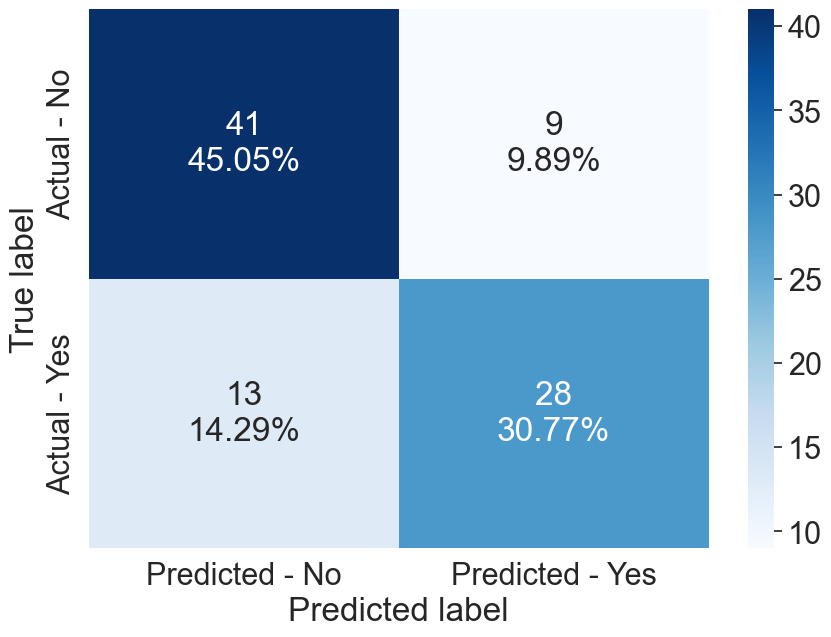

In [1413]:
# Fit the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

# Calculate metrics
get_metrics_score(d_tree)

# Create the confusion matrix
make_confusion_matrix(d_tree,y_test)

#### Feature Importance <a class="anchor" id="dtc_fi"></a>

                 Relative Importance
Chest_Pain                      0.32
Thallium_Test                   0.13
Major_Vessels                   0.13
Cholesterol                     0.10
Gender                          0.07
Max_Heart_Rate                  0.07
Age                             0.06
Resting_BP                      0.05
Exercise_Angina                 0.05
ST_Depression                   0.04
Fasting_Sugar                   0.00
Resting_ECG                     0.00
ST_Slope                        0.00


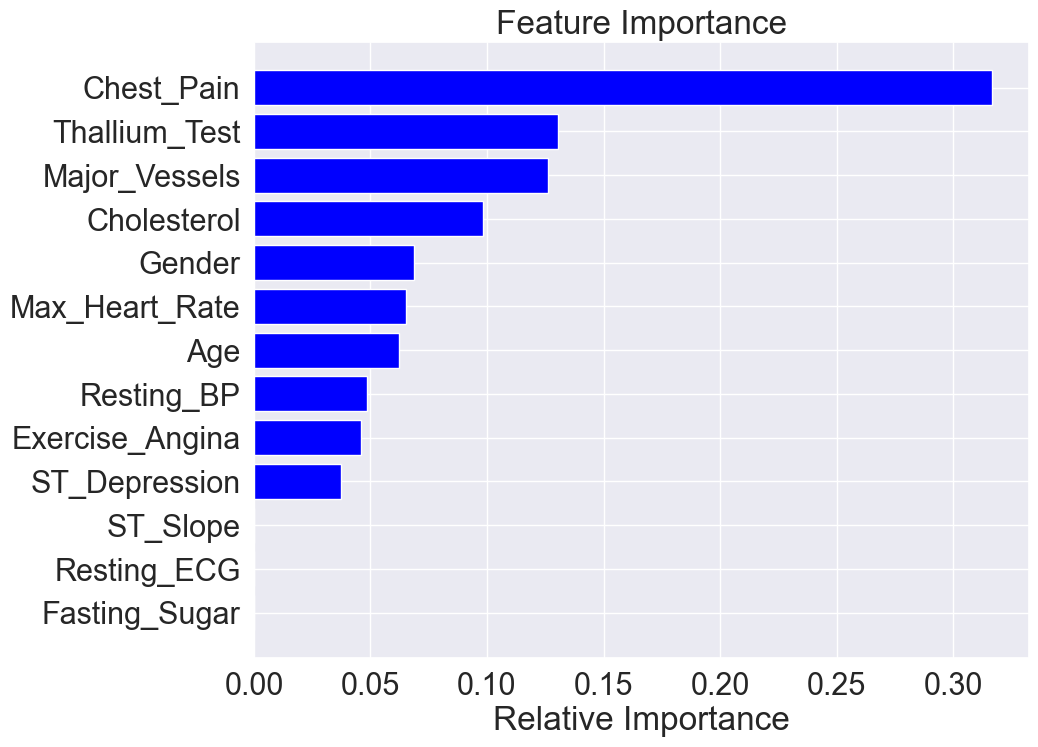

In [1219]:
show_feature_importances(d_tree.feature_importances_, X_train)

#### ROC Curve <a class="anchor" id="dtc_roc"></a>

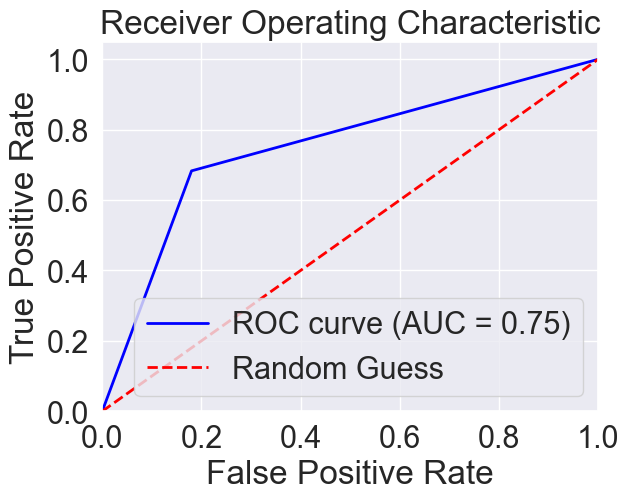

In [1345]:
show_roc_curve(d_tree, X_test, y_test)

### Random Forest Classifier <a class="anchor" id="rfc"></a>

#### Confusion Matrix <a class="anchor" id="rfc_cm"></a>

Accuracy on training set :  1.0
Accuracy on test set :  0.7802197802197802
Recall on training set :  1.0
Recall on test set :  0.7073170731707317
Precision on training set :  1.0
Precision on test set :  0.7837837837837838
F1-Score on training set :  1.0
F1-Score on test set :  0.7435897435897435


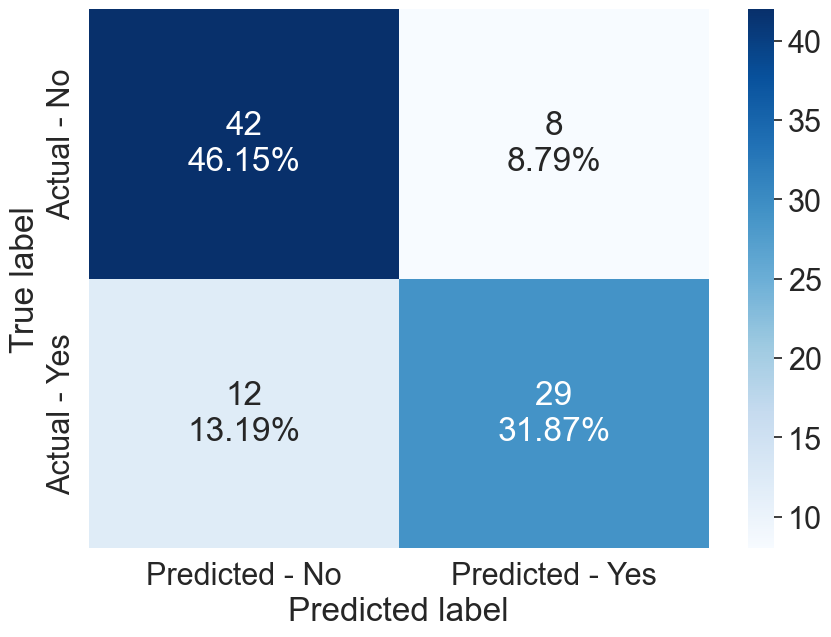

In [1414]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

#### Feature Importance <a class="anchor" id="rfc_fi"></a>

                 Relative Importance
Thallium_Test                   0.15
Chest_Pain                      0.13
Max_Heart_Rate                  0.11
ST_Depression                   0.10
Major_Vessels                   0.09
Age                             0.09
Cholesterol                     0.08
Exercise_Angina                 0.07
Resting_BP                      0.06
Gender                          0.05
ST_Slope                        0.04
Resting_ECG                     0.02
Fasting_Sugar                   0.01


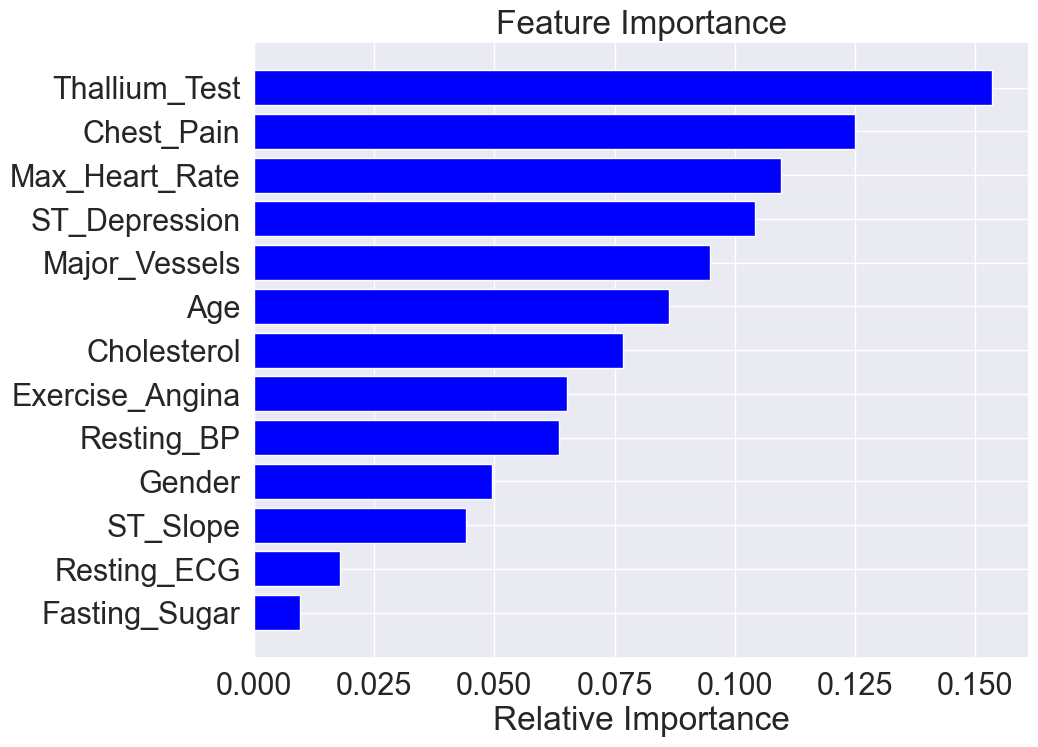

In [1221]:
show_feature_importances(rf_estimator.feature_importances_, X_train)

#### ROC Curve <a class="anchor" id="rfc_roc"></a>

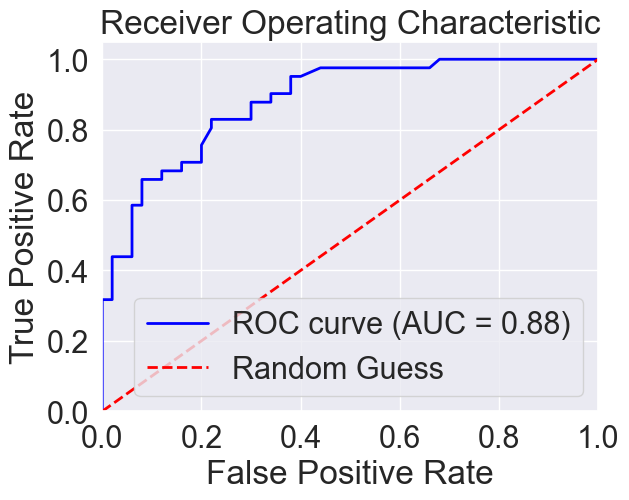

In [1346]:
show_roc_curve(rf_estimator, X_test, y_test)

### Bagging Classifier <a class="anchor" id="bc"></a>

#### Confusion Matrix <a class="anchor" id="bc_cm"></a>

Accuracy on training set :  0.9905660377358491
Accuracy on test set :  0.8021978021978022
Recall on training set :  0.979381443298969
Recall on test set :  0.7560975609756098
Precision on training set :  1.0
Precision on test set :  0.7948717948717948
F1-Score on training set :  0.9895833333333333
F1-Score on test set :  0.7749999999999999


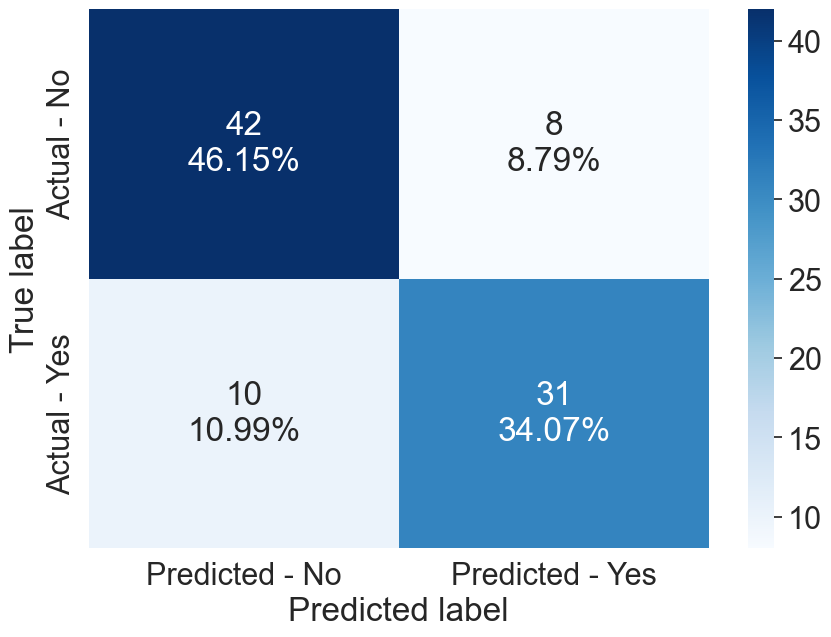

In [1415]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

bc_feature_importances = np.mean([
    tree.feature_importances_ for tree in bagging_classifier.estimators_
], axis=0)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

#### Feature Importance <a class="anchor" id="bc_fi"></a>

                 Relative Importance
Thallium_Test                   0.28
Chest_Pain                      0.14
Max_Heart_Rate                  0.11
Cholesterol                     0.08
ST_Depression                   0.08
Resting_BP                      0.07
Major_Vessels                   0.06
Age                             0.06
Gender                          0.05
ST_Slope                        0.03
Exercise_Angina                 0.02
Resting_ECG                     0.01
Fasting_Sugar                   0.01


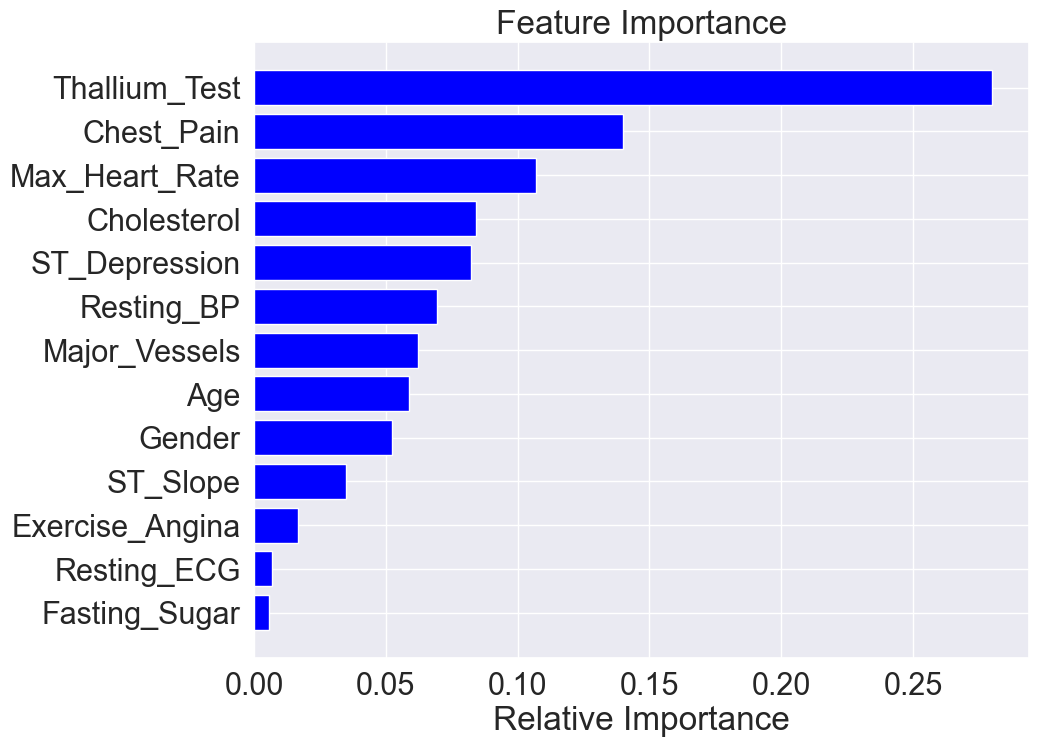

In [1223]:
show_feature_importances(bc_feature_importances, X_train)

#### Roc Curve <a class="anchor" id="bc_roc"></a>

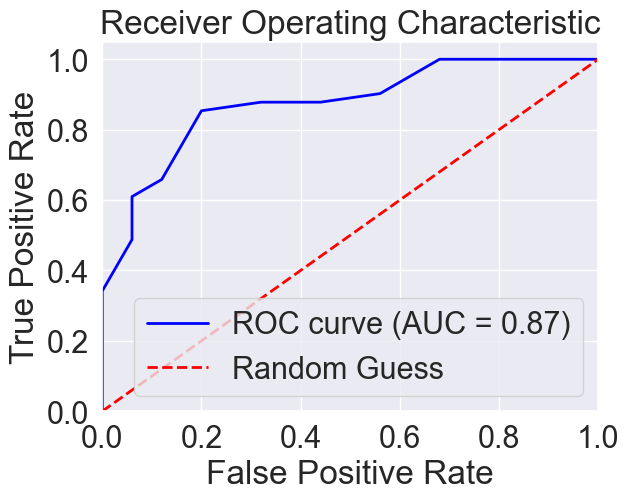

In [1347]:
show_roc_curve(bagging_classifier, X_test, y_test)

### Logistic Regression <a class="anchor" id="lr"></a>

In [1370]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

# Calculate feature importances
lr_importances = abs(lr.coef_[0]) / sum(abs(lr.coef_[0]))

#### Confusion Matrix <a class="anchor" id="lr_cm"></a>

Accuracy on training set :  0.8820754716981132
Accuracy on test set :  0.8241758241758241
Recall on training set :  0.8144329896907216
Recall on test set :  0.7317073170731707
Precision on training set :  0.9186046511627907
Precision on test set :  0.8571428571428571
F1-Score on training set :  0.8633879781420764
F1-Score on test set :  0.7894736842105263


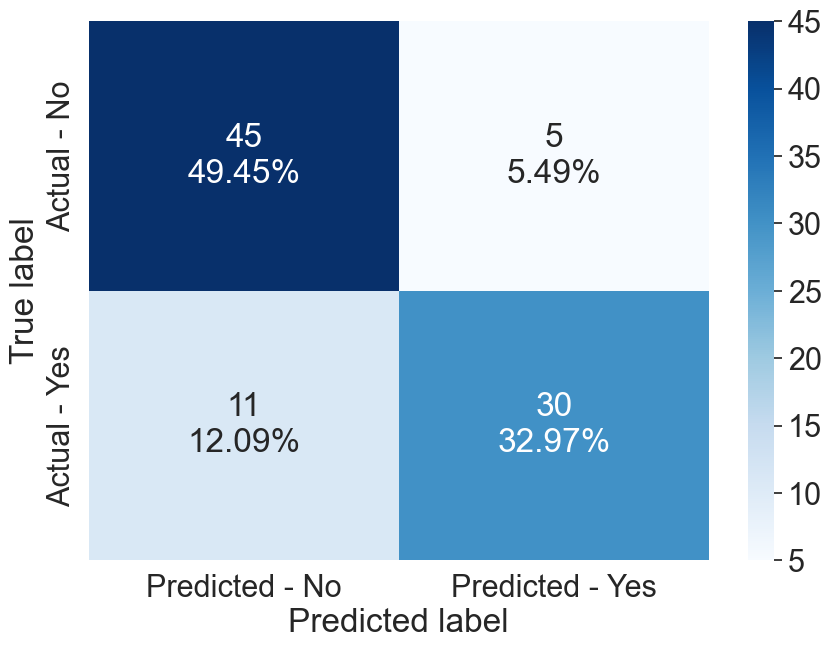

In [1416]:
#Calculating different metrics
get_metrics_score(lr)

#Creating confusion matrix
make_confusion_matrix(lr,y_test)

#### Feature Importance <a class="anchor" id="lr_fi"></a>

                 Relative Importance
Gender                          0.24
Thallium_Test                   0.15
Major_Vessels                   0.14
Chest_Pain                      0.12
Exercise_Angina                 0.12
ST_Slope                        0.10
ST_Depression                   0.08
Resting_ECG                     0.03
Fasting_Sugar                   0.02
Max_Heart_Rate                  0.01
Age                             0.00
Cholesterol                     0.00
Resting_BP                      0.00


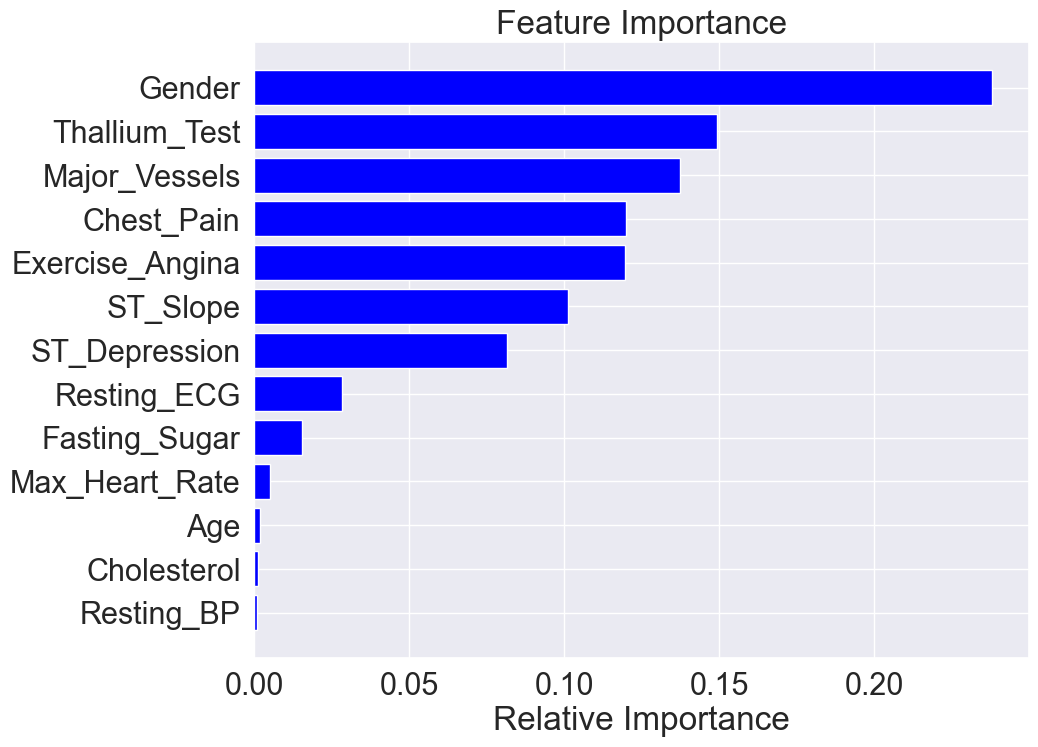

In [1372]:
show_feature_importances(lr_importances, X_train)

#### ROC Curve <a class="anchor" id="lr_roc"></a>

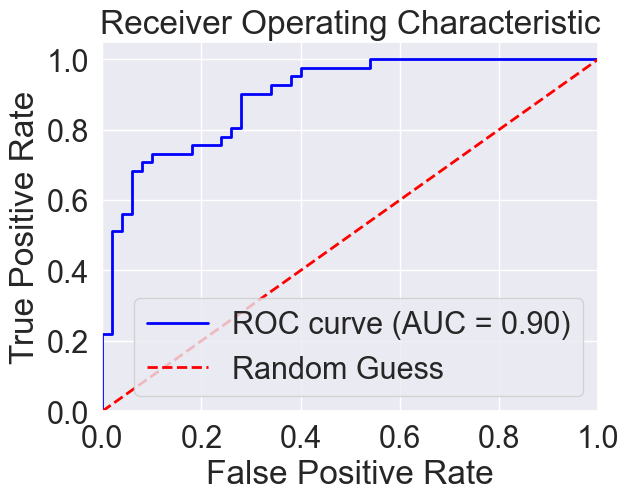

In [1373]:
show_roc_curve(lr, X_test, y_test)

### Tuned Decision Tree Classifier <a class="anchor" id="tuned_dtc"></a>

In [1224]:
#Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=2,
                       max_leaf_nodes=3, min_impurity_decrease=0.0001,
                       min_samples_leaf=7, random_state=1)

#### Confusion Matrix <a class="anchor" id="tuned_dtc_cm"></a>

Accuracy on training set :  0.7688679245283019
Accuracy on test set :  0.7362637362637363
Recall on training set :  0.7731958762886598
Recall on test set :  0.7073170731707317
Precision on training set :  0.7352941176470589
Precision on test set :  0.7073170731707317
F1-Score on training set :  0.7537688442211057
F1-Score on test set :  0.7073170731707317


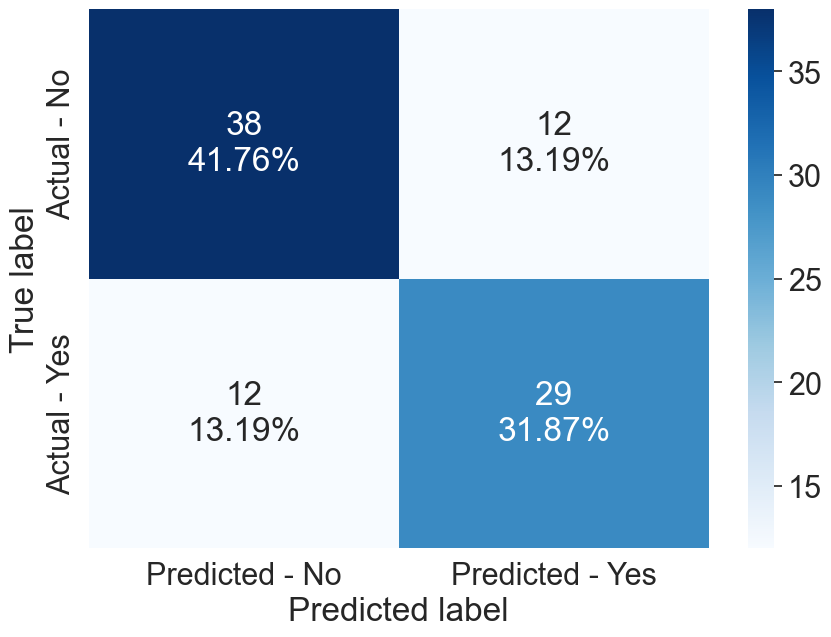

In [1417]:
get_metrics_score(dtree_tuned)

make_confusion_matrix(dtree_tuned,y_test)

#### Feature Importance <a class="anchor" id="tuned_dtc_fi"></a>

                 Relative Importance
Chest_Pain                      0.83
Thallium_Test                   0.17
Age                             0.00
Gender                          0.00
Resting_BP                      0.00
Cholesterol                     0.00
Fasting_Sugar                   0.00
Resting_ECG                     0.00
Max_Heart_Rate                  0.00
Exercise_Angina                 0.00
ST_Depression                   0.00
ST_Slope                        0.00
Major_Vessels                   0.00


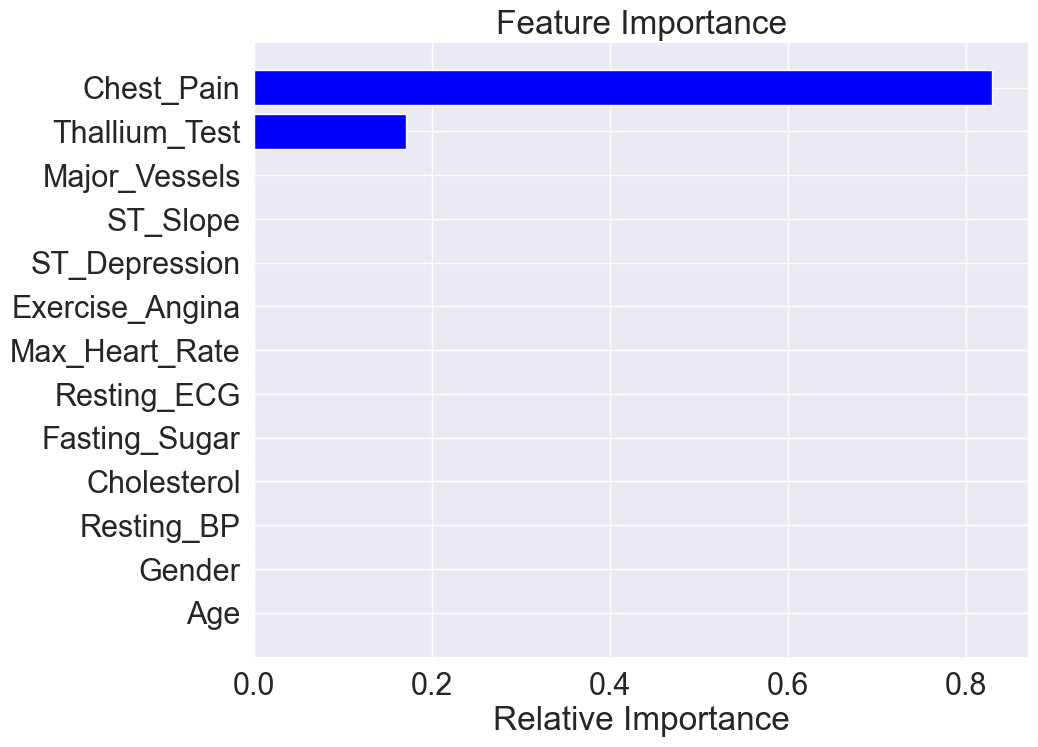

In [1226]:
show_feature_importances(dtree_tuned.feature_importances_, X_train)

#### ROC Curve <a class="anchor" id="tuned_dtc_roc"></a>

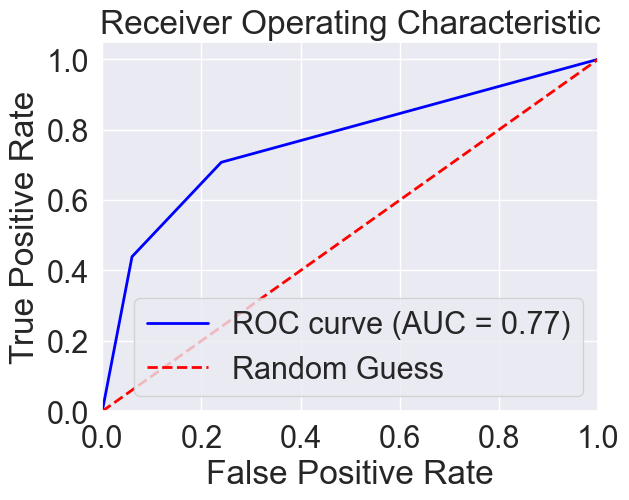

In [1348]:
show_roc_curve(dtree_tuned, X_test, y_test)

### Tuned Random Forest Classifier <a class="anchor" id="tuned_rfc"></a>

Accuracy on training set :  0.7735849056603774
Accuracy on test set :  0.7252747252747253
Recall on training set :  0.9072164948453608
Recall on test set :  0.926829268292683
Precision on training set :  0.6929133858267716
Precision on test set :  0.6333333333333333
F1-Score on training set :  0.7857142857142857
F1-Score on test set :  0.7524752475247526
CPU times: total: 1min 27s
Wall time: 15min 28s


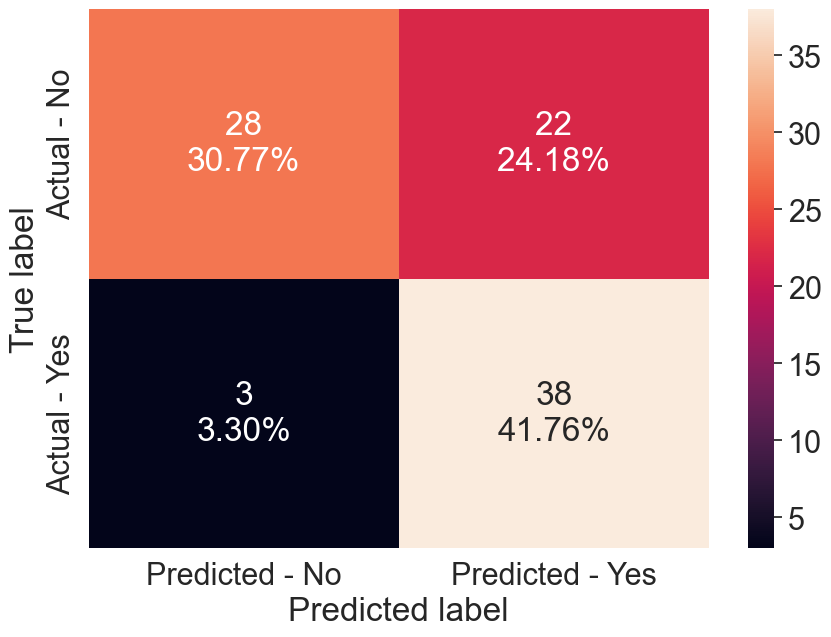

In [1227]:
%%time 
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.35,1:0.65},random_state=1)
parameters = {'max_depth': list(np.arange(3,10,1)), 
              'max_features': np.arange(0.6,1.1,0.1), 
              'max_samples': np.arange(0.7,1.1,0.1), 
              'min_samples_split': np.arange(2, 20, 5), 
              'n_estimators': np.arange(30,160,20), 
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1] 
              } 
# Type of scoring used to compare parameter combinations 
scorer = metrics.make_scorer(metrics.recall_score) 
# Run the grid search 
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1) 
grid_obj = grid_obj.fit(X_train, y_train) 
# Set the clf to the best combination of parameters 
rf_tuned = grid_obj.best_estimator_ 
# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

#### Confusion Matrix <a class="anchor" id="tuned_rfc_cm"></a>

Accuracy on training set :  0.7735849056603774
Accuracy on test set :  0.7252747252747253
Recall on training set :  0.9072164948453608
Recall on test set :  0.926829268292683
Precision on training set :  0.6929133858267716
Precision on test set :  0.6333333333333333
F1-Score on training set :  0.7857142857142857
F1-Score on test set :  0.7524752475247526


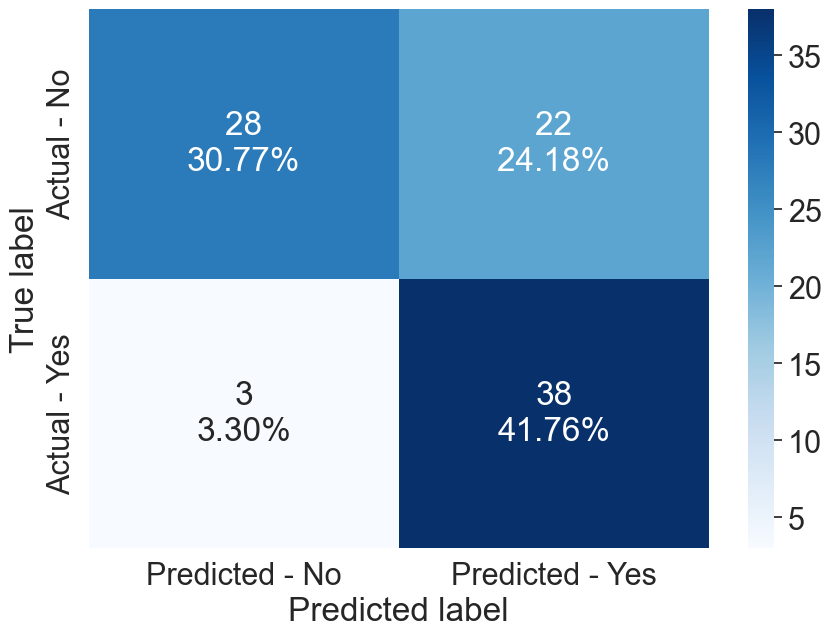

In [1418]:
get_metrics_score(rf_tuned)

make_confusion_matrix(rf_tuned,y_test)

#### Feature Importance <a class="anchor" id="tuned_rfc_fi"></a>

                 Relative Importance
Chest_Pain                      0.30
Thallium_Test                   0.30
Major_Vessels                   0.13
Max_Heart_Rate                  0.07
ST_Slope                        0.07
Exercise_Angina                 0.06
ST_Depression                   0.05
Gender                          0.02
Age                             0.00
Resting_BP                      0.00
Cholesterol                     0.00
Fasting_Sugar                   0.00
Resting_ECG                     0.00


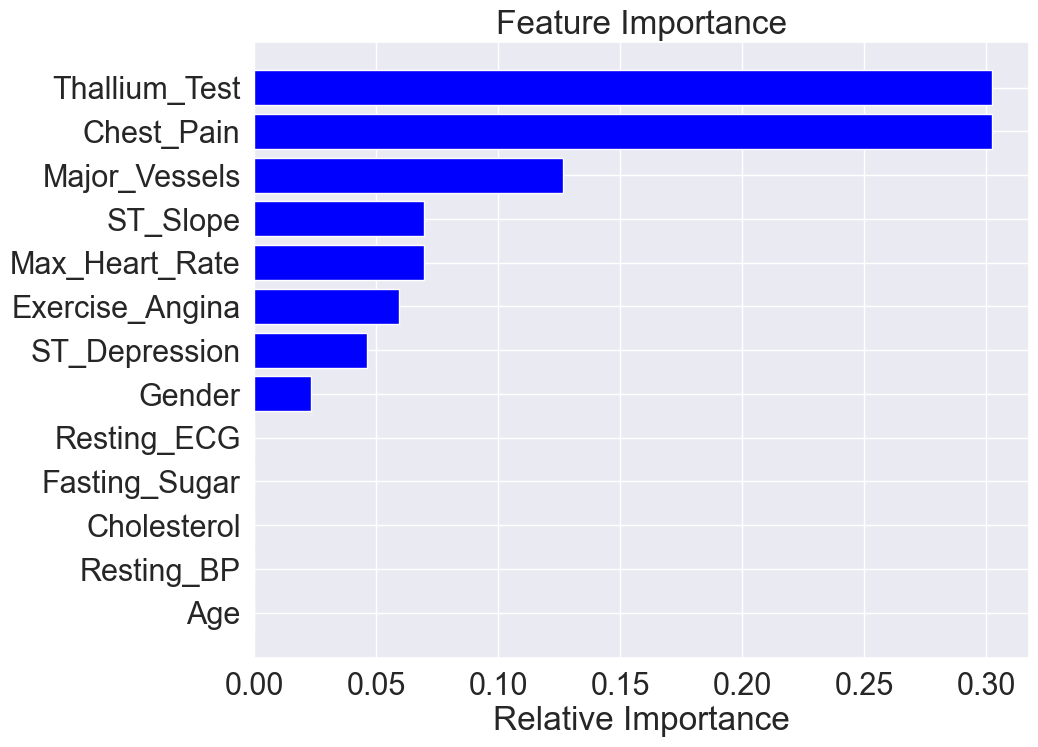

In [1229]:
show_feature_importances(rf_tuned.feature_importances_, X_train)

#### Roc Curve <a class="anchor" id="tuned_rfc_roc"></a>

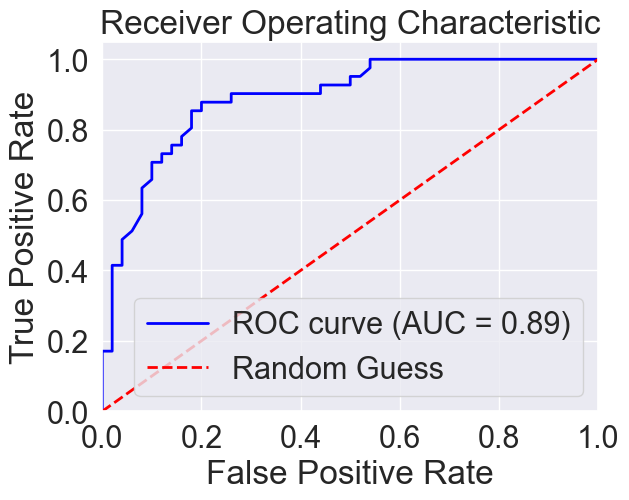

In [1349]:
show_roc_curve(rf_tuned, X_test, y_test)

### Tuned Bagging Classifier <a class="anchor" id="tuned_bc"></a>

In [1230]:
# Choose the type of classifier. 
bagging_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_samples': [0.5, 0.6, 0.7],
    'max_features': [0.5, 0.6, 0.7],
    'n_estimators': [50, 100, 150]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_tuned.fit(X_train, y_train)

tuned_bc_feature_importances = np.mean([
    tree.feature_importances_ for tree in bagging_classifier.estimators_
], axis=0)

#### Confusion Matrix <a class="anchor" id="tuned_bc_cm"></a>

Accuracy on training set :  0.9764150943396226
Accuracy on test set :  0.8131868131868132
Recall on training set :  0.9587628865979382
Recall on test set :  0.8048780487804879
Precision on training set :  0.9893617021276596
Precision on test set :  0.7857142857142857
F1-Score on training set :  0.9738219895287958
F1-Score on test set :  0.7951807228915663


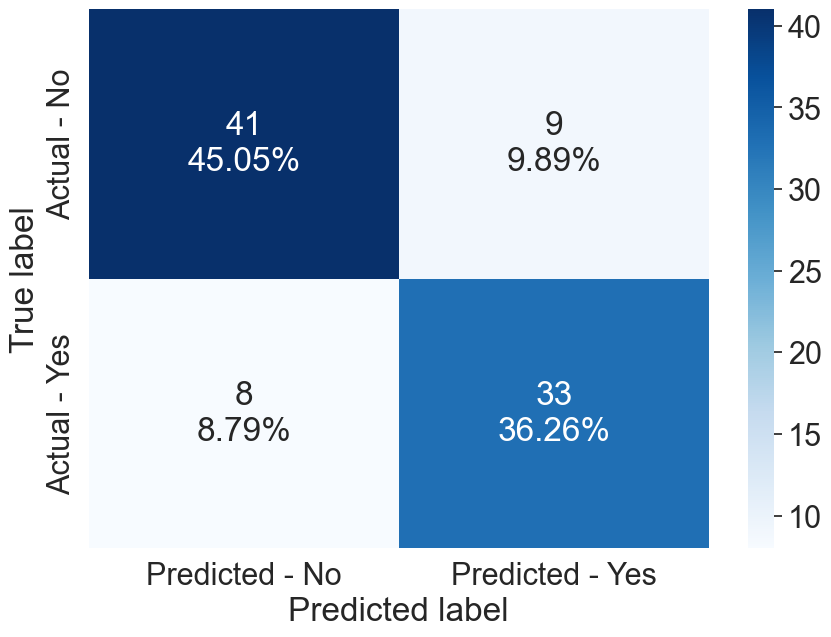

In [1419]:
#Calculating different metrics
get_metrics_score(bagging_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_tuned,y_test)

#### Feature Importance <a class="anchor" id="tuned_bc_fi"></a>

                 Relative Importance
Thallium_Test                   0.28
Chest_Pain                      0.14
Max_Heart_Rate                  0.11
Cholesterol                     0.08
ST_Depression                   0.08
Resting_BP                      0.07
Major_Vessels                   0.06
Age                             0.06
Gender                          0.05
ST_Slope                        0.03
Exercise_Angina                 0.02
Resting_ECG                     0.01
Fasting_Sugar                   0.01


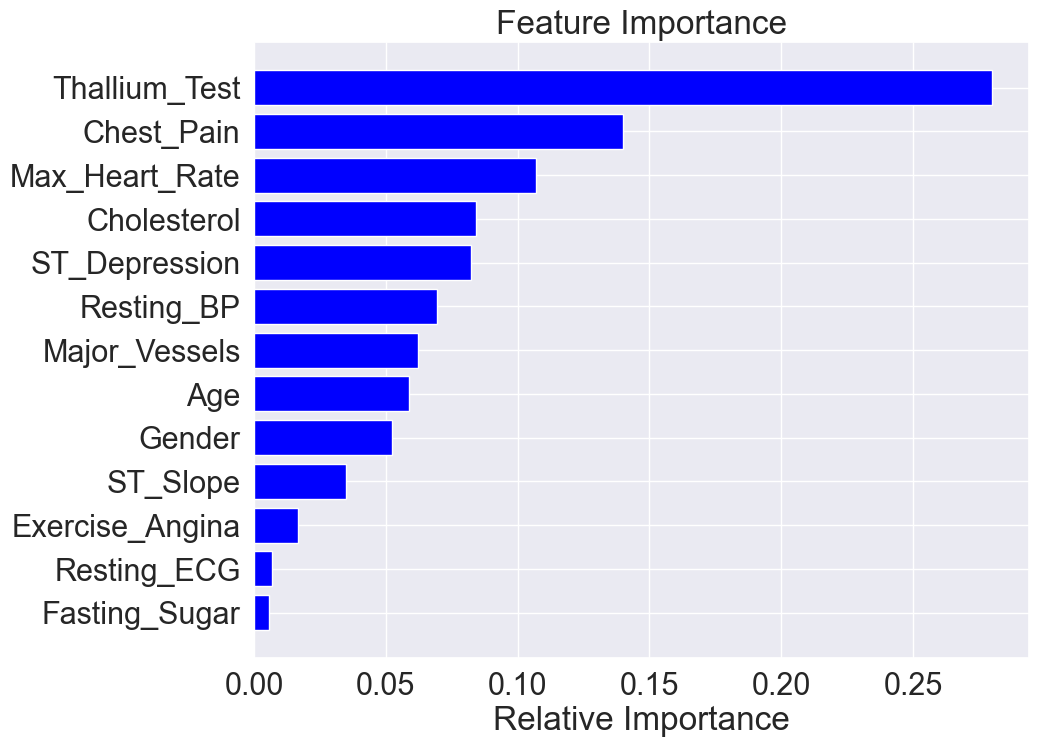

In [1232]:
show_feature_importances(tuned_bc_feature_importances, X_train)

#### Roc Curve <a class="anchor" id="tuned_bc_roc"></a>

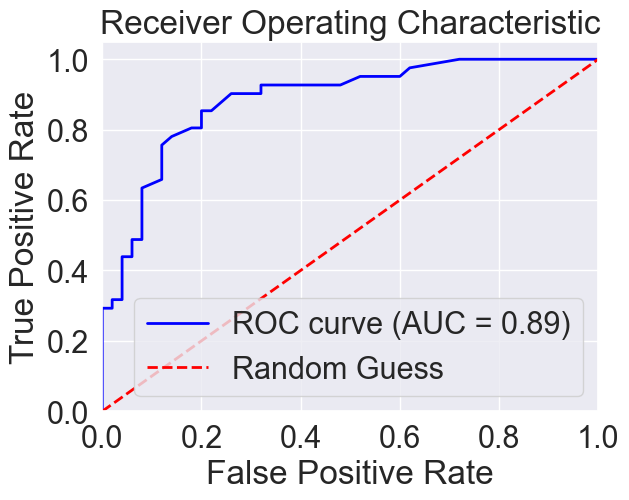

In [1350]:
show_roc_curve(bagging_tuned, X_test, y_test)

### Tuned Logistic Regression <a class="anchor" id="tuned_lr"></a>

In [1400]:
logistic_regression = LogisticRegression(random_state=1)

# Grid of parameters to choose from
parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced', {0: 0.7, 1: 0.3}, {0: 0.8, 1: 0.2}]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(logistic_regression, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
lr_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
lr_tuned.fit(X_train, y_train)

# Calculate feature importances
lr_tuned_importances = abs(lr_tuned.coef_[0]) / sum(abs(lr_tuned.coef_[0]))

#### Confusion Matrix <a class="anchor" id="tuned_lr_cm"></a>

Accuracy on training set :  0.9009433962264151
Accuracy on test set :  0.8021978021978022
Recall on training set :  0.8556701030927835
Recall on test set :  0.7317073170731707
Precision on training set :  0.9222222222222223
Precision on test set :  0.8108108108108109
F1-Score on training set :  0.8877005347593583
F1-Score on test set :  0.7692307692307694


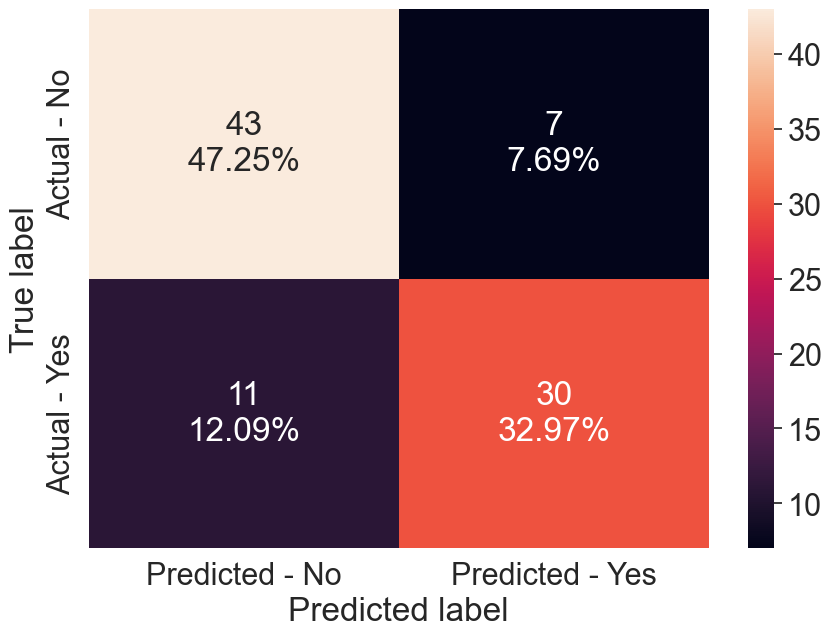

In [1401]:
#Calculating different metrics
get_metrics_score(lr_tuned)

#Creating confusion matrix
make_confusion_matrix(lr_tuned,y_test)

#### Feature Importance <a class="anchor" id="tuned_lr_fi"></a>

                 Relative Importance
Gender                          0.24
Thallium_Test                   0.15
Major_Vessels                   0.14
Chest_Pain                      0.12
Exercise_Angina                 0.12
ST_Slope                        0.10
ST_Depression                   0.08
Resting_ECG                     0.03
Fasting_Sugar                   0.02
Max_Heart_Rate                  0.01
Age                             0.00
Cholesterol                     0.00
Resting_BP                      0.00


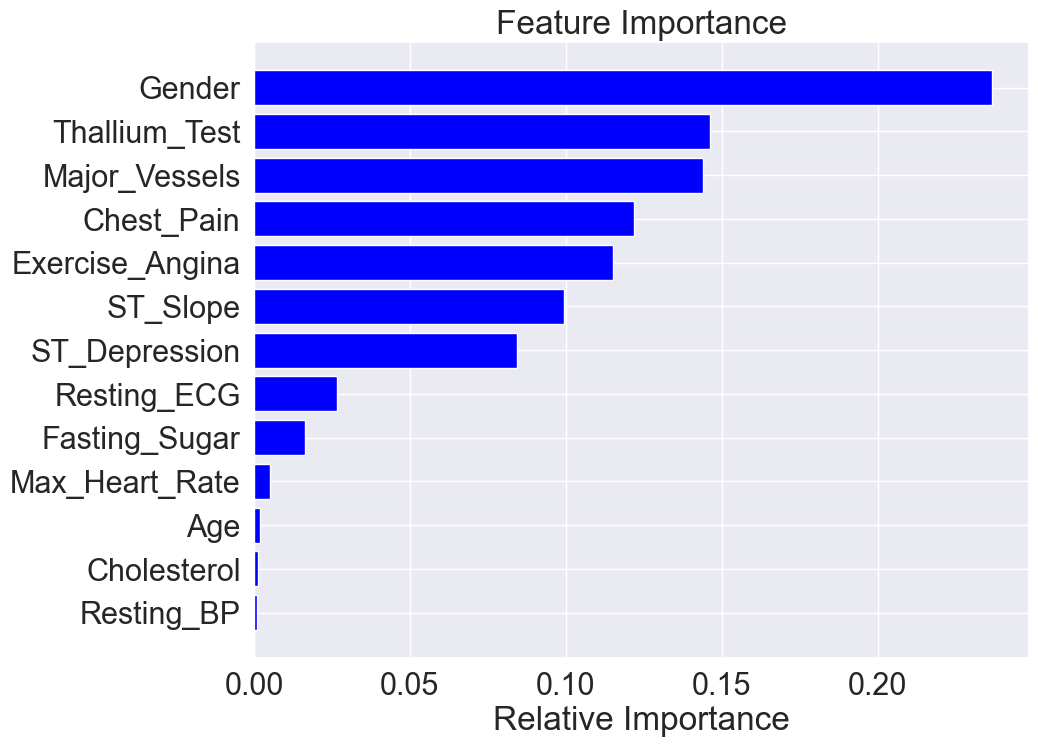

In [1402]:
show_feature_importances(lr_tuned_importances, X_train)

#### ROC Curve <a class="anchor" id="tuned_lr_roc"></a>

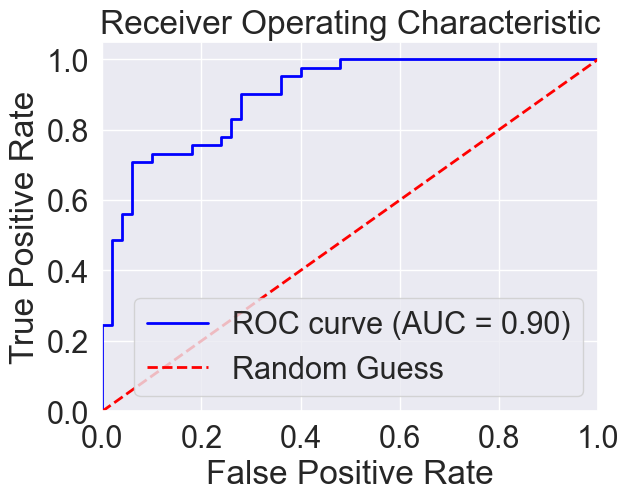

In [1403]:
show_roc_curve(lr_tuned, X_test, y_test)

### Supervised ML Classification Model Comparisons <a class="anchor" id="compare"></a>

In [1404]:
# Identify the models to compare
models = [d_tree, dtree_tuned, rf_estimator, rf_tuned, bagging_classifier, bagging_tuned, lr, lr_tuned]
model_names = ['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest','Bagging Classifier','Tuned Bagging Classifier','Logistic Regression','Tuned Logistic Regression']

# Define empty lists to add results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# Loop through all identified models to get the metrics score (i.e., Accuracy, Recall, Precision, and F1)
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [1405]:
comparison_frame = pd.DataFrame({'Model':model_names, 'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test, 'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'F1_Train':f1_train, 'F1_Test':f1_test})

#Sort models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
3        Tuned Random Forest            0.77           0.73          0.91   
5   Tuned Bagging Classifier            0.98           0.81          0.96   
4         Bagging Classifier            0.99           0.80          0.98   
6        Logistic Regression            0.88           0.82          0.81   
7  Tuned Logistic Regression            0.90           0.80          0.86   
1        Tuned Decision Tree            0.77           0.74          0.77   
2              Random Forest            1.00           0.78          1.00   
0              Decision Tree            1.00           0.76          1.00   

   Test_Recall  Train_Precision  Test_Precision  F1_Train  F1_Test  
3         0.93             0.69            0.63      0.79     0.75  
5         0.80             0.99            0.79      0.97     0.80  
4         0.76             1.00            0.79      0.99     0.77  
6         0.73             0.92            0.86      0.86     0.79  
7         0.73             0.92            0.81      0.89     0.77  
1         0.71             0.74            0.71      0.75     0.71  
2         0.71             1.00            0.78      1.00     0.74  
0         0.68             1.00            0.76      1.00     0.72

<AxesSubplot: >

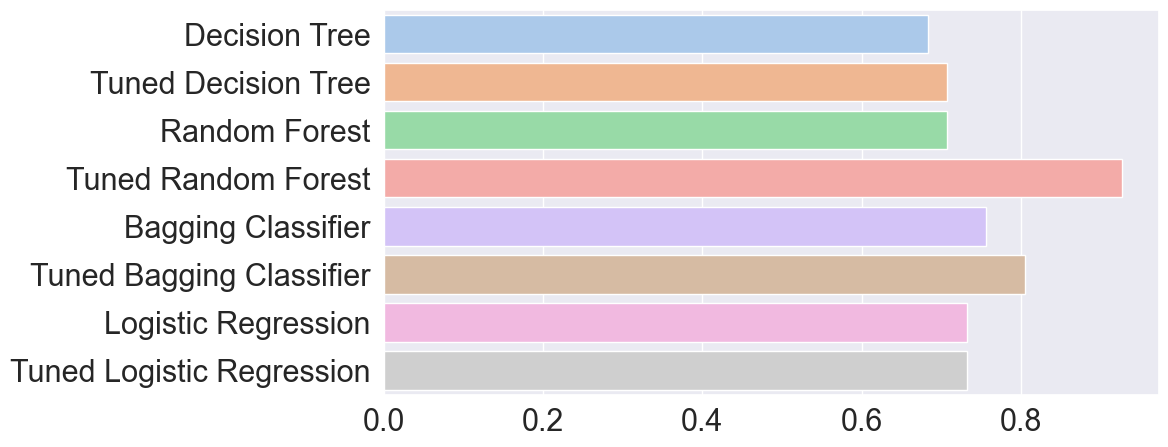

In [1406]:
plt.figure(figsize = (10,5))
sns.barplot(x = recall_test, y = model_names, palette='pastel')

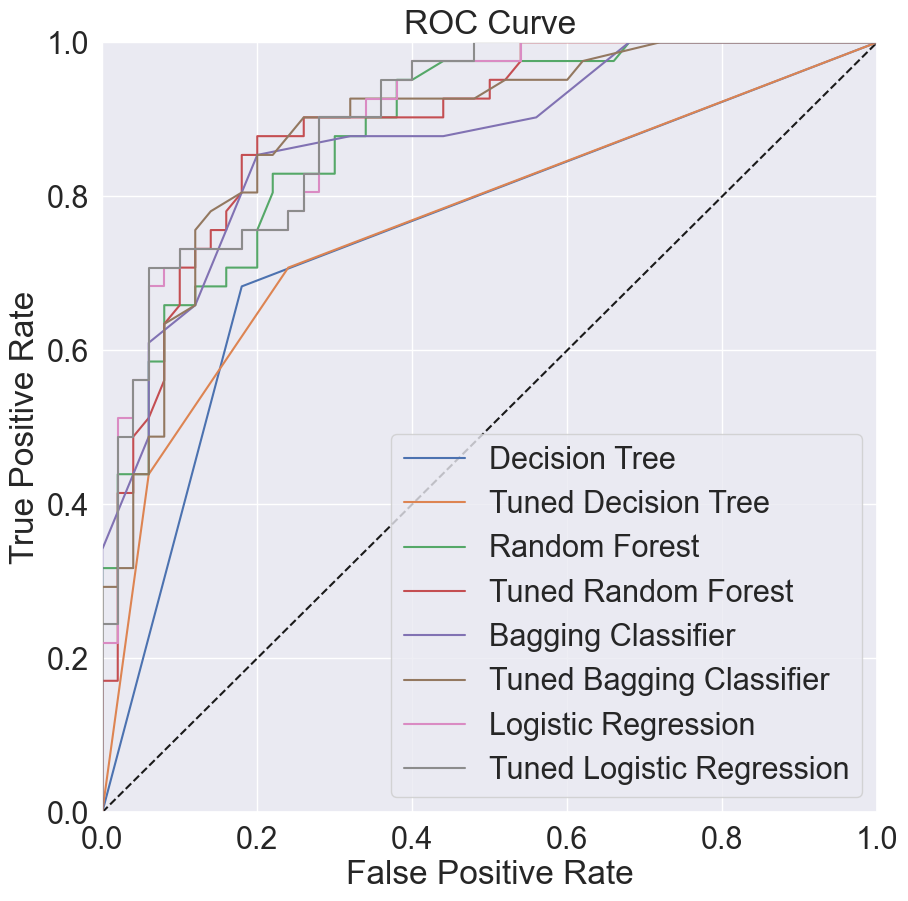

In [1407]:
def plot_roc_curve(model, X_test, y_test, i):
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=model_names[i])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')

# plot with all ROC curves
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
for model in models:
    plot_roc_curve(model, X_test, y_test, models.index(model))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    
plt.show()

### Boosting Models <a class="anchor" id="boosting"></a>

### AdaBoost Classifier <a class="anchor" id="adc"></a>

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier

In [1235]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [1236]:
adaboost=AdaBoostClassifier(random_state=1)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

#### Confusion Matrix <a class="anchor" id="adc_cm"></a>

Accuracy on training set :  0.9764150943396226
Accuracy on test set :  0.7912087912087912
Recall on training set :  0.979381443298969
Recall on test set :  0.7317073170731707
Precision on training set :  0.9693877551020408
Precision on test set :  0.7894736842105263
F1-Score on training set :  0.9743589743589743
F1-Score on test set :  0.7594936708860759


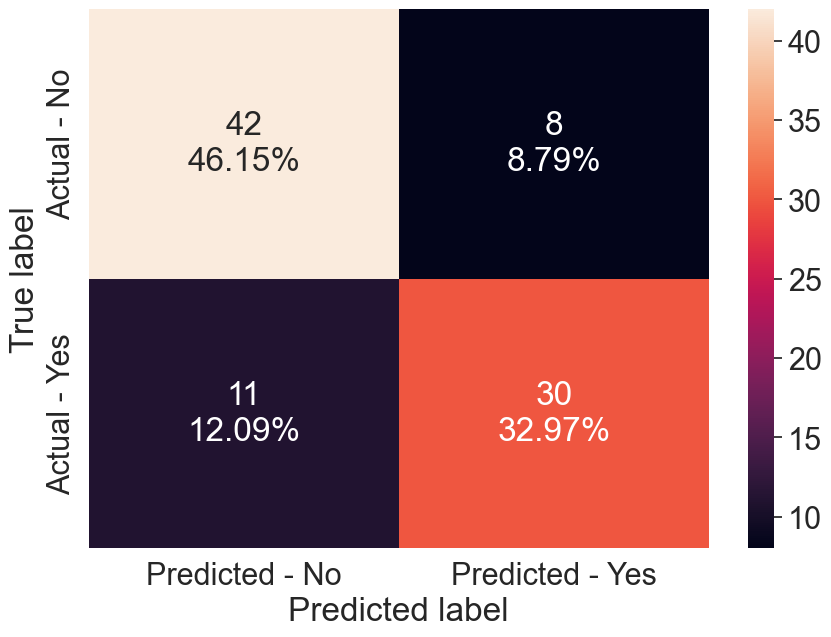

In [1237]:
get_metrics_score(adaboost)

make_confusion_matrix(adaboost,y_test)

#### Feature Importance <a class="anchor" id="adc_fi"></a>

                 Relative Importance
Cholesterol                     0.20
Age                             0.18
Max_Heart_Rate                  0.18
ST_Depression                   0.12
Resting_BP                      0.08
Gender                          0.06
Chest_Pain                      0.04
Exercise_Angina                 0.04
Major_Vessels                   0.04
Fasting_Sugar                   0.02
ST_Slope                        0.02
Thallium_Test                   0.02
Resting_ECG                     0.00


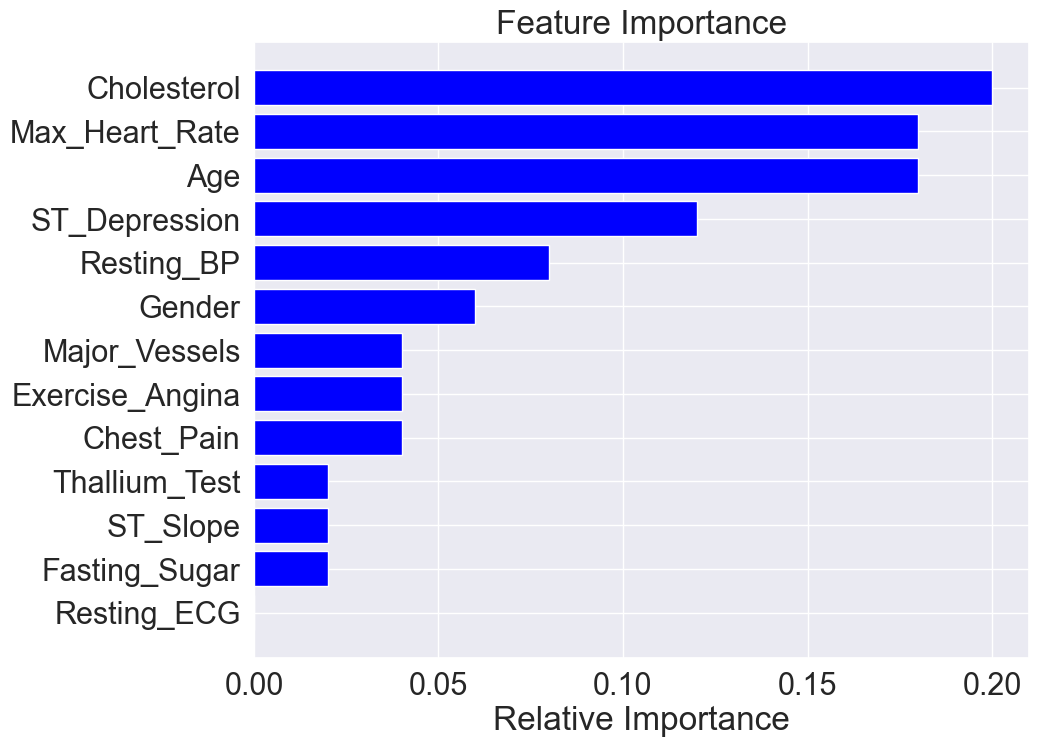

In [1238]:
show_feature_importances(adaboost.feature_importances_, X_train)

#### ROC Curve <a class="anchor" id="adc_roc"></a>

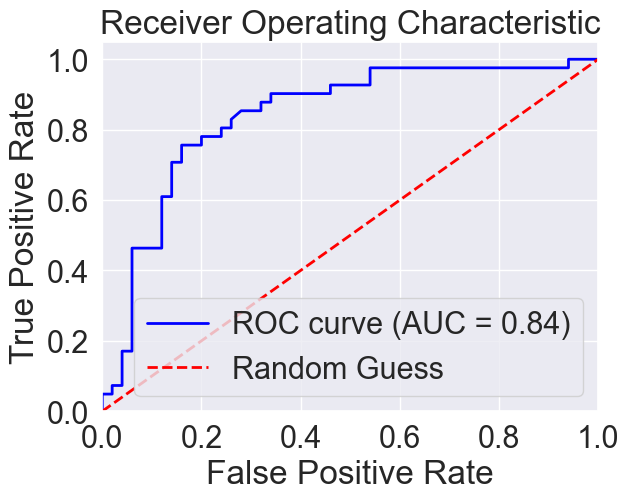

In [1357]:
show_roc_curve(adaboost, X_test, y_test)

### Tuned Adaboost Classifier <a class="anchor" id="tuned_adc"></a>

In [1275]:
%%time
adaboost_tuned = AdaBoostClassifier(random_state=1)

parameters = {'n_estimators': np.arange(10,100,10),                
              'learning_rate': [1, 0.1, 0.5, 0.01],                
              }

scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(adaboost_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

adaboost_tuned = grid_obj.best_estimator_
 
adaboost_tuned.fit(X_train, y_train)

CPU times: total: 9.67 s
Wall time: 9.67 s


AdaBoostClassifier(learning_rate=1, n_estimators=70, random_state=1)

#### Confusion Matrix <a class="anchor" id="tuned_adc_cm"></a>

Accuracy on training set :  0.9858490566037735
Accuracy on test set :  0.7582417582417582
Recall on training set :  0.9896907216494846
Recall on test set :  0.7560975609756098
Precision on training set :  0.9795918367346939
Precision on test set :  0.7209302325581395
F1-Score on training set :  0.9846153846153847
F1-Score on test set :  0.7380952380952381


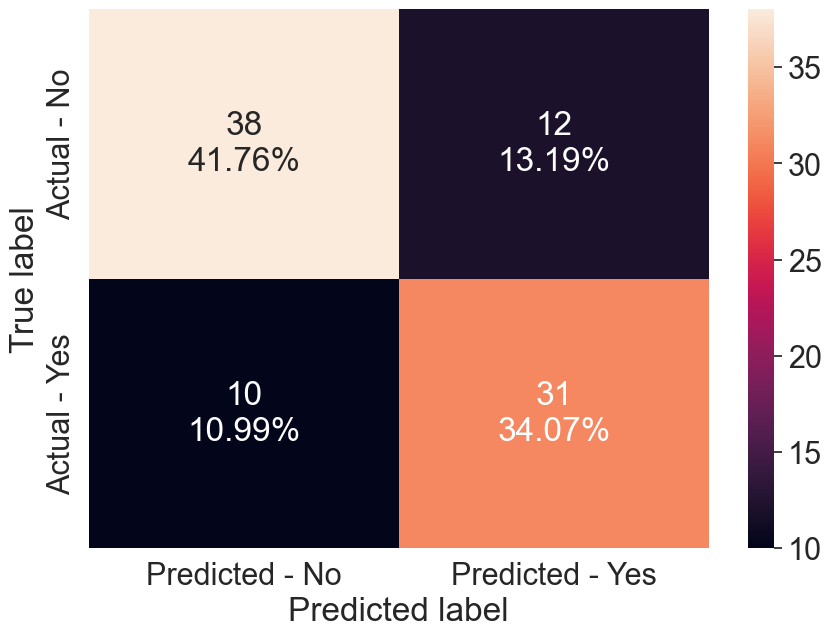

In [1276]:
get_metrics_score(adaboost_tuned)

make_confusion_matrix(adaboost_tuned,y_test)

#### Feature Importance <a class="anchor" id="tuned_adc_fi"></a>

                 Relative Importance
Age                             0.19
Cholesterol                     0.19
Max_Heart_Rate                  0.19
Resting_BP                      0.10
ST_Depression                   0.09
Major_Vessels                   0.06
Thallium_Test                   0.06
Gender                          0.04
Chest_Pain                      0.03
Fasting_Sugar                   0.03
Exercise_Angina                 0.03
ST_Slope                        0.01
Resting_ECG                     0.00


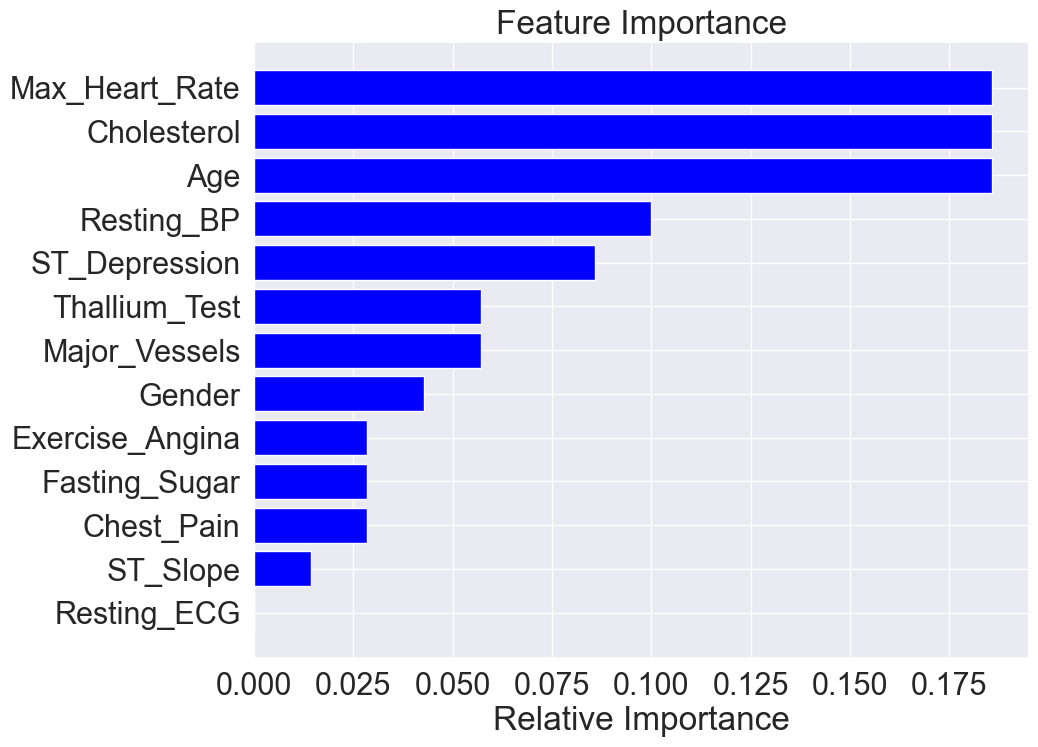

In [1277]:
show_feature_importances(adaboost_tuned.feature_importances_, X_train)

#### ROC Curve <a class="anchor" id="tuned_adc_roc"></a>

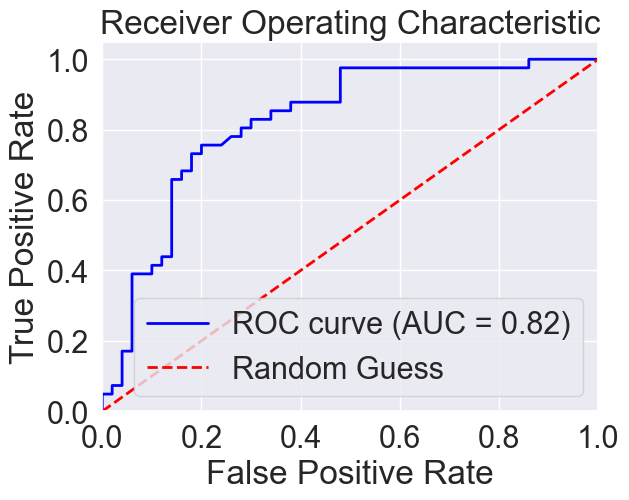

In [1358]:
show_roc_curve(adaboost_tuned, X_test, y_test)

### Gradient Boosting Classifier <a class="anchor" id="gbc"></a>

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier

In [1242]:
gradient_boost=GradientBoostingClassifier(random_state=1)
gradient_boost.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

#### Confusion Matrix <a class="anchor" id="gbc_cm"></a>

Accuracy on training set :  1.0
Accuracy on test set :  0.7802197802197802
Recall on training set :  1.0
Recall on test set :  0.7804878048780488
Precision on training set :  1.0
Precision on test set :  0.7441860465116279
F1-Score on training set :  1.0
F1-Score on test set :  0.761904761904762


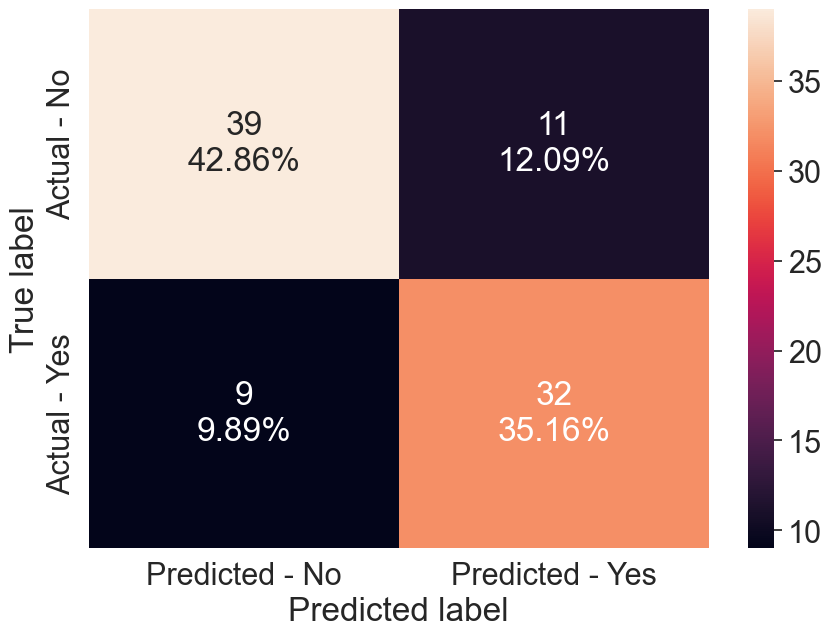

In [1243]:
get_metrics_score(gradient_boost)

make_confusion_matrix(gradient_boost,y_test)

#### Feature Importance <a class="anchor" id="gbc_fi"></a>

                 Relative Importance
Chest_Pain                      0.24
Thallium_Test                   0.19
Major_Vessels                   0.11
Cholesterol                     0.09
ST_Depression                   0.09
Max_Heart_Rate                  0.08
Age                             0.07
Gender                          0.06
ST_Slope                        0.03
Resting_BP                      0.02
Exercise_Angina                 0.02
Fasting_Sugar                   0.01
Resting_ECG                     0.00


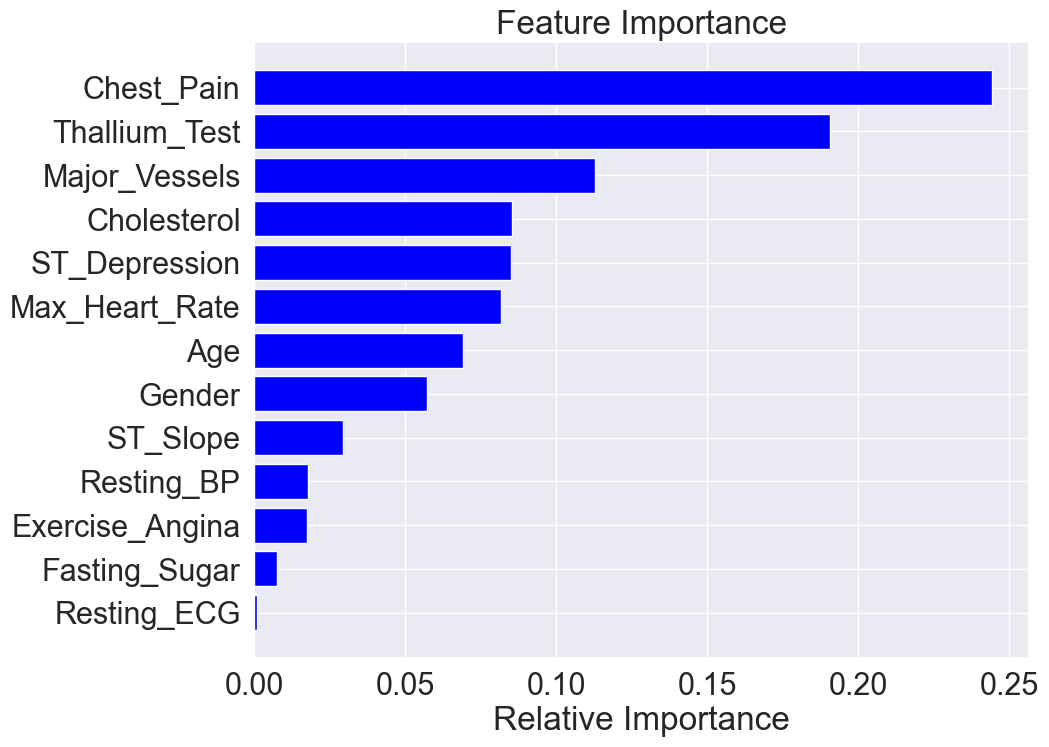

In [1244]:
show_feature_importances(gradient_boost.feature_importances_, X_train)

#### ROC Curve <a class="anchor" id="gbc_roc"></a>

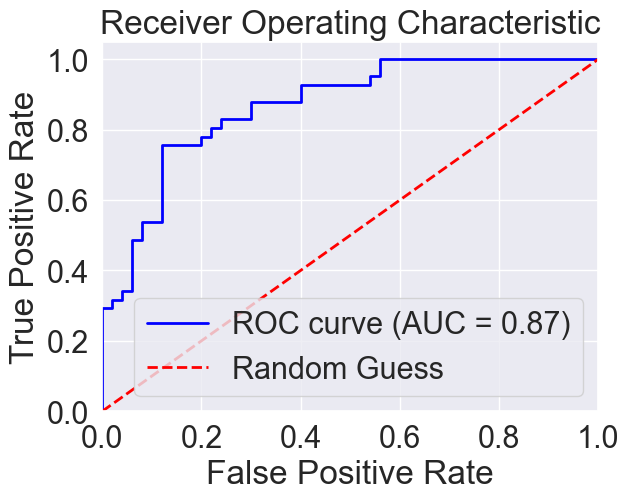

In [1359]:
show_roc_curve(gradient_boost, X_test, y_test)

### Tuned Gradient Boosting Classifier <a class="anchor" id="tuned_gbc"></a>

In [1245]:
%%time

# Create the initial model
base_estimator = DecisionTreeClassifier(max_depth=1)

gb_tuned = GradientBoostingClassifier(init=base_estimator,random_state=1)

parameters = {
    "n_estimators": [20,50,100,150],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(gb_tuned, parameters, scoring=acc_scorer,cv=5)

grid_obj = grid_obj.fit(X_train, y_train)

gb_tuned = grid_obj.best_estimator_

gb_tuned.fit(X_train, y_train)

CPU times: total: 12 s
Wall time: 12 s


GradientBoostingClassifier(init=DecisionTreeClassifier(max_depth=1),
                           max_features=0.7, n_estimators=50, random_state=1,
                           subsample=0.9)

#### Confusion Matrix <a class="anchor" id="tuned_gbc_cm"></a>

Accuracy on training set :  0.9905660377358491
Accuracy on test set :  0.8131868131868132
Recall on training set :  0.979381443298969
Recall on test set :  0.8048780487804879
Precision on training set :  1.0
Precision on test set :  0.7857142857142857
F1-Score on training set :  0.9895833333333333
F1-Score on test set :  0.7951807228915663


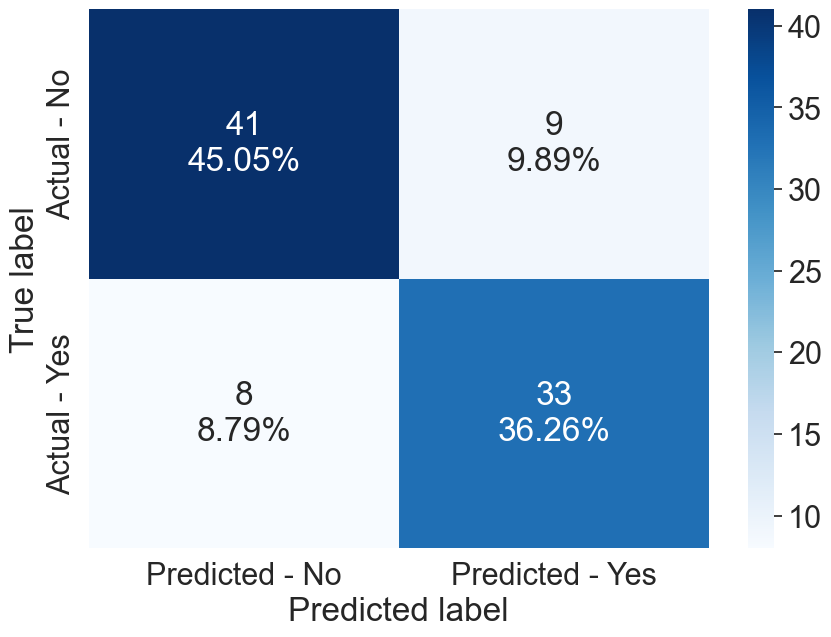

In [1420]:
get_metrics_score(gb_tuned)

make_confusion_matrix(gb_tuned,y_test)

#### Feature Importance <a class="anchor" id="tuned_gbc_fi"></a>

                 Relative Importance
Thallium_Test                   0.17
Major_Vessels                   0.15
Max_Heart_Rate                  0.12
Cholesterol                     0.12
ST_Depression                   0.12
Age                             0.08
Gender                          0.08
Chest_Pain                      0.06
Resting_BP                      0.05
ST_Slope                        0.04
Exercise_Angina                 0.01
Resting_ECG                     0.01
Fasting_Sugar                   0.00


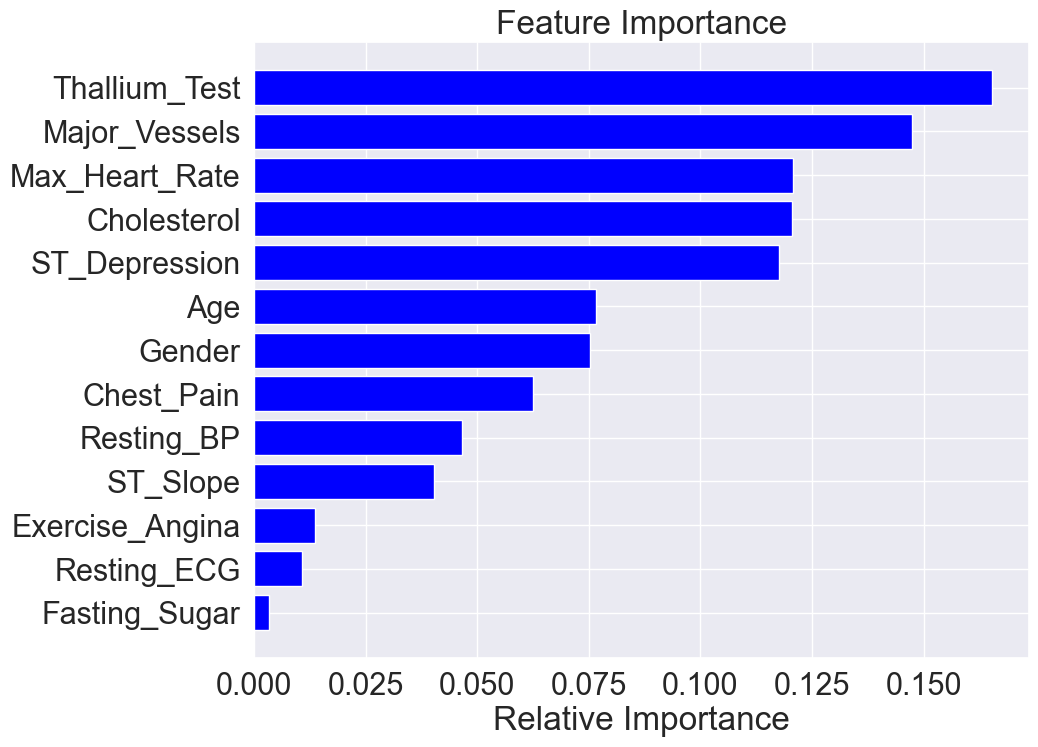

In [1247]:
show_feature_importances(gb_tuned.feature_importances_, X_train)

#### ROC Curve <a class="anchor" id="tuned_gbc_roc"></a>

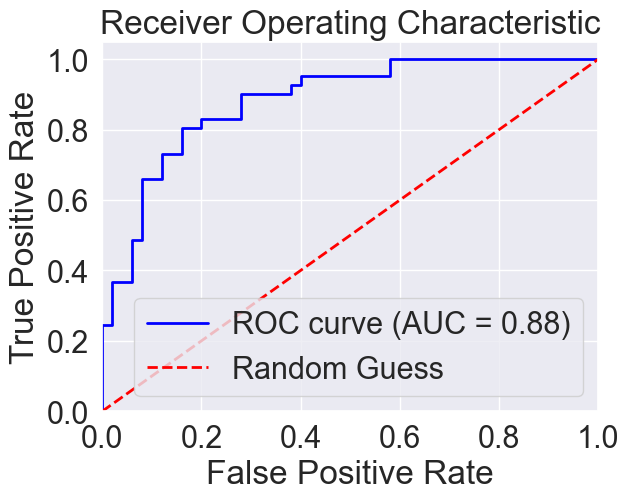

In [1360]:
show_roc_curve(gb_tuned, X_test, y_test)

### XGBoost Classifier <a class="anchor" id="xgbc"></a>

In [1248]:
!pip install xgboost
from xgboost import XGBClassifier

Defaulting to user installation because normal site-packages is not writeable


In [1249]:
xgb = XGBClassifier(random_state=1, eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

#### Confusion Matrix <a class="anchor" id="xgbc_cm"></a>

Accuracy on training set :  1.0
Accuracy on test set :  0.8021978021978022
Recall on training set :  1.0
Recall on test set :  0.7804878048780488
Precision on training set :  1.0
Precision on test set :  0.7804878048780488
F1-Score on training set :  1.0
F1-Score on test set :  0.7804878048780488


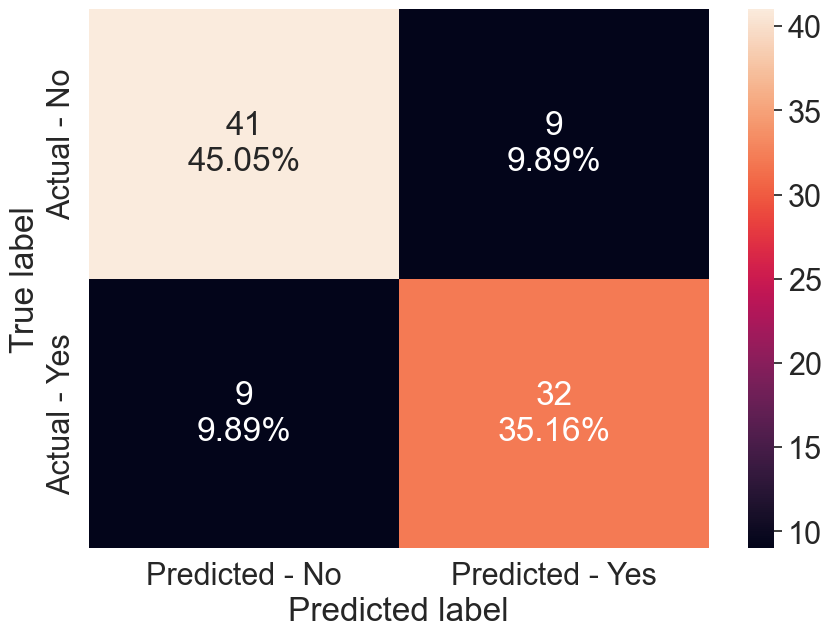

In [1250]:
#Calculating different metrics
get_metrics_score(xgb)

#Creating confusion matrix
make_confusion_matrix(xgb,y_test)

#### Feature Importance <a class="anchor" id="xgbc_fi"></a>

                 Relative Importance
Thallium_Test                   0.22
Chest_Pain                      0.21
Exercise_Angina                 0.12
Major_Vessels                   0.12
ST_Slope                        0.05
ST_Depression                   0.05
Gender                          0.05
Cholesterol                     0.04
Max_Heart_Rate                  0.04
Resting_BP                      0.03
Age                             0.03
Fasting_Sugar                   0.02
Resting_ECG                     0.02


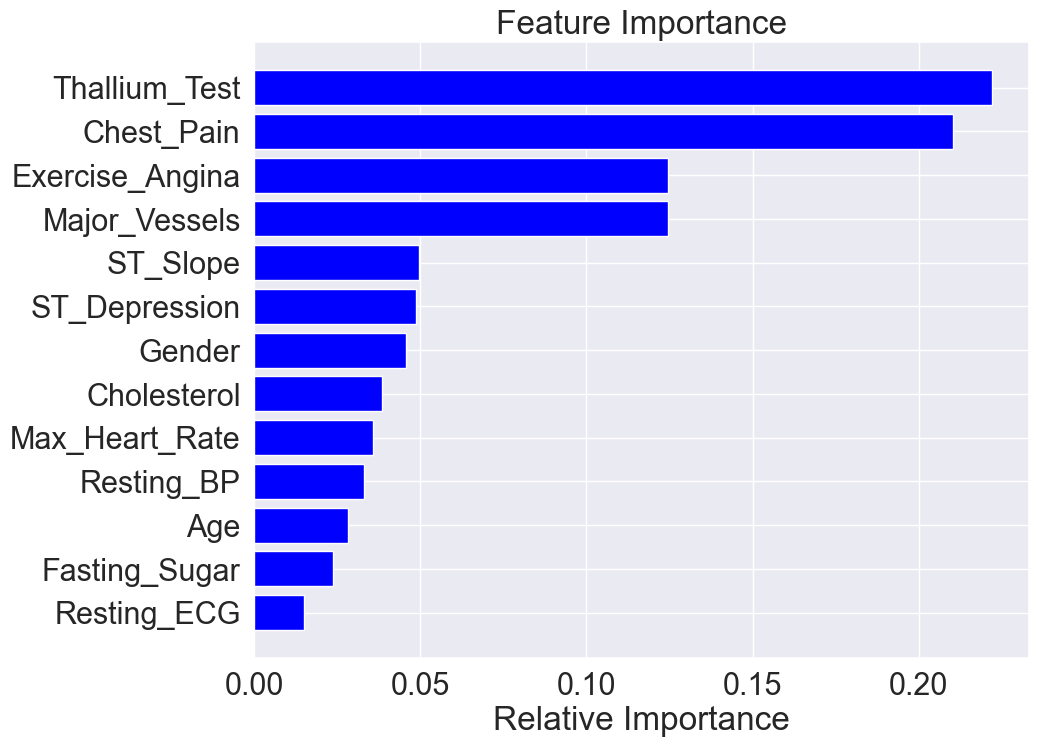

In [1251]:
show_feature_importances(xgb.feature_importances_, X_train)

#### ROC Curve <a class="anchor" id="xgbc_roc"></a>

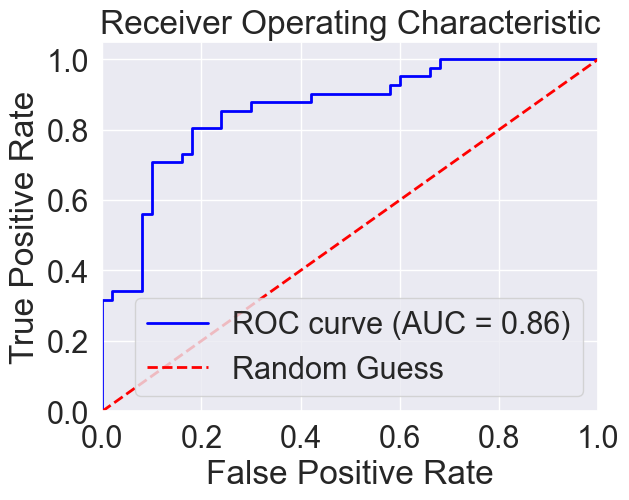

In [1361]:
show_roc_curve(xgb, X_test, y_test)

### Tuned XGBoost Classifier <a class="anchor" id="tuned_xgbc"></a>

In [1270]:
%%time
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

parameters = {
    "n_estimators": [100, 200, 300],
    "scale_pos_weight": [1, 2, 3],
    "subsample": [0.8, 0.9, 1.0],
    "learning_rate": [0.01, 0.05, 0.1],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "colsample_bylevel": [0.6, 0.8, 1.0],
    "reg_alpha": [0, 0.1, 0.5],
    "reg_lambda": [0, 0.1, 0.5],
    "max_depth": [3, 4, 5],
    "min_child_weight": [1, 5, 10]
}

scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

xgb_tuned = grid_obj.best_estimator_

xgb_tuned.fit(X_train, y_train)

CPU times: total: 2d 10h 36min 26s
Wall time: 3h 47min 41s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=10, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

**Node:** The model with the initial parameters took ~1 minute to run, and got a recall score of 0.85. With changes, it got to 0.975, but it took ~4 hours to run and it has a low precision score.

#### Confusion Matrix <a class="anchor" id="tuned_xgbc_cm"></a>

Accuracy on training set :  0.7735849056603774
Accuracy on test set :  0.7582417582417582
Recall on training set :  0.9587628865979382
Recall on test set :  0.975609756097561
Precision on training set :  0.6788321167883211
Precision on test set :  0.6557377049180327
F1-Score on training set :  0.7948717948717948
F1-Score on test set :  0.7843137254901961


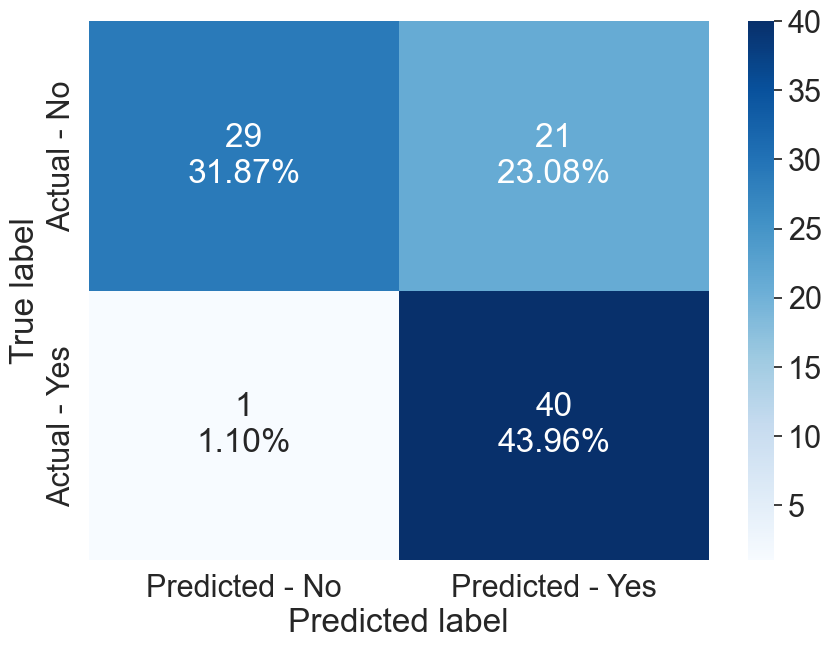

In [1421]:
get_metrics_score(xgb_tuned)

make_confusion_matrix(xgb_tuned,y_test)

#### Feature Importance <a class="anchor" id="tuned_xgbc_fi"></a>

                 Relative Importance
Chest_Pain                      0.23
Thallium_Test                   0.19
Major_Vessels                   0.11
Exercise_Angina                 0.11
Gender                          0.10
Max_Heart_Rate                  0.06
Cholesterol                     0.05
ST_Slope                        0.05
ST_Depression                   0.05
Age                             0.05
Resting_BP                      0.01
Resting_ECG                     0.01
Fasting_Sugar                   0.00


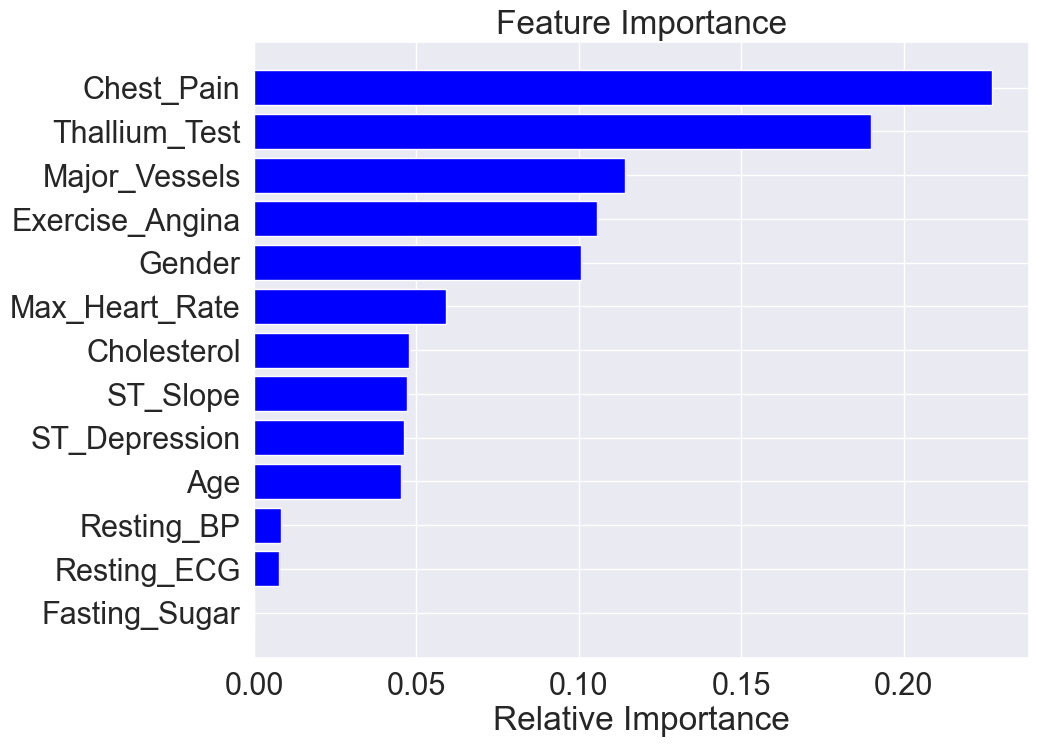

In [1272]:
show_feature_importances(xgb_tuned.feature_importances_, X_train)

#### ROC Curve <a class="anchor" id="tuned_xgbc_roc"></a>

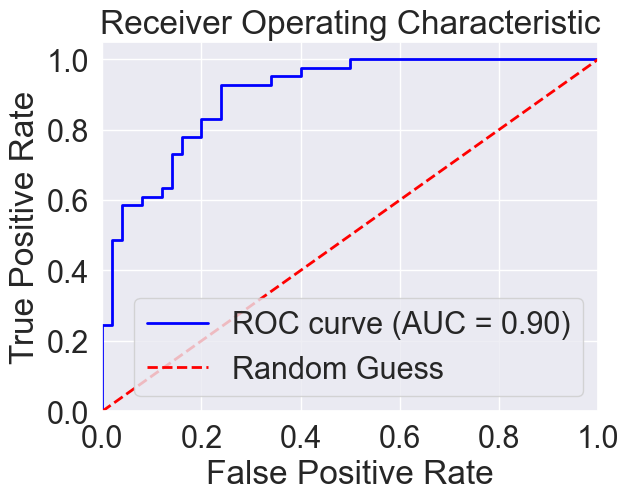

In [1362]:
show_roc_curve(xgb_tuned, X_test, y_test)

### Boosting Model Comparisons <a class="anchor" id="boosting_compare"></a>

In [1408]:
# defining list of models
models = [adaboost, adaboost_tuned, gradient_boost, gb_tuned, xgb, xgb_tuned]
model_names = ['AdaBoost','AdaBoost Tuned','Gradient Boost','Gradient Boost Tuned','XGBoost','XGBoost Tuned']

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_train.append(np.round(j[6],2))
    f1_test.append(np.round(j[7],2))

In [1409]:
comparison_frame = pd.DataFrame({'Model':model_names, 
                                  'Train_Accuracy': acc_train,
                                  'Test_Accuracy': acc_test,
                                  'Train_Recall': recall_train,
                                  'Test_Recall': recall_test,
                                  'Train_Precision': precision_train,
                                  'Test_Precision': precision_test,
                                  'Train_F1': f1_train,
                                  'Test_F1': f1_test}) 

comparison_frame.sort_values(by='Test_Recall',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
5         XGBoost Tuned            0.77           0.76          0.96   
3  Gradient Boost Tuned            0.99           0.81          0.98   
2        Gradient Boost            1.00           0.78          1.00   
4               XGBoost            1.00           0.80          1.00   
1        AdaBoost Tuned            0.99           0.76          0.99   
0              AdaBoost            0.98           0.79          0.98   

   Test_Recall  Train_Precision  Test_Precision  Train_F1  Test_F1  
5         0.98             0.68            0.66      0.79     0.78  
3         0.80             1.00            0.79      0.99     0.80  
2         0.78             1.00            0.74      1.00     0.76  
4         0.78             1.00            0.78      1.00     0.78  
1         0.76             0.98            0.72      0.98     0.74  
0         0.73             0.97            0.79      0.97     0.76

<AxesSubplot: >

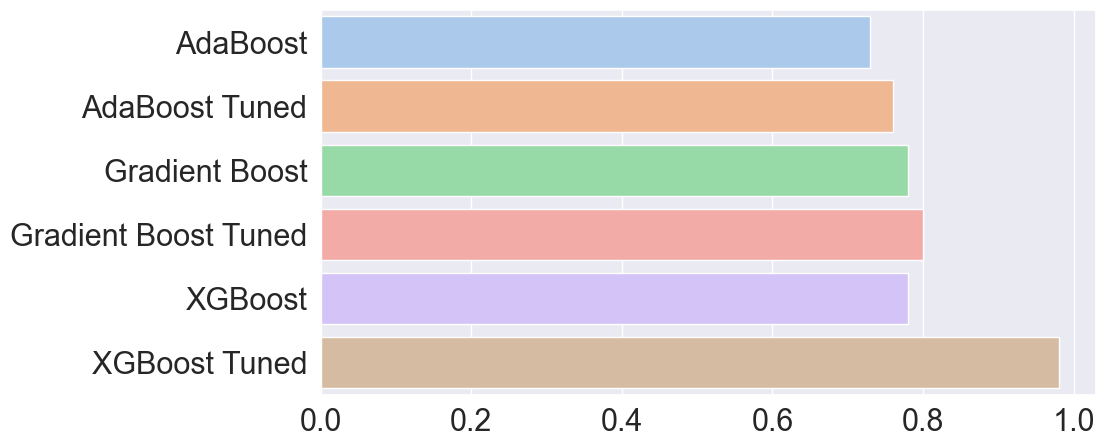

In [1368]:
plt.figure(figsize = (10,5))
sns.barplot(x = recall_test, y = model_names, palette='pastel')

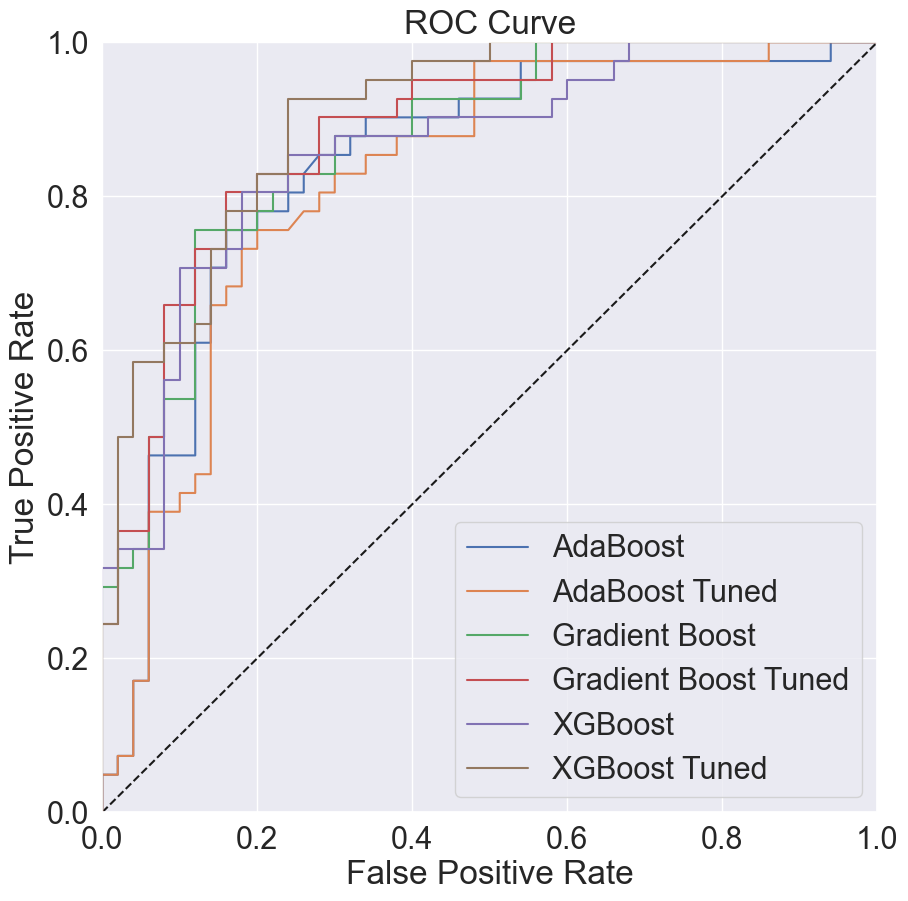

In [1369]:
# plot with all ROC curves
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
for model in models:
    plot_roc_curve(model, X_test, y_test, models.index(model))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    
plt.show()

## Conclusion <a class="anchor" id="conclusion"></a>

In [1410]:
# defining list of models
models = [rf_tuned,bagging_tuned,gb_tuned, xgb_tuned]
model_names = ['Tuned Random Forest','Tuned Bagging Classifier','Gradient Boost Tuned','XGBoost Tuned']

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_train.append(np.round(j[6],2))
    f1_test.append(np.round(j[7],2))

In [1411]:
comparison_frame = pd.DataFrame({'Model':model_names, 
                                  'Train_Accuracy': acc_train,
                                  'Test_Accuracy': acc_test,
                                  'Train_Recall': recall_train,
                                  'Test_Recall': recall_test,
                                  'Train_Precision': precision_train,
                                  'Test_Precision': precision_test,
                                  'Train_F1': f1_train,
                                  'Test_F1': f1_test}) 

comparison_frame.sort_values(by='Test_Recall',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
3             XGBoost Tuned            0.77           0.76          0.96   
0       Tuned Random Forest            0.77           0.73          0.91   
1  Tuned Bagging Classifier            0.98           0.81          0.96   
2      Gradient Boost Tuned            0.99           0.81          0.98   

   Test_Recall  Train_Precision  Test_Precision  Train_F1  Test_F1  
3         0.98             0.68            0.66      0.79     0.78  
0         0.93             0.69            0.63      0.79     0.75  
1         0.80             0.99            0.79      0.97     0.80  
2         0.80             1.00            0.79      0.99     0.80

Among the tested models, *Tuned Random Forest*, *Tuned Bagging Classifier*, *Gradient Boost Tuned*, and *XGBoost Tuned* exhibited the best performance. *XGBoost Tuned* achieved the highest Recall score, which is crucial to ensure that no patients with a high risk of heart attack are overlooked. However, it displayed a low precision score, indicating a high number of false positives.

Alternatively, *Gradient Boost Tuned* stands out with its balanced precision and recall scores, making it the model with the highest F1 score, approximately 0.8 for all metrics. Nevertheless, a false negative rate of 20% is still deemed unacceptably high for a medical application.